# Benchmarking Field Transformations

### DONE - FT-HMC implemented for 8x8 2D QED (using SiLU as activation function).

- [x] Try to minimize size of the force in training. No significant improvements.
- [x]  Some test on ergodicity
- [x] (calculate the probablity of generating the configs obtained via conventional HMC).

### TODO

- [ ] Plot the force size distribution 
- [ ] Is the large force from the original action or Field-Transformation the determinant?
- [ ] If from the determinant, then the fermion force won't cause problem for HMC
- [ ] Use the same Field-Transformation for larger system (say 16x16, 32x32, 64x64, etc)
- [ ] Study how the delta H depends on the system size ( perhaps delta H ~ sqrt(volume) )
- [ ] Study the auto-correlation for observables, topo, plaq, flowed plaq, etc.
- [ ] Improving the Field-Transformation to reduce force.

## Setup, `import`'s, ..., etc

In [1]:
import os
import sys
import torch

from functools import reduce
from IPython.core.interactiveshell import InteractiveShell

%load_ext autoreload
%autoreload 2

%config InlineBackend.figure_format = 'retina'

InteractiveShell.ast_node_interactivity = "all"


project_dir = os.path.abspath('../../')
if project_dir not in sys.path:
    sys.path.append(project_dir)

In [2]:
from fthmc.utils.param import Param
import fthmc.utils.io as io
logger = io.Logger()

torch.manual_seed(9)

#torch.set_num_threads(param.nth)
#torch.set_num_interop_threads(param.nth_interop)
#os.environ["OMP_NUM_THREADS"] = str(param.nth)
#os.environ["KMP_BLOCKTIME"] = "0"
#os.environ["KMP_SETTINGS"] = "1"
#os.environ["KMP_AFFINITY"]= "granularity=fine,verbose,compact,1,0"

if torch.cuda.is_available():
    torch.set_default_tensor_type(torch.FloatTensor)
else: 
    torch.set_default_tensor_type(torch.DoubleTensor)

## Specify `Param` object

In [3]:
param = {
    'L': 12,
    'tau': 0.5,
    'nrun': 5,
    'beta': 3.0,
    'nstep': 15,
    'ntraj': 256,
    'nprint': 10,
    'seed': 1331,
    'randinit': True,
}

param = Param(**param)
logger.log(repr(param))

[04:40:54]  Param:                                                                                                                                                                                                                                              
            ----------------                                                                                                                                                                                                                                    
            beta=3.0                                                                                                                                                                                                                                            
            L=12                                                                                                                                                                                                                                                
            tau=0.5                                                                                                                                                                                                                                             
            nstep=15                                                                                                                                                                                                                                            
            ntraj=256                                                                                                                                                                                                                                           
            nrun=5                                                                                                                                                                                                                                              
            nprint=10                                                                                                                                                                                                                                           
            seed=1331                                                                                                                                                                                                                                           
            randinit=True                                                                                                                                                                                                                                       
            nth=2                                                                                                                                                                                                                                               
            nth_interop=2                                                                                                                                                                                                                                       
            lat=[12, 12]                                                                                                                                                                                                                                        
            nd=2                                                                                                                                                                                                                                                
            shape=[2, 12, 12]                                                                                                                    

## Specify directories for saving model, etc

In [4]:
import datetime

from fthmc.train import run as hmc_run
from fthmc.config import LOGS_DIR

DAYSTR = io.get_timestamp('%Y-%m-%d')
NOW = io.get_timestamp('%Y-%m-%d-%H%M%S')

PARAM_DIR = os.path.join(LOGS_DIR, param.uniquestr())
METRICS_DIR = os.path.join(PARAM_DIR, 'metrics')
MODEL_DIR = os.path.join(PARAM_DIR, 'models')
#OUTDIR = os.path.join(METRICS_DIR)

io.check_else_make_dir(PARAM_DIR)
io.check_else_make_dir(MODEL_DIR)
io.check_else_make_dir(METRICS_DIR)

Duplicate key in file PosixPath('/home/foremans/.config/matplotlib/stylelib/dark_jupyter.mplstyle'), line 92 ('figure.facecolor: 474747')
Duplicate key in file PosixPath('/home/foremans/.config/matplotlib/stylelib/dark_jupyter.mplstyle'), line 93 ('figure.edgecolor: 0.50')
In /home/foremans/.config/matplotlib/stylelib/dark_jupyter.mplstyle: 
The savefig.jpeg_quality rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.


TORCH DEVICE: cuda


In [5]:
fields, metrics = hmc_run(param, logger=logger)

#hmc_metrics_dir = os.path.join(METRICS_DIR, 'hmc')
#metrics_file = os.path.join(hmc_metrics_dir, f'hmc_metrics_{NOW}.z')
#io.savez(metrics, metrics_file)

[04:41:00]  Param:                                                                                                                                                                                                                                              
            ----------------                                                                                                                                                                                                                                    
            beta=3.0                                                                                                                                                                                                                                            
            L=12                                                                                                                                                                                                                                                
            tau=0.5                                                                                                                                                                                                                                             
            nstep=15                                                                                                                                                                                                                                            
            ntraj=256                                                                                                                                                                                                                                           
            nrun=5                                                                                                                                                                                                                                              
            nprint=10                                                                                                                                                                                                                                           
            seed=1331                                                                                                                                                                                                                                           
            randinit=True                                                                                                                                                                                                                                       
            nth=2                                                                                                                                                                                                                                               
            nth_interop=2                                                                                                                                                                                                                                       
            lat=[12, 12]                                                                                                                                                                                                                                        
            nd=2                                                                                                                                                                                                                                                
            shape=[2, 12, 12]                                                                                                                    

            action=-0.029 plaq=0.000 charge=1.000

            dt=0.008 traj=2 accept=True dH=0.146 expdH=0.864 dq=9.000

            dt=0.008 traj=27 accept=True dH=0.029 expdH=0.971 dq=0.000

            dt=0.008 traj=52 accept=True dH=-0.001 expdH=1.001 dq=0.000

            dt=0.008 traj=77 accept=True dH=0.056 expdH=0.946 dq=0.000

            dt=0.008 traj=102 accept=True dH=-0.033 expdH=1.034 dq=0.000

[04:41:01]  dt=0.008 traj=127 accept=True dH=-0.035 expdH=1.036 dq=0.000

            dt=0.008 traj=152 accept=True dH=-0.000 expdH=1.000 dq=0.000

            dt=0.008 traj=177 accept=True dH=-0.005 expdH=1.005 dq=0.000

            dt=0.008 traj=202 accept=True dH=0.010 expdH=0.990 dq=0.000

[04:41:02]  dt=0.008 traj=227 accept=True dH=0.030 expdH=0.970 dq=0.000

            dt=0.008 traj=252 accept=True dH=0.011 expdH=0.989 dq=0.000

            dt=0.008 traj=258 accept=True dH=-0.012 expdH=1.012 dq=0.000

            dt=0.009 traj=283 accept=True dH=0.007 expdH=0.994 dq=0.000

            dt=0.009 traj=308 accept=True dH=0.057 expdH=0.945 dq=0.000

[04:41:03]  dt=0.009 traj=333 accept=True dH=0.010 expdH=0.990 dq=1.000

            dt=0.009 traj=358 accept=True dH=-0.041 expdH=1.042 dq=0.000

            dt=0.009 traj=383 accept=True dH=0.028 expdH=0.972 dq=0.000

            dt=0.008 traj=408 accept=True dH=0.020 expdH=0.981 dq=0.000

            dt=0.008 traj=433 accept=True dH=-0.049 expdH=1.050 dq=0.000

[04:41:04]  dt=0.008 traj=458 accept=True dH=-0.006 expdH=1.006 dq=0.000

            dt=0.008 traj=483 accept=True dH=0.004 expdH=0.996 dq=1.000

            dt=0.008 traj=508 accept=True dH=-0.016 expdH=1.016 dq=1.000

            dt=0.008 traj=514 accept=True dH=-0.012 expdH=1.012 dq=0.000

            dt=0.008 traj=539 accept=True dH=0.036 expdH=0.964 dq=0.000

            dt=0.008 traj=564 accept=True dH=-0.097 expdH=1.102 dq=0.000

[04:41:05]  dt=0.008 traj=589 accept=True dH=-0.060 expdH=1.062 dq=0.000

            dt=0.008 traj=614 accept=True dH=0.031 expdH=0.969 dq=0.000

            dt=0.008 traj=639 accept=True dH=-0.009 expdH=1.009 dq=0.000

            dt=0.008 traj=664 accept=True dH=0.025 expdH=0.975 dq=0.000

            dt=0.008 traj=689 accept=True dH=-0.028 expdH=1.028 dq=1.000

[04:41:06]  dt=0.008 traj=714 accept=True dH=-0.003 expdH=1.003 dq=0.000

            dt=0.008 traj=739 accept=True dH=-0.070 expdH=1.073 dq=0.000

            dt=0.008 traj=764 accept=True dH=-0.010 expdH=1.010 dq=0.000

            dt=0.008 traj=770 accept=True dH=-0.041 expdH=1.042 dq=0.000

            dt=0.008 traj=795 accept=True dH=-0.012 expdH=1.012 dq=0.000

[04:41:07]  dt=0.008 traj=820 accept=True dH=-0.050 expdH=1.051 dq=1.000

            dt=0.008 traj=845 accept=True dH=0.028 expdH=0.973 dq=0.000

            dt=0.008 traj=870 accept=True dH=0.041 expdH=0.960 dq=0.000

            dt=0.008 traj=895 accept=True dH=-0.004 expdH=1.004 dq=0.000

            dt=0.008 traj=920 accept=True dH=0.048 expdH=0.953 dq=0.000

[04:41:08]  dt=0.008 traj=945 accept=True dH=0.040 expdH=0.961 dq=1.000

            dt=0.008 traj=970 accept=True dH=0.003 expdH=0.997 dq=0.000

            dt=0.008 traj=995 accept=True dH=0.044 expdH=0.957 dq=0.000

            dt=0.008 traj=1020 accept=True dH=-0.029 expdH=1.030 dq=0.000

            dt=0.008 traj=1026 accept=True dH=-0.038 expdH=1.038 dq=0.000

            dt=0.008 traj=1051 accept=True dH=-0.017 expdH=1.017 dq=0.000

[04:41:09]  dt=0.008 traj=1076 accept=True dH=-0.006 expdH=1.006 dq=1.000

            dt=0.008 traj=1101 accept=True dH=0.007 expdH=0.993 dq=0.000

            dt=0.008 traj=1126 accept=True dH=-0.043 expdH=1.044 dq=0.000

            dt=0.008 traj=1151 accept=True dH=0.039 expdH=0.962 dq=0.000

            dt=0.008 traj=1176 accept=True dH=0.003 expdH=0.997 dq=0.000

[04:41:10]  dt=0.008 traj=1201 accept=True dH=0.020 expdH=0.980 dq=0.000

            dt=0.008 traj=1226 accept=True dH=0.025 expdH=0.975 dq=0.000

            dt=0.008 traj=1251 accept=True dH=0.035 expdH=0.966 dq=1.000

            dt=0.008 traj=1276 accept=True dH=-0.018 expdH=1.018 dq=0.000

            Run times: [0.00842, 2.190079, 0.007792, 2.300071, 0.00783, 2.073182, 0.007767, 2.081769, 0.007771, 2.074293]

            Per trajectory: [3.3e-05, 0.008555, 3e-05, 0.008985, 3.1e-05, 0.008098, 3e-05, 0.008132, 3e-05, 0.008103]

## Specify `TrainConfig` object for training our model

Note, we train the `pre_flow_model` using the Kullback-Leibler divergence:

$$
D_{\mathrm{KL}} = \left(P\|Q\right) = \sum_{x\in\mathcal{X}} P(x)\log\left(\frac{P(x)}{Q(x)}\right)
$$

In [6]:
import fthmc.utils.qed_helpers as qed
from fthmc.config import TrainConfig, PI
from fthmc.utils.distributions import MultivariateUniform
from fthmc.utils.layers import make_u1_equiv_layers, set_weights

train_config = TrainConfig(**{
    'n_era': 100,
    'n_epoch': 100,
    'n_layers': 32,
    'n_s_nets': 2,
    'hidden_sizes': [8, 8],
    'kernel_size': 3,
    'batch_size': 1024,
    'print_freq': 10,
    'plot_freq': 50,
})

link_shape = (2, *param.lat)
lattice_shape = tuple(param.lat)
u1_action = qed.BatchAction(param.beta)

np_unif = np.random.uniform(0, 2 * PI, size=link_shape)
np_unif = torch.from_numpy(np.array(np_unif, dtype=np.float32))
if torch.cuda.is_available():
    np_unif = np_unif.cuda()
    
prior = MultivariateUniform(torch.zeros(link_shape), np_unif)
                            #TWO_PI * torch.ones(link_shape))
    
layers = make_u1_equiv_layers(lattice_shape=lattice_shape,
                              n_layers=train_config.n_layers,
                              n_mixture_comps=train_config.n_s_nets,
                              hidden_sizes=train_config.hidden_sizes,
                              kernel_size=train_config.kernel_size)

set_weights(layers)

model_init = {
    'prior': prior,
    'layers': layers,
}

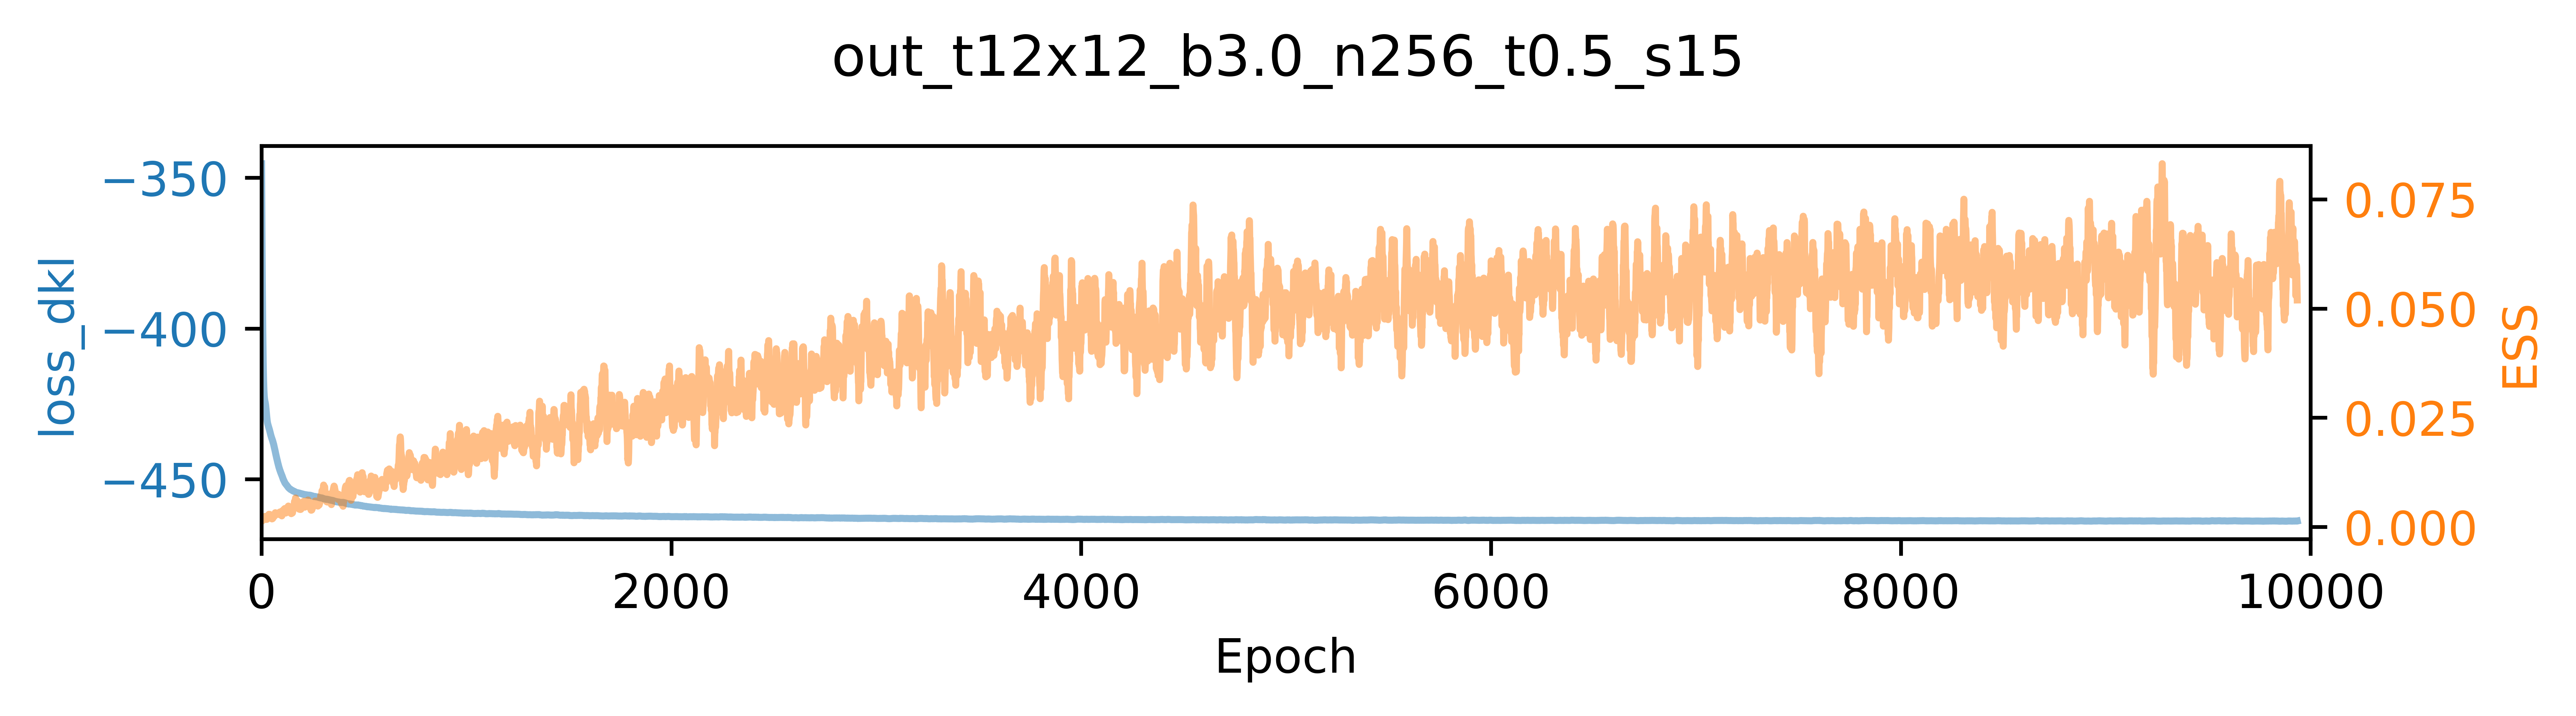

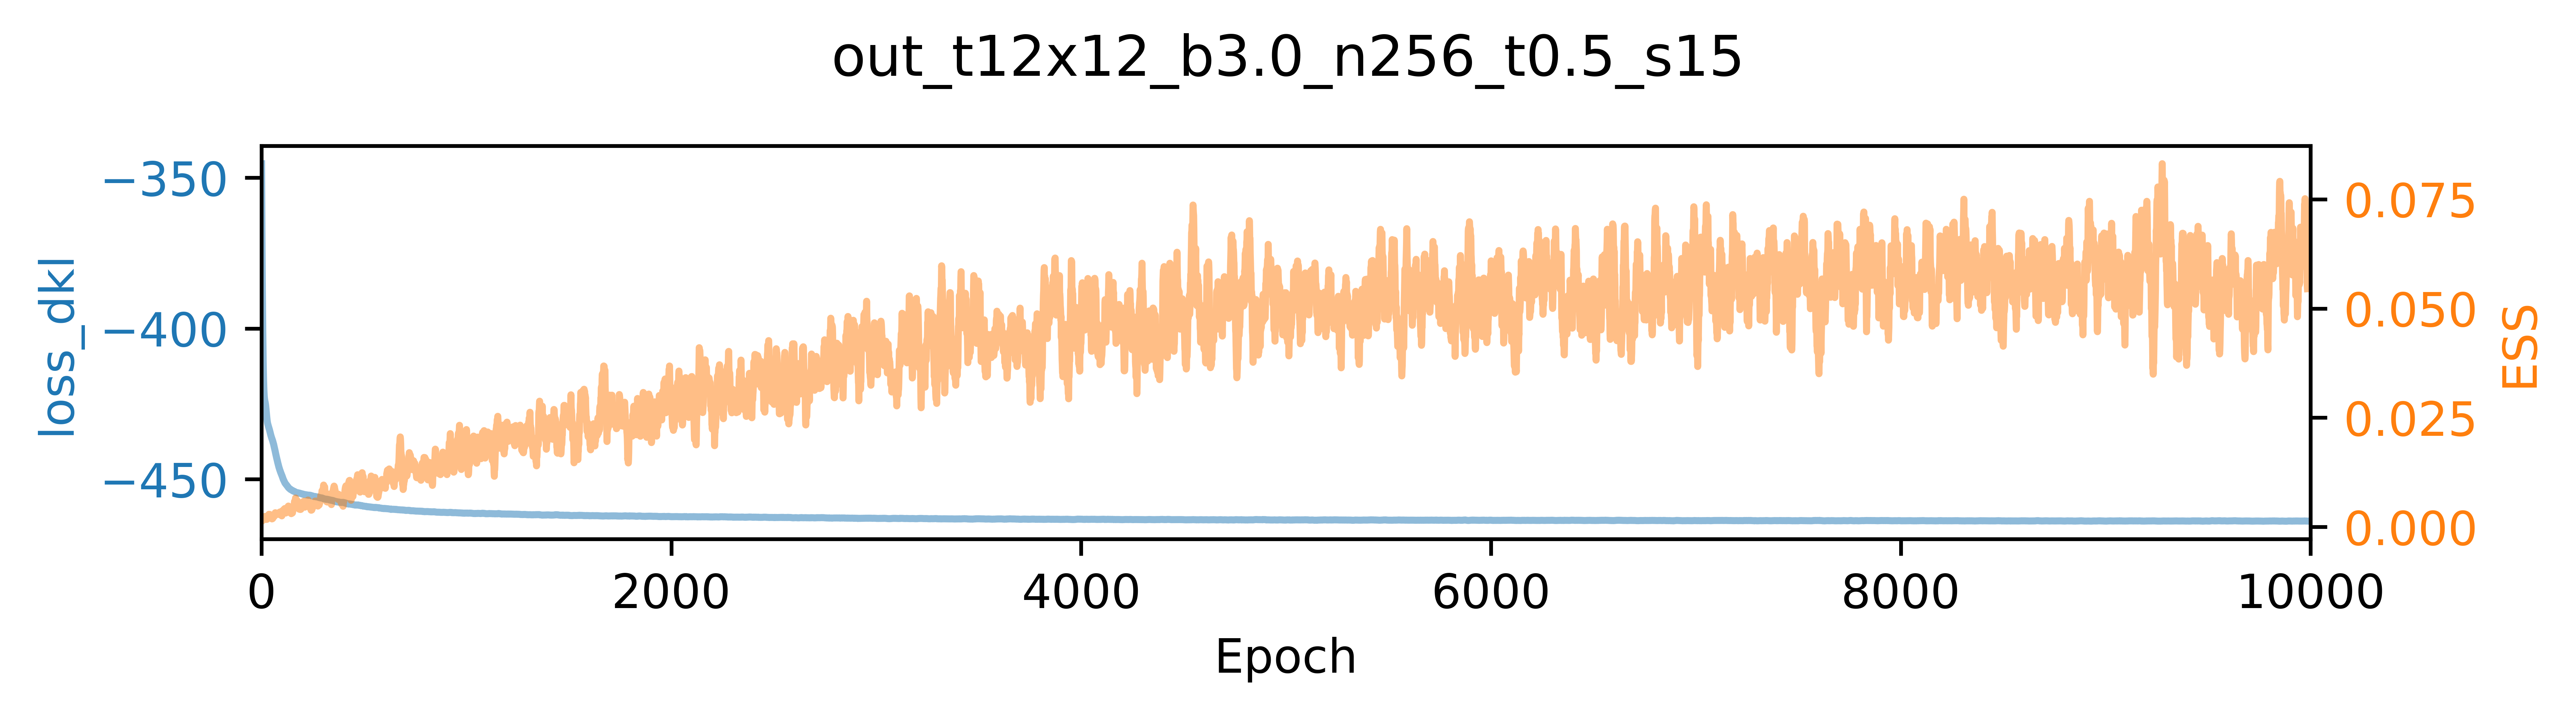

[04:42:18]  -------------------------------------------------------------------                                                                                                                                                                                 
            ERA=0, last took: 0 min 0 s                                                                                                                                                                                                                         
            -------------------------------------------------------------------

[04:42:32]  epoch=7.000 dt=0.226 loss=-352.800 dq=5.037 ess=0.002 loss_dkl=-352.800 logp=133.111 logq=-219.689

[04:42:34]  epoch=17.000 dt=0.227 loss=-424.720 dq=6.847 ess=0.002 loss_dkl=-424.720 logp=284.363 logq=-140.357

[04:42:36]  epoch=27.000 dt=0.228 loss=-424.913 dq=7.980 ess=0.002 loss_dkl=-424.913 logp=314.431 logq=-110.482

[04:42:38]  epoch=37.000 dt=0.228 loss=-431.713 dq=7.606 ess=0.002 loss_dkl=-431.713 logp=282.437 logq=-149.275

[04:42:41]  epoch=47.000 dt=0.228 loss=-434.092 dq=7.117 ess=0.003 loss_dkl=-434.092 logp=286.757 logq=-147.335

[04:42:45]  epoch=57.000 dt=0.228 loss=-436.536 dq=6.738 ess=0.002 loss_dkl=-436.536 logp=303.963 logq=-132.573

[04:42:47]  epoch=67.000 dt=0.228 loss=-438.487 dq=6.813 ess=0.002 loss_dkl=-438.487 logp=301.541 logq=-136.946

[04:42:49]  epoch=77.000 dt=0.228 loss=-441.863 dq=6.609 ess=0.003 loss_dkl=-441.863 logp=303.772 logq=-138.091

[04:42:52]  epoch=87.000 dt=0.228 loss=-444.858 dq=6.770 ess=0.002 loss_dkl=-444.858 logp=312.060 logq=-132.798

[04:42:54]  epoch=97.000 dt=0.228 loss=-447.200 dq=6.366 ess=0.004 loss_dkl=-447.200 logp=318.138 logq=-129.062

[04:42:56]  -------------------------------------------------------------------                                                                                                                                                                                 
            ERA=1, last took: 0 min 37.84 s                                                                                                                                                                                                                     
            -------------------------------------------------------------------

[04:42:58]  epoch=7.000 dt=0.228 loss=-448.988 dq=6.318 ess=0.001 loss_dkl=-448.988 logp=321.548 logq=-127.441

[04:43:00]  epoch=17.000 dt=0.228 loss=-450.873 dq=6.464 ess=0.004 loss_dkl=-450.873 logp=322.798 logq=-128.075

[04:43:03]  epoch=27.000 dt=0.228 loss=-451.854 dq=6.582 ess=0.004 loss_dkl=-451.854 logp=327.228 logq=-124.626

[04:43:05]  epoch=37.000 dt=0.228 loss=-452.717 dq=6.487 ess=0.006 loss_dkl=-452.717 logp=327.486 logq=-125.231

[04:43:07]  epoch=47.000 dt=0.228 loss=-453.329 dq=6.398 ess=0.002 loss_dkl=-453.329 logp=329.473 logq=-123.856

[04:43:11]  epoch=57.000 dt=0.228 loss=-453.792 dq=6.370 ess=0.003 loss_dkl=-453.792 logp=329.182 logq=-124.609

[04:43:14]  epoch=67.000 dt=0.228 loss=-454.190 dq=6.215 ess=0.006 loss_dkl=-454.190 logp=329.848 logq=-124.342

[04:43:16]  epoch=77.000 dt=0.228 loss=-454.553 dq=6.481 ess=0.005 loss_dkl=-454.553 logp=331.035 logq=-123.518

[04:43:18]  epoch=87.000 dt=0.228 loss=-454.495 dq=6.833 ess=0.007 loss_dkl=-454.495 logp=330.820 logq=-123.674

[04:43:20]  epoch=97.000 dt=0.228 loss=-454.769 dq=6.819 ess=0.004 loss_dkl=-454.769 logp=330.851 logq=-123.918

[04:43:22]  -------------------------------------------------------------------                                                                                                                                                                                 
            ERA=2, last took: 0 min 26.5 s                                                                                                                                                                                                                      
            -------------------------------------------------------------------

[04:43:24]  epoch=7.000 dt=0.228 loss=-454.945 dq=6.679 ess=0.005 loss_dkl=-454.945 logp=331.643 logq=-123.301

[04:43:27]  epoch=17.000 dt=0.230 loss=-455.135 dq=6.982 ess=0.006 loss_dkl=-455.135 logp=331.791 logq=-123.344

[04:43:29]  epoch=27.000 dt=0.228 loss=-455.216 dq=6.894 ess=0.006 loss_dkl=-455.216 logp=331.681 logq=-123.535

[04:43:31]  epoch=37.000 dt=0.228 loss=-455.288 dq=7.014 ess=0.005 loss_dkl=-455.288 logp=331.779 logq=-123.509

[04:43:34]  epoch=47.000 dt=0.228 loss=-455.321 dq=7.146 ess=0.003 loss_dkl=-455.321 logp=331.599 logq=-123.722

[04:43:38]  epoch=57.000 dt=0.228 loss=-455.687 dq=7.053 ess=0.005 loss_dkl=-455.687 logp=332.519 logq=-123.168

[04:43:40]  epoch=67.000 dt=0.228 loss=-455.812 dq=7.238 ess=0.004 loss_dkl=-455.812 logp=332.837 logq=-122.975

[04:43:42]  epoch=77.000 dt=0.228 loss=-455.896 dq=7.440 ess=0.005 loss_dkl=-455.896 logp=332.837 logq=-123.059

[04:43:45]  epoch=87.000 dt=0.228 loss=-455.956 dq=7.090 ess=0.005 loss_dkl=-455.956 logp=333.024 logq=-122.932

[04:43:47]  epoch=97.000 dt=0.228 loss=-456.194 dq=7.254 ess=0.006 loss_dkl=-456.194 logp=332.960 logq=-123.235

[04:43:49]  -------------------------------------------------------------------                                                                                                                                                                                 
            ERA=3, last took: 0 min 26.55 s                                                                                                                                                                                                                     
            -------------------------------------------------------------------

[04:43:51]  epoch=7.000 dt=0.233 loss=-456.398 dq=7.408 ess=0.009 loss_dkl=-456.398 logp=333.658 logq=-122.740

[04:43:53]  epoch=17.000 dt=0.228 loss=-456.590 dq=7.600 ess=0.009 loss_dkl=-456.590 logp=333.601 logq=-122.989

[04:43:56]  epoch=27.000 dt=0.228 loss=-456.681 dq=7.775 ess=0.007 loss_dkl=-456.681 logp=334.033 logq=-122.648

[04:43:58]  epoch=37.000 dt=0.228 loss=-456.789 dq=8.134 ess=0.007 loss_dkl=-456.789 logp=334.322 logq=-122.467

[04:44:00]  epoch=47.000 dt=0.228 loss=-456.963 dq=7.896 ess=0.005 loss_dkl=-456.963 logp=334.069 logq=-122.894

[04:44:04]  epoch=57.000 dt=0.228 loss=-457.186 dq=8.316 ess=0.011 loss_dkl=-457.186 logp=335.295 logq=-121.891

[04:44:07]  epoch=67.000 dt=0.228 loss=-457.438 dq=8.068 ess=0.007 loss_dkl=-457.438 logp=335.128 logq=-122.310

[04:44:09]  epoch=77.000 dt=0.229 loss=-457.608 dq=8.092 ess=0.008 loss_dkl=-457.608 logp=335.848 logq=-121.760

[04:44:11]  epoch=87.000 dt=0.228 loss=-457.667 dq=8.857 ess=0.007 loss_dkl=-457.667 logp=335.966 logq=-121.701

[04:44:14]  epoch=97.000 dt=0.230 loss=-457.725 dq=8.766 ess=0.006 loss_dkl=-457.725 logp=336.037 logq=-121.687

[04:44:15]  -------------------------------------------------------------------                                                                                                                                                                                 
            ERA=4, last took: 0 min 26.65 s                                                                                                                                                                                                                     
            -------------------------------------------------------------------

[04:44:18]  epoch=7.000 dt=0.229 loss=-457.792 dq=8.700 ess=0.005 loss_dkl=-457.792 logp=335.692 logq=-122.100

[04:44:20]  epoch=17.000 dt=0.229 loss=-457.968 dq=8.463 ess=0.010 loss_dkl=-457.968 logp=336.270 logq=-121.697

[04:44:22]  epoch=27.000 dt=0.230 loss=-458.259 dq=8.137 ess=0.005 loss_dkl=-458.259 logp=336.997 logq=-121.263

[04:44:25]  epoch=37.000 dt=0.229 loss=-458.165 dq=8.967 ess=0.012 loss_dkl=-458.165 logp=336.544 logq=-121.621

[04:44:27]  epoch=47.000 dt=0.228 loss=-458.343 dq=9.079 ess=0.004 loss_dkl=-458.343 logp=336.821 logq=-121.522

[04:44:31]  epoch=57.000 dt=0.228 loss=-458.570 dq=8.627 ess=0.007 loss_dkl=-458.570 logp=337.101 logq=-121.468

[04:44:33]  epoch=67.000 dt=0.228 loss=-458.617 dq=8.759 ess=0.010 loss_dkl=-458.617 logp=337.311 logq=-121.307

[04:44:36]  epoch=77.000 dt=0.230 loss=-458.584 dq=8.970 ess=0.011 loss_dkl=-458.584 logp=337.113 logq=-121.471

[04:44:38]  epoch=87.000 dt=0.228 loss=-458.733 dq=9.062 ess=0.004 loss_dkl=-458.733 logp=337.651 logq=-121.081

[04:44:40]  epoch=97.000 dt=0.228 loss=-458.825 dq=9.540 ess=0.014 loss_dkl=-458.825 logp=337.405 logq=-121.420

[04:44:42]  -------------------------------------------------------------------                                                                                                                                                                                 
            ERA=5, last took: 0 min 26.75 s                                                                                                                                                                                                                     
            -------------------------------------------------------------------

[04:44:44]  epoch=7.000 dt=0.228 loss=-459.052 dq=9.546 ess=0.007 loss_dkl=-459.052 logp=337.763 logq=-121.289

[04:44:47]  epoch=17.000 dt=0.228 loss=-458.991 dq=9.848 ess=0.011 loss_dkl=-458.991 logp=338.584 logq=-120.407

[04:44:49]  epoch=27.000 dt=0.229 loss=-459.181 dq=9.368 ess=0.007 loss_dkl=-459.181 logp=338.016 logq=-121.165

[04:44:51]  epoch=37.000 dt=0.229 loss=-459.286 dq=9.345 ess=0.008 loss_dkl=-459.286 logp=338.623 logq=-120.663

[04:44:54]  epoch=47.000 dt=0.228 loss=-459.328 dq=9.276 ess=0.011 loss_dkl=-459.328 logp=338.435 logq=-120.893

[04:44:58]  epoch=57.000 dt=0.228 loss=-459.403 dq=9.253 ess=0.011 loss_dkl=-459.403 logp=338.422 logq=-120.981

[04:45:00]  epoch=67.000 dt=0.228 loss=-459.387 dq=9.697 ess=0.009 loss_dkl=-459.387 logp=338.395 logq=-120.992

[04:45:02]  epoch=77.000 dt=0.229 loss=-459.515 dq=9.363 ess=0.008 loss_dkl=-459.515 logp=337.763 logq=-121.752

[04:45:05]  epoch=87.000 dt=0.228 loss=-459.567 dq=9.340 ess=0.010 loss_dkl=-459.567 logp=338.411 logq=-121.156

[04:45:07]  epoch=97.000 dt=0.229 loss=-459.696 dq=9.494 ess=0.007 loss_dkl=-459.696 logp=338.799 logq=-120.897

[04:45:09]  -------------------------------------------------------------------                                                                                                                                                                                 
            ERA=6, last took: 0 min 26.59 s                                                                                                                                                                                                                     
            -------------------------------------------------------------------

[04:45:11]  epoch=7.000 dt=0.229 loss=-459.706 dq=10.047 ess=0.008 loss_dkl=-459.706 logp=339.068 logq=-120.638

[04:45:13]  epoch=17.000 dt=0.229 loss=-459.816 dq=9.275 ess=0.013 loss_dkl=-459.816 logp=339.646 logq=-120.170

[04:45:16]  epoch=27.000 dt=0.228 loss=-459.837 dq=9.980 ess=0.018 loss_dkl=-459.837 logp=339.435 logq=-120.402

[04:45:18]  epoch=37.000 dt=0.228 loss=-459.923 dq=9.667 ess=0.014 loss_dkl=-459.923 logp=340.003 logq=-119.920

[04:45:20]  epoch=47.000 dt=0.229 loss=-459.981 dq=9.605 ess=0.010 loss_dkl=-459.981 logp=339.458 logq=-120.522

[04:45:24]  epoch=57.000 dt=0.229 loss=-460.000 dq=9.367 ess=0.009 loss_dkl=-460.000 logp=339.138 logq=-120.862

[04:45:27]  epoch=67.000 dt=0.229 loss=-460.096 dq=9.649 ess=0.010 loss_dkl=-460.096 logp=339.222 logq=-120.874

[04:45:29]  epoch=77.000 dt=0.229 loss=-460.211 dq=9.860 ess=0.020 loss_dkl=-460.211 logp=339.411 logq=-120.800

[04:45:31]  epoch=87.000 dt=0.229 loss=-460.180 dq=9.623 ess=0.023 loss_dkl=-460.180 logp=339.932 logq=-120.247

[04:45:34]  epoch=97.000 dt=0.231 loss=-460.204 dq=9.982 ess=0.007 loss_dkl=-460.204 logp=339.892 logq=-120.312

[04:45:35]  -------------------------------------------------------------------                                                                                                                                                                                 
            ERA=7, last took: 0 min 26.64 s                                                                                                                                                                                                                     
            -------------------------------------------------------------------

[04:45:38]  epoch=7.000 dt=0.229 loss=-460.363 dq=10.237 ess=0.016 loss_dkl=-460.363 logp=340.586 logq=-119.776

[04:45:40]  epoch=17.000 dt=0.230 loss=-460.435 dq=10.137 ess=0.007 loss_dkl=-460.435 logp=340.551 logq=-119.884

[04:45:42]  epoch=27.000 dt=0.231 loss=-460.313 dq=9.704 ess=0.019 loss_dkl=-460.313 logp=340.554 logq=-119.758

[04:45:45]  epoch=37.000 dt=0.229 loss=-460.502 dq=9.832 ess=0.014 loss_dkl=-460.502 logp=340.192 logq=-120.309

[04:45:47]  epoch=47.000 dt=0.229 loss=-460.481 dq=9.907 ess=0.013 loss_dkl=-460.481 logp=340.792 logq=-119.689

[04:45:51]  epoch=57.000 dt=0.229 loss=-460.634 dq=10.101 ess=0.012 loss_dkl=-460.634 logp=340.788 logq=-119.846

[04:45:53]  epoch=67.000 dt=0.229 loss=-460.640 dq=10.208 ess=0.014 loss_dkl=-460.640 logp=341.407 logq=-119.232

[04:45:56]  epoch=77.000 dt=0.227 loss=-460.636 dq=10.663 ess=0.015 loss_dkl=-460.636 logp=340.762 logq=-119.874

[04:45:58]  epoch=87.000 dt=0.227 loss=-460.682 dq=10.379 ess=0.013 loss_dkl=-460.682 logp=341.141 logq=-119.540

[04:46:00]  epoch=97.000 dt=0.227 loss=-460.734 dq=10.441 ess=0.014 loss_dkl=-460.734 logp=341.184 logq=-119.550

[04:46:02]  -------------------------------------------------------------------                                                                                                                                                                                 
            ERA=8, last took: 0 min 26.69 s                                                                                                                                                                                                                     
            -------------------------------------------------------------------

[04:46:04]  epoch=7.000 dt=0.228 loss=-460.770 dq=10.096 ess=0.021 loss_dkl=-460.770 logp=340.804 logq=-119.965

[04:46:07]  epoch=17.000 dt=0.228 loss=-460.793 dq=10.367 ess=0.007 loss_dkl=-460.793 logp=341.158 logq=-119.634

[04:46:09]  epoch=27.000 dt=0.227 loss=-460.844 dq=10.753 ess=0.014 loss_dkl=-460.844 logp=341.418 logq=-119.426

[04:46:11]  epoch=37.000 dt=0.227 loss=-460.882 dq=10.035 ess=0.014 loss_dkl=-460.882 logp=341.114 logq=-119.768

[04:46:14]  epoch=47.000 dt=0.227 loss=-460.768 dq=10.226 ess=0.009 loss_dkl=-460.768 logp=341.078 logq=-119.690

[04:46:18]  epoch=57.000 dt=0.227 loss=-460.912 dq=10.084 ess=0.015 loss_dkl=-460.912 logp=342.218 logq=-118.694

[04:46:20]  epoch=67.000 dt=0.227 loss=-460.941 dq=10.568 ess=0.013 loss_dkl=-460.941 logp=341.645 logq=-119.296

[04:46:22]  epoch=77.000 dt=0.227 loss=-460.981 dq=10.481 ess=0.013 loss_dkl=-460.981 logp=341.737 logq=-119.244

[04:46:24]  epoch=87.000 dt=0.227 loss=-461.067 dq=10.670 ess=0.017 loss_dkl=-461.067 logp=342.017 logq=-119.050

[04:46:27]  epoch=97.000 dt=0.227 loss=-460.965 dq=10.524 ess=0.015 loss_dkl=-460.965 logp=341.694 logq=-119.271

[04:46:28]  -------------------------------------------------------------------                                                                                                                                                                                 
            ERA=9, last took: 0 min 26.46 s                                                                                                                                                                                                                     
            -------------------------------------------------------------------

[04:46:31]  epoch=7.000 dt=0.227 loss=-461.045 dq=10.517 ess=0.013 loss_dkl=-461.045 logp=341.827 logq=-119.218

[04:46:33]  epoch=17.000 dt=0.227 loss=-461.132 dq=10.340 ess=0.009 loss_dkl=-461.132 logp=341.641 logq=-119.490

[04:46:35]  epoch=27.000 dt=0.227 loss=-461.000 dq=10.921 ess=0.023 loss_dkl=-461.000 logp=341.519 logq=-119.481

[04:46:38]  epoch=37.000 dt=0.227 loss=-461.130 dq=10.471 ess=0.017 loss_dkl=-461.130 logp=341.861 logq=-119.269

[04:46:40]  epoch=47.000 dt=0.227 loss=-461.104 dq=10.664 ess=0.017 loss_dkl=-461.104 logp=341.823 logq=-119.281

[04:46:44]  epoch=57.000 dt=0.227 loss=-461.114 dq=10.899 ess=0.022 loss_dkl=-461.114 logp=341.919 logq=-119.195

[04:46:46]  epoch=67.000 dt=0.227 loss=-461.232 dq=10.657 ess=0.021 loss_dkl=-461.232 logp=341.772 logq=-119.460

[04:46:49]  epoch=77.000 dt=0.227 loss=-461.241 dq=10.727 ess=0.018 loss_dkl=-461.241 logp=342.060 logq=-119.182

[04:46:51]  epoch=87.000 dt=0.227 loss=-461.239 dq=10.976 ess=0.011 loss_dkl=-461.239 logp=341.992 logq=-119.248

[04:46:53]  epoch=97.000 dt=0.227 loss=-461.309 dq=10.514 ess=0.009 loss_dkl=-461.309 logp=341.374 logq=-119.936

[04:46:55]  -------------------------------------------------------------------                                                                                                                                                                                 
            ERA=10, last took: 0 min 26.59 s                                                                                                                                                                                                                    
            -------------------------------------------------------------------

[04:46:57]  epoch=7.000 dt=0.229 loss=-461.211 dq=11.291 ess=0.033 loss_dkl=-461.211 logp=342.344 logq=-118.867

[04:47:00]  epoch=17.000 dt=0.232 loss=-461.314 dq=10.802 ess=0.008 loss_dkl=-461.314 logp=342.489 logq=-118.826

[04:47:02]  epoch=27.000 dt=0.227 loss=-461.232 dq=10.981 ess=0.022 loss_dkl=-461.232 logp=341.671 logq=-119.561

[04:47:04]  epoch=37.000 dt=0.227 loss=-461.409 dq=10.668 ess=0.019 loss_dkl=-461.409 logp=342.640 logq=-118.769

[04:47:07]  epoch=47.000 dt=0.228 loss=-461.443 dq=10.899 ess=0.023 loss_dkl=-461.443 logp=342.340 logq=-119.103

[04:47:11]  epoch=57.000 dt=0.227 loss=-461.432 dq=11.163 ess=0.026 loss_dkl=-461.432 logp=342.324 logq=-119.108

[04:47:13]  epoch=67.000 dt=0.232 loss=-461.302 dq=10.811 ess=0.028 loss_dkl=-461.302 logp=342.672 logq=-118.630

[04:47:15]  epoch=77.000 dt=0.229 loss=-461.441 dq=11.295 ess=0.017 loss_dkl=-461.441 logp=342.741 logq=-118.700

[04:47:18]  epoch=87.000 dt=0.227 loss=-461.311 dq=11.456 ess=0.024 loss_dkl=-461.311 logp=342.297 logq=-119.014

[04:47:20]  epoch=97.000 dt=0.228 loss=-461.431 dq=11.116 ess=0.014 loss_dkl=-461.431 logp=342.558 logq=-118.873

[04:47:22]  -------------------------------------------------------------------                                                                                                                                                                                 
            ERA=11, last took: 0 min 26.63 s                                                                                                                                                                                                                    
            -------------------------------------------------------------------

[04:47:24]  epoch=7.000 dt=0.227 loss=-461.560 dq=11.490 ess=0.021 loss_dkl=-461.560 logp=342.394 logq=-119.166

[04:47:26]  epoch=17.000 dt=0.227 loss=-461.399 dq=10.878 ess=0.022 loss_dkl=-461.399 logp=343.060 logq=-118.339

[04:47:29]  epoch=27.000 dt=0.227 loss=-461.484 dq=11.035 ess=0.016 loss_dkl=-461.484 logp=343.469 logq=-118.015

[04:47:31]  epoch=37.000 dt=0.227 loss=-461.471 dq=11.073 ess=0.012 loss_dkl=-461.471 logp=343.201 logq=-118.271

[04:47:33]  epoch=47.000 dt=0.227 loss=-461.516 dq=11.170 ess=0.014 loss_dkl=-461.516 logp=342.776 logq=-118.740

[04:47:37]  epoch=57.000 dt=0.232 loss=-461.512 dq=11.310 ess=0.030 loss_dkl=-461.512 logp=343.307 logq=-118.205

[04:47:40]  epoch=67.000 dt=0.227 loss=-461.308 dq=11.431 ess=0.019 loss_dkl=-461.308 logp=342.500 logq=-118.808

[04:47:42]  epoch=77.000 dt=0.227 loss=-461.586 dq=10.935 ess=0.023 loss_dkl=-461.586 logp=342.582 logq=-119.005

[04:47:44]  epoch=87.000 dt=0.229 loss=-461.589 dq=10.953 ess=0.023 loss_dkl=-461.589 logp=343.373 logq=-118.216

[04:47:47]  epoch=97.000 dt=0.228 loss=-461.630 dq=11.436 ess=0.017 loss_dkl=-461.630 logp=343.168 logq=-118.462

[04:47:48]  -------------------------------------------------------------------                                                                                                                                                                                 
            ERA=12, last took: 0 min 26.52 s                                                                                                                                                                                                                    
            -------------------------------------------------------------------

[04:47:51]  epoch=7.000 dt=0.229 loss=-461.576 dq=11.456 ess=0.020 loss_dkl=-461.576 logp=343.124 logq=-118.451

[04:47:53]  epoch=17.000 dt=0.230 loss=-461.589 dq=11.211 ess=0.025 loss_dkl=-461.589 logp=343.155 logq=-118.434

[04:47:55]  epoch=27.000 dt=0.228 loss=-461.592 dq=11.177 ess=0.017 loss_dkl=-461.592 logp=343.064 logq=-118.528

[04:47:57]  epoch=37.000 dt=0.227 loss=-461.651 dq=10.929 ess=0.013 loss_dkl=-461.651 logp=342.410 logq=-119.241

[04:48:00]  epoch=47.000 dt=0.227 loss=-461.621 dq=11.205 ess=0.020 loss_dkl=-461.621 logp=342.581 logq=-119.040

[04:48:04]  epoch=57.000 dt=0.227 loss=-461.635 dq=11.067 ess=0.021 loss_dkl=-461.635 logp=343.336 logq=-118.299

[04:48:06]  epoch=67.000 dt=0.227 loss=-461.687 dq=11.817 ess=0.030 loss_dkl=-461.687 logp=343.883 logq=-117.803

[04:48:08]  epoch=77.000 dt=0.227 loss=-461.721 dq=11.518 ess=0.018 loss_dkl=-461.721 logp=343.218 logq=-118.503

[04:48:11]  epoch=87.000 dt=0.228 loss=-461.721 dq=11.899 ess=0.020 loss_dkl=-461.721 logp=343.408 logq=-118.314

[04:48:13]  epoch=97.000 dt=0.228 loss=-461.728 dq=11.639 ess=0.025 loss_dkl=-461.728 logp=343.416 logq=-118.311

[04:48:15]  -------------------------------------------------------------------                                                                                                                                                                                 
            ERA=13, last took: 0 min 26.52 s                                                                                                                                                                                                                    
            -------------------------------------------------------------------

[04:48:17]  epoch=7.000 dt=0.228 loss=-461.850 dq=10.866 ess=0.017 loss_dkl=-461.850 logp=343.733 logq=-118.117

[04:48:19]  epoch=17.000 dt=0.227 loss=-461.783 dq=11.348 ess=0.027 loss_dkl=-461.783 logp=343.011 logq=-118.772

[04:48:22]  epoch=27.000 dt=0.227 loss=-461.843 dq=11.411 ess=0.014 loss_dkl=-461.843 logp=343.757 logq=-118.086

[04:48:24]  epoch=37.000 dt=0.228 loss=-461.798 dq=11.443 ess=0.020 loss_dkl=-461.798 logp=343.522 logq=-118.276

[04:48:26]  epoch=47.000 dt=0.227 loss=-461.850 dq=11.504 ess=0.016 loss_dkl=-461.850 logp=344.155 logq=-117.695

[04:48:30]  epoch=57.000 dt=0.228 loss=-461.800 dq=11.483 ess=0.027 loss_dkl=-461.800 logp=343.627 logq=-118.174

[04:48:33]  epoch=67.000 dt=0.228 loss=-461.820 dq=11.930 ess=0.030 loss_dkl=-461.820 logp=343.969 logq=-117.851

[04:48:35]  epoch=77.000 dt=0.228 loss=-461.930 dq=11.588 ess=0.015 loss_dkl=-461.930 logp=344.099 logq=-117.831

[04:48:37]  epoch=87.000 dt=0.229 loss=-461.901 dq=11.784 ess=0.024 loss_dkl=-461.901 logp=344.250 logq=-117.651

[04:48:40]  epoch=97.000 dt=0.228 loss=-461.934 dq=11.541 ess=0.023 loss_dkl=-461.934 logp=343.526 logq=-118.408

[04:48:41]  -------------------------------------------------------------------                                                                                                                                                                                 
            ERA=14, last took: 0 min 26.5 s                                                                                                                                                                                                                     
            -------------------------------------------------------------------

[04:48:44]  epoch=7.000 dt=0.227 loss=-461.803 dq=11.463 ess=0.020 loss_dkl=-461.803 logp=343.962 logq=-117.842

[04:48:46]  epoch=17.000 dt=0.233 loss=-461.914 dq=11.426 ess=0.024 loss_dkl=-461.914 logp=343.802 logq=-118.112

[04:48:48]  epoch=27.000 dt=0.228 loss=-461.948 dq=11.185 ess=0.024 loss_dkl=-461.948 logp=343.594 logq=-118.353

[04:48:51]  epoch=37.000 dt=0.228 loss=-461.875 dq=11.364 ess=0.026 loss_dkl=-461.875 logp=343.429 logq=-118.447

[04:48:53]  epoch=47.000 dt=0.228 loss=-461.732 dq=11.446 ess=0.015 loss_dkl=-461.732 logp=342.606 logq=-119.127

[04:48:57]  epoch=57.000 dt=0.228 loss=-461.865 dq=11.175 ess=0.018 loss_dkl=-461.865 logp=342.955 logq=-118.910

[04:48:59]  epoch=67.000 dt=0.229 loss=-461.958 dq=11.457 ess=0.019 loss_dkl=-461.958 logp=344.309 logq=-117.649

[04:49:02]  epoch=77.000 dt=0.229 loss=-461.918 dq=11.677 ess=0.019 loss_dkl=-461.918 logp=344.049 logq=-117.869

[04:49:04]  epoch=87.000 dt=0.228 loss=-461.925 dq=11.541 ess=0.022 loss_dkl=-461.925 logp=343.809 logq=-118.116

[04:49:06]  epoch=97.000 dt=0.228 loss=-461.934 dq=11.726 ess=0.026 loss_dkl=-461.934 logp=343.874 logq=-118.061

[04:49:08]  -------------------------------------------------------------------                                                                                                                                                                                 
            ERA=15, last took: 0 min 26.69 s                                                                                                                                                                                                                    
            -------------------------------------------------------------------

[04:49:10]  epoch=7.000 dt=0.228 loss=-461.973 dq=11.694 ess=0.019 loss_dkl=-461.973 logp=344.480 logq=-117.493

[04:49:13]  epoch=17.000 dt=0.232 loss=-462.108 dq=11.577 ess=0.023 loss_dkl=-462.108 logp=344.046 logq=-118.061

[04:49:15]  epoch=27.000 dt=0.230 loss=-462.082 dq=11.512 ess=0.014 loss_dkl=-462.082 logp=344.028 logq=-118.054

[04:49:17]  epoch=37.000 dt=0.228 loss=-462.018 dq=11.332 ess=0.018 loss_dkl=-462.018 logp=343.972 logq=-118.046

[04:49:20]  epoch=47.000 dt=0.228 loss=-462.059 dq=11.681 ess=0.014 loss_dkl=-462.059 logp=344.242 logq=-117.817

[04:49:24]  epoch=57.000 dt=0.228 loss=-461.998 dq=11.534 ess=0.018 loss_dkl=-461.998 logp=344.466 logq=-117.532

[04:49:26]  epoch=67.000 dt=0.229 loss=-462.003 dq=11.760 ess=0.032 loss_dkl=-462.003 logp=344.682 logq=-117.321

[04:49:28]  epoch=77.000 dt=0.230 loss=-462.075 dq=12.022 ess=0.026 loss_dkl=-462.075 logp=343.443 logq=-118.631

[04:49:31]  epoch=87.000 dt=0.228 loss=-462.115 dq=11.220 ess=0.027 loss_dkl=-462.115 logp=344.075 logq=-118.040

[04:49:33]  epoch=97.000 dt=0.228 loss=-462.042 dq=12.016 ess=0.028 loss_dkl=-462.042 logp=344.946 logq=-117.096

[04:49:35]  -------------------------------------------------------------------                                                                                                                                                                                 
            ERA=16, last took: 0 min 26.84 s                                                                                                                                                                                                                    
            -------------------------------------------------------------------

[04:49:37]  epoch=7.000 dt=0.228 loss=-462.119 dq=11.401 ess=0.015 loss_dkl=-462.119 logp=344.188 logq=-117.930

[04:49:39]  epoch=17.000 dt=0.229 loss=-462.059 dq=12.169 ess=0.013 loss_dkl=-462.058 logp=344.569 logq=-117.489

[04:49:42]  epoch=27.000 dt=0.228 loss=-462.122 dq=11.552 ess=0.029 loss_dkl=-462.122 logp=344.794 logq=-117.327

[04:49:44]  epoch=37.000 dt=0.228 loss=-462.136 dq=10.971 ess=0.019 loss_dkl=-462.136 logp=344.350 logq=-117.785

[04:49:46]  epoch=47.000 dt=0.228 loss=-462.117 dq=11.049 ess=0.026 loss_dkl=-462.117 logp=344.082 logq=-118.035

[04:49:50]  epoch=57.000 dt=0.228 loss=-462.197 dq=11.868 ess=0.022 loss_dkl=-462.197 logp=344.619 logq=-117.577

[04:49:53]  epoch=67.000 dt=0.229 loss=-462.186 dq=11.309 ess=0.023 loss_dkl=-462.186 logp=344.386 logq=-117.800

[04:49:55]  epoch=77.000 dt=0.228 loss=-462.270 dq=11.415 ess=0.037 loss_dkl=-462.270 logp=343.966 logq=-118.304

[04:49:57]  epoch=87.000 dt=0.228 loss=-462.161 dq=11.480 ess=0.028 loss_dkl=-462.161 logp=344.079 logq=-118.082

[04:50:00]  epoch=97.000 dt=0.228 loss=-462.238 dq=11.202 ess=0.019 loss_dkl=-462.238 logp=344.831 logq=-117.407

[04:50:02]  -------------------------------------------------------------------                                                                                                                                                                                 
            ERA=17, last took: 0 min 26.76 s                                                                                                                                                                                                                    
            -------------------------------------------------------------------

[04:50:04]  epoch=7.000 dt=0.233 loss=-462.197 dq=11.885 ess=0.023 loss_dkl=-462.197 logp=344.451 logq=-117.745

[04:50:06]  epoch=17.000 dt=0.231 loss=-462.211 dq=11.935 ess=0.019 loss_dkl=-462.211 logp=344.753 logq=-117.458

[04:50:09]  epoch=27.000 dt=0.228 loss=-462.196 dq=11.401 ess=0.020 loss_dkl=-462.196 logp=343.539 logq=-118.657

[04:50:11]  epoch=37.000 dt=0.231 loss=-462.222 dq=11.833 ess=0.035 loss_dkl=-462.222 logp=344.260 logq=-117.962

[04:50:13]  epoch=47.000 dt=0.231 loss=-462.266 dq=11.567 ess=0.024 loss_dkl=-462.266 logp=343.839 logq=-118.427

[04:50:18]  epoch=57.000 dt=0.228 loss=-462.275 dq=11.427 ess=0.031 loss_dkl=-462.275 logp=344.895 logq=-117.380

[04:50:20]  epoch=67.000 dt=0.229 loss=-462.293 dq=11.666 ess=0.028 loss_dkl=-462.293 logp=344.253 logq=-118.040

[04:50:22]  epoch=77.000 dt=0.230 loss=-462.140 dq=11.532 ess=0.018 loss_dkl=-462.140 logp=344.075 logq=-118.065

[04:50:25]  epoch=87.000 dt=0.229 loss=-462.208 dq=11.476 ess=0.032 loss_dkl=-462.208 logp=344.539 logq=-117.669

[04:50:27]  epoch=97.000 dt=0.228 loss=-462.207 dq=11.296 ess=0.019 loss_dkl=-462.207 logp=344.543 logq=-117.664

[04:50:29]  -------------------------------------------------------------------                                                                                                                                                                                 
            ERA=18, last took: 0 min 27.08 s                                                                                                                                                                                                                    
            -------------------------------------------------------------------

[04:50:31]  epoch=7.000 dt=0.229 loss=-462.217 dq=12.016 ess=0.036 loss_dkl=-462.217 logp=344.434 logq=-117.783

[04:50:33]  epoch=17.000 dt=0.229 loss=-462.242 dq=11.482 ess=0.008 loss_dkl=-462.242 logp=344.382 logq=-117.860

[04:50:36]  epoch=27.000 dt=0.230 loss=-462.256 dq=11.847 ess=0.032 loss_dkl=-462.256 logp=344.447 logq=-117.809

[04:50:38]  epoch=37.000 dt=0.228 loss=-462.343 dq=11.314 ess=0.031 loss_dkl=-462.343 logp=343.997 logq=-118.345

[04:50:40]  epoch=47.000 dt=0.228 loss=-462.220 dq=11.427 ess=0.037 loss_dkl=-462.220 logp=343.477 logq=-118.743

[04:50:44]  epoch=57.000 dt=0.228 loss=-462.280 dq=11.266 ess=0.019 loss_dkl=-462.280 logp=344.009 logq=-118.271

[04:50:47]  epoch=67.000 dt=0.228 loss=-462.325 dq=11.496 ess=0.030 loss_dkl=-462.325 logp=344.271 logq=-118.054

[04:50:49]  epoch=77.000 dt=0.230 loss=-462.319 dq=12.079 ess=0.038 loss_dkl=-462.319 logp=344.854 logq=-117.465

[04:50:51]  epoch=87.000 dt=0.231 loss=-462.308 dq=12.010 ess=0.022 loss_dkl=-462.308 logp=345.031 logq=-117.277

[04:50:54]  epoch=97.000 dt=0.229 loss=-462.317 dq=11.341 ess=0.044 loss_dkl=-462.317 logp=344.183 logq=-118.134

[04:50:56]  -------------------------------------------------------------------                                                                                                                                                                                 
            ERA=19, last took: 0 min 26.87 s                                                                                                                                                                                                                    
            -------------------------------------------------------------------

[04:50:58]  epoch=7.000 dt=0.229 loss=-462.307 dq=11.925 ess=0.020 loss_dkl=-462.307 logp=344.129 logq=-118.179

[04:51:00]  epoch=17.000 dt=0.230 loss=-462.322 dq=11.556 ess=0.024 loss_dkl=-462.322 logp=343.911 logq=-118.410

[04:51:03]  epoch=27.000 dt=0.231 loss=-462.325 dq=11.875 ess=0.031 loss_dkl=-462.325 logp=344.597 logq=-117.729

[04:51:05]  epoch=37.000 dt=0.229 loss=-462.362 dq=11.742 ess=0.011 loss_dkl=-462.362 logp=344.518 logq=-117.844

[04:51:07]  epoch=47.000 dt=0.228 loss=-462.447 dq=11.315 ess=0.025 loss_dkl=-462.447 logp=345.492 logq=-116.955

[04:51:11]  epoch=57.000 dt=0.228 loss=-462.410 dq=11.389 ess=0.029 loss_dkl=-462.410 logp=344.769 logq=-117.641

[04:51:14]  epoch=67.000 dt=0.228 loss=-462.328 dq=11.614 ess=0.027 loss_dkl=-462.328 logp=344.499 logq=-117.830

[04:51:16]  epoch=77.000 dt=0.228 loss=-462.374 dq=11.334 ess=0.024 loss_dkl=-462.374 logp=344.712 logq=-117.662

[04:51:18]  epoch=87.000 dt=0.228 loss=-462.377 dq=11.704 ess=0.021 loss_dkl=-462.377 logp=344.685 logq=-117.692

[04:51:21]  epoch=97.000 dt=0.229 loss=-462.362 dq=11.208 ess=0.026 loss_dkl=-462.362 logp=345.434 logq=-116.928

[04:51:22]  -------------------------------------------------------------------                                                                                                                                                                                 
            ERA=20, last took: 0 min 26.84 s                                                                                                                                                                                                                    
            -------------------------------------------------------------------

[04:51:25]  epoch=7.000 dt=0.229 loss=-462.460 dq=11.988 ess=0.026 loss_dkl=-462.460 logp=344.809 logq=-117.651

[04:51:27]  epoch=17.000 dt=0.228 loss=-462.437 dq=11.786 ess=0.019 loss_dkl=-462.437 logp=344.800 logq=-117.637

[04:51:29]  epoch=27.000 dt=0.229 loss=-462.423 dq=11.645 ess=0.032 loss_dkl=-462.424 logp=344.430 logq=-117.993

[04:51:32]  epoch=37.000 dt=0.229 loss=-462.443 dq=11.635 ess=0.032 loss_dkl=-462.443 logp=344.416 logq=-118.026

[04:51:34]  epoch=47.000 dt=0.229 loss=-462.478 dq=11.580 ess=0.023 loss_dkl=-462.478 logp=345.279 logq=-117.199

[04:51:38]  epoch=57.000 dt=0.228 loss=-462.506 dq=11.299 ess=0.025 loss_dkl=-462.506 logp=345.508 logq=-116.998

[04:51:40]  epoch=67.000 dt=0.228 loss=-462.431 dq=11.355 ess=0.020 loss_dkl=-462.431 logp=344.804 logq=-117.627

[04:51:43]  epoch=77.000 dt=0.229 loss=-462.431 dq=11.430 ess=0.029 loss_dkl=-462.431 logp=344.808 logq=-117.623

[04:51:45]  epoch=87.000 dt=0.228 loss=-462.531 dq=11.924 ess=0.019 loss_dkl=-462.531 logp=344.877 logq=-117.654

[04:51:47]  epoch=97.000 dt=0.228 loss=-462.451 dq=11.003 ess=0.023 loss_dkl=-462.451 logp=345.811 logq=-116.639

[04:51:49]  -------------------------------------------------------------------                                                                                                                                                                                 
            ERA=21, last took: 0 min 26.84 s                                                                                                                                                                                                                    
            -------------------------------------------------------------------

[04:51:52]  epoch=7.000 dt=0.228 loss=-462.470 dq=11.497 ess=0.028 loss_dkl=-462.470 logp=345.249 logq=-117.221

[04:51:54]  epoch=17.000 dt=0.228 loss=-462.468 dq=11.828 ess=0.030 loss_dkl=-462.468 logp=345.020 logq=-117.448

[04:51:56]  epoch=27.000 dt=0.229 loss=-462.475 dq=11.555 ess=0.025 loss_dkl=-462.475 logp=344.194 logq=-118.281

[04:51:59]  epoch=37.000 dt=0.229 loss=-462.506 dq=11.469 ess=0.033 loss_dkl=-462.506 logp=344.957 logq=-117.549

[04:52:01]  epoch=47.000 dt=0.228 loss=-462.499 dq=11.733 ess=0.051 loss_dkl=-462.499 logp=345.389 logq=-117.111

[04:52:05]  epoch=57.000 dt=0.228 loss=-462.475 dq=11.702 ess=0.018 loss_dkl=-462.475 logp=345.191 logq=-117.285

[04:52:07]  epoch=67.000 dt=0.228 loss=-462.506 dq=11.965 ess=0.037 loss_dkl=-462.506 logp=345.292 logq=-117.214

[04:52:10]  epoch=77.000 dt=0.229 loss=-462.428 dq=12.340 ess=0.042 loss_dkl=-462.428 logp=345.080 logq=-117.347

[04:52:12]  epoch=87.000 dt=0.230 loss=-462.520 dq=11.988 ess=0.025 loss_dkl=-462.520 logp=344.834 logq=-117.687

[04:52:14]  epoch=97.000 dt=0.228 loss=-462.511 dq=11.620 ess=0.037 loss_dkl=-462.511 logp=344.935 logq=-117.575

[04:52:16]  -------------------------------------------------------------------                                                                                                                                                                                 
            ERA=22, last took: 0 min 26.85 s                                                                                                                                                                                                                    
            -------------------------------------------------------------------

[04:52:18]  epoch=7.000 dt=0.229 loss=-462.578 dq=11.995 ess=0.025 loss_dkl=-462.578 logp=345.359 logq=-117.220

[04:52:21]  epoch=17.000 dt=0.228 loss=-462.517 dq=12.135 ess=0.026 loss_dkl=-462.517 logp=345.115 logq=-117.402

[04:52:23]  epoch=27.000 dt=0.228 loss=-462.473 dq=11.765 ess=0.030 loss_dkl=-462.473 logp=345.639 logq=-116.834

[04:52:25]  epoch=37.000 dt=0.229 loss=-462.621 dq=11.994 ess=0.042 loss_dkl=-462.621 logp=344.824 logq=-117.797

[04:52:28]  epoch=47.000 dt=0.230 loss=-462.471 dq=11.815 ess=0.036 loss_dkl=-462.471 logp=345.097 logq=-117.374

[04:52:32]  epoch=57.000 dt=0.229 loss=-462.512 dq=11.769 ess=0.021 loss_dkl=-462.512 logp=345.275 logq=-117.236

[04:52:34]  epoch=67.000 dt=0.229 loss=-462.513 dq=12.071 ess=0.034 loss_dkl=-462.513 logp=345.356 logq=-117.157

[04:52:37]  epoch=77.000 dt=0.229 loss=-462.603 dq=11.533 ess=0.024 loss_dkl=-462.603 logp=345.428 logq=-117.174

[04:52:39]  epoch=87.000 dt=0.229 loss=-462.564 dq=11.609 ess=0.044 loss_dkl=-462.564 logp=345.127 logq=-117.437

[04:52:41]  epoch=97.000 dt=0.229 loss=-462.507 dq=11.584 ess=0.017 loss_dkl=-462.507 logp=344.915 logq=-117.592

[04:52:43]  -------------------------------------------------------------------                                                                                                                                                                                 
            ERA=23, last took: 0 min 26.87 s                                                                                                                                                                                                                    
            -------------------------------------------------------------------

[04:52:45]  epoch=7.000 dt=0.229 loss=-462.620 dq=12.107 ess=0.029 loss_dkl=-462.620 logp=345.657 logq=-116.963

[04:52:48]  epoch=17.000 dt=0.229 loss=-462.639 dq=12.015 ess=0.026 loss_dkl=-462.639 logp=345.266 logq=-117.372

[04:52:50]  epoch=27.000 dt=0.229 loss=-462.613 dq=11.720 ess=0.027 loss_dkl=-462.613 logp=344.743 logq=-117.869

[04:52:52]  epoch=37.000 dt=0.229 loss=-462.635 dq=11.690 ess=0.022 loss_dkl=-462.635 logp=345.950 logq=-116.685

[04:52:55]  epoch=47.000 dt=0.228 loss=-462.606 dq=11.978 ess=0.031 loss_dkl=-462.606 logp=345.339 logq=-117.267

[04:52:59]  epoch=57.000 dt=0.229 loss=-462.621 dq=11.814 ess=0.029 loss_dkl=-462.621 logp=345.215 logq=-117.406

[04:53:01]  epoch=67.000 dt=0.228 loss=-462.683 dq=11.899 ess=0.026 loss_dkl=-462.683 logp=345.282 logq=-117.401

[04:53:03]  epoch=77.000 dt=0.229 loss=-462.594 dq=11.419 ess=0.023 loss_dkl=-462.594 logp=345.206 logq=-117.388

[04:53:06]  epoch=87.000 dt=0.229 loss=-462.619 dq=11.690 ess=0.040 loss_dkl=-462.619 logp=345.098 logq=-117.521

[04:53:08]  epoch=97.000 dt=0.232 loss=-462.563 dq=12.060 ess=0.029 loss_dkl=-462.563 logp=345.629 logq=-116.934

[04:53:10]  -------------------------------------------------------------------                                                                                                                                                                                 
            ERA=24, last took: 0 min 26.95 s                                                                                                                                                                                                                    
            -------------------------------------------------------------------

[04:53:12]  epoch=7.000 dt=0.230 loss=-462.634 dq=11.933 ess=0.030 loss_dkl=-462.634 logp=345.186 logq=-117.448

[04:53:15]  epoch=17.000 dt=0.229 loss=-462.680 dq=11.624 ess=0.038 loss_dkl=-462.680 logp=344.914 logq=-117.766

[04:53:17]  epoch=27.000 dt=0.229 loss=-462.616 dq=11.796 ess=0.033 loss_dkl=-462.616 logp=344.703 logq=-117.913

[04:53:19]  epoch=37.000 dt=0.229 loss=-462.651 dq=11.558 ess=0.041 loss_dkl=-462.651 logp=345.134 logq=-117.517

[04:53:22]  epoch=47.000 dt=0.229 loss=-462.709 dq=11.463 ess=0.038 loss_dkl=-462.709 logp=345.157 logq=-117.552

[04:53:26]  epoch=57.000 dt=0.229 loss=-462.648 dq=12.113 ess=0.030 loss_dkl=-462.648 logp=345.557 logq=-117.091

[04:53:28]  epoch=67.000 dt=0.230 loss=-462.644 dq=12.127 ess=0.024 loss_dkl=-462.644 logp=345.096 logq=-117.548

[04:53:30]  epoch=77.000 dt=0.229 loss=-462.696 dq=11.587 ess=0.047 loss_dkl=-462.696 logp=344.786 logq=-117.910

[04:53:33]  epoch=87.000 dt=0.229 loss=-462.799 dq=11.649 ess=0.042 loss_dkl=-462.799 logp=345.552 logq=-117.247

[04:53:35]  epoch=97.000 dt=0.229 loss=-462.681 dq=11.478 ess=0.035 loss_dkl=-462.682 logp=345.709 logq=-116.973

[04:53:37]  -------------------------------------------------------------------                                                                                                                                                                                 
            ERA=25, last took: 0 min 26.93 s                                                                                                                                                                                                                    
            -------------------------------------------------------------------

[04:53:39]  epoch=7.000 dt=0.229 loss=-462.705 dq=11.925 ess=0.025 loss_dkl=-462.705 logp=345.146 logq=-117.560

[04:53:42]  epoch=17.000 dt=0.232 loss=-462.697 dq=11.409 ess=0.042 loss_dkl=-462.697 logp=345.272 logq=-117.425

[04:53:44]  epoch=27.000 dt=0.232 loss=-462.741 dq=11.972 ess=0.043 loss_dkl=-462.741 logp=345.139 logq=-117.602

[04:53:46]  epoch=37.000 dt=0.230 loss=-462.674 dq=12.236 ess=0.030 loss_dkl=-462.674 logp=345.101 logq=-117.573

[04:53:49]  epoch=47.000 dt=0.229 loss=-462.668 dq=12.002 ess=0.026 loss_dkl=-462.668 logp=345.408 logq=-117.260

[04:53:53]  epoch=57.000 dt=0.230 loss=-462.708 dq=11.970 ess=0.040 loss_dkl=-462.708 logp=345.204 logq=-117.504

[04:53:55]  epoch=67.000 dt=0.229 loss=-462.710 dq=12.105 ess=0.033 loss_dkl=-462.710 logp=345.826 logq=-116.884

[04:53:57]  epoch=77.000 dt=0.229 loss=-462.690 dq=11.470 ess=0.023 loss_dkl=-462.690 logp=344.790 logq=-117.900

[04:54:00]  epoch=87.000 dt=0.229 loss=-462.684 dq=11.691 ess=0.024 loss_dkl=-462.683 logp=345.142 logq=-117.542

[04:54:02]  epoch=97.000 dt=0.235 loss=-462.826 dq=11.921 ess=0.044 loss_dkl=-462.826 logp=345.095 logq=-117.731

[04:54:04]  -------------------------------------------------------------------                                                                                                                                                                                 
            ERA=26, last took: 0 min 27.18 s                                                                                                                                                                                                                    
            -------------------------------------------------------------------

[04:54:06]  epoch=7.000 dt=0.232 loss=-462.814 dq=11.787 ess=0.032 loss_dkl=-462.814 logp=345.114 logq=-117.700

[04:54:09]  epoch=17.000 dt=0.229 loss=-462.761 dq=11.250 ess=0.034 loss_dkl=-462.761 logp=345.159 logq=-117.602

[04:54:11]  epoch=27.000 dt=0.230 loss=-462.877 dq=11.919 ess=0.040 loss_dkl=-462.877 logp=345.481 logq=-117.396

[04:54:13]  epoch=37.000 dt=0.229 loss=-462.754 dq=11.999 ess=0.033 loss_dkl=-462.754 logp=344.969 logq=-117.785

[04:54:16]  epoch=47.000 dt=0.233 loss=-462.817 dq=11.626 ess=0.038 loss_dkl=-462.817 logp=344.703 logq=-118.114

[04:54:20]  epoch=57.000 dt=0.231 loss=-462.804 dq=11.744 ess=0.030 loss_dkl=-462.804 logp=345.477 logq=-117.326

[04:54:22]  epoch=67.000 dt=0.229 loss=-462.831 dq=12.208 ess=0.020 loss_dkl=-462.831 logp=345.560 logq=-117.271

[04:54:25]  epoch=77.000 dt=0.230 loss=-462.823 dq=12.130 ess=0.034 loss_dkl=-462.823 logp=345.090 logq=-117.733

[04:54:27]  epoch=87.000 dt=0.234 loss=-462.831 dq=11.829 ess=0.040 loss_dkl=-462.831 logp=345.615 logq=-117.216

[04:54:29]  epoch=97.000 dt=0.230 loss=-462.777 dq=11.581 ess=0.037 loss_dkl=-462.777 logp=346.461 logq=-116.315

[04:54:31]  -------------------------------------------------------------------                                                                                                                                                                                 
            ERA=27, last took: 0 min 27.3 s                                                                                                                                                                                                                     
            -------------------------------------------------------------------

[04:54:34]  epoch=7.000 dt=0.229 loss=-462.876 dq=12.294 ess=0.039 loss_dkl=-462.876 logp=346.422 logq=-116.454

[04:54:36]  epoch=17.000 dt=0.230 loss=-462.794 dq=12.025 ess=0.032 loss_dkl=-462.794 logp=346.068 logq=-116.726

[04:54:38]  epoch=27.000 dt=0.229 loss=-462.829 dq=11.990 ess=0.038 loss_dkl=-462.829 logp=345.667 logq=-117.162

[04:54:41]  epoch=37.000 dt=0.233 loss=-462.763 dq=12.123 ess=0.035 loss_dkl=-462.763 logp=345.816 logq=-116.947

[04:54:43]  epoch=47.000 dt=0.234 loss=-462.763 dq=12.043 ess=0.038 loss_dkl=-462.762 logp=346.431 logq=-116.331

[04:54:47]  epoch=57.000 dt=0.230 loss=-462.839 dq=11.593 ess=0.046 loss_dkl=-462.839 logp=346.204 logq=-116.635

[04:54:50]  epoch=67.000 dt=0.232 loss=-462.864 dq=12.143 ess=0.022 loss_dkl=-462.864 logp=345.390 logq=-117.475

[04:54:52]  epoch=77.000 dt=0.232 loss=-462.897 dq=11.903 ess=0.057 loss_dkl=-462.897 logp=344.900 logq=-117.997

[04:54:54]  epoch=87.000 dt=0.232 loss=-462.925 dq=12.142 ess=0.051 loss_dkl=-462.925 logp=344.806 logq=-118.119

[04:54:57]  epoch=97.000 dt=0.230 loss=-462.890 dq=11.731 ess=0.027 loss_dkl=-462.890 logp=345.548 logq=-117.343

[04:54:59]  -------------------------------------------------------------------                                                                                                                                                                                 
            ERA=28, last took: 0 min 27.29 s                                                                                                                                                                                                                    
            -------------------------------------------------------------------

[04:55:01]  epoch=7.000 dt=0.230 loss=-462.848 dq=11.786 ess=0.029 loss_dkl=-462.848 logp=345.776 logq=-117.072

[04:55:03]  epoch=17.000 dt=0.230 loss=-462.894 dq=11.816 ess=0.042 loss_dkl=-462.894 logp=345.792 logq=-117.102

[04:55:06]  epoch=27.000 dt=0.230 loss=-462.904 dq=11.987 ess=0.041 loss_dkl=-462.904 logp=346.454 logq=-116.450

[04:55:08]  epoch=37.000 dt=0.232 loss=-462.903 dq=11.703 ess=0.039 loss_dkl=-462.903 logp=345.970 logq=-116.932

[04:55:10]  epoch=47.000 dt=0.230 loss=-462.890 dq=11.803 ess=0.035 loss_dkl=-462.890 logp=345.643 logq=-117.247

[04:55:15]  epoch=57.000 dt=0.230 loss=-462.962 dq=11.993 ess=0.035 loss_dkl=-462.963 logp=346.306 logq=-116.657

[04:55:17]  epoch=67.000 dt=0.230 loss=-462.947 dq=11.457 ess=0.049 loss_dkl=-462.947 logp=346.277 logq=-116.670

[04:55:19]  epoch=77.000 dt=0.230 loss=-462.981 dq=11.576 ess=0.038 loss_dkl=-462.981 logp=345.713 logq=-117.268

[04:55:22]  epoch=87.000 dt=0.230 loss=-462.944 dq=12.200 ess=0.040 loss_dkl=-462.944 logp=346.005 logq=-116.940

[04:55:24]  epoch=97.000 dt=0.230 loss=-462.940 dq=11.941 ess=0.041 loss_dkl=-462.940 logp=345.831 logq=-117.108

[04:55:26]  -------------------------------------------------------------------                                                                                                                                                                                 
            ERA=29, last took: 0 min 27.14 s                                                                                                                                                                                                                    
            -------------------------------------------------------------------

[04:55:28]  epoch=7.000 dt=0.230 loss=-462.948 dq=11.908 ess=0.044 loss_dkl=-462.948 logp=346.045 logq=-116.903

[04:55:30]  epoch=17.000 dt=0.230 loss=-463.021 dq=11.454 ess=0.040 loss_dkl=-463.021 logp=346.038 logq=-116.983

[04:55:33]  epoch=27.000 dt=0.230 loss=-463.018 dq=11.969 ess=0.017 loss_dkl=-463.018 logp=346.039 logq=-116.980

[04:55:35]  epoch=37.000 dt=0.230 loss=-462.997 dq=11.801 ess=0.024 loss_dkl=-462.997 logp=346.024 logq=-116.973

[04:55:37]  epoch=47.000 dt=0.230 loss=-462.977 dq=11.729 ess=0.045 loss_dkl=-462.977 logp=346.641 logq=-116.336

[04:55:42]  epoch=57.000 dt=0.230 loss=-462.935 dq=11.807 ess=0.056 loss_dkl=-462.935 logp=345.990 logq=-116.946

[04:55:44]  epoch=67.000 dt=0.230 loss=-462.959 dq=11.653 ess=0.051 loss_dkl=-462.959 logp=345.958 logq=-117.001

[04:55:46]  epoch=77.000 dt=0.230 loss=-462.922 dq=11.808 ess=0.037 loss_dkl=-462.922 logp=344.928 logq=-117.994

[04:55:49]  epoch=87.000 dt=0.230 loss=-462.985 dq=11.862 ess=0.035 loss_dkl=-462.985 logp=346.415 logq=-116.571

[04:55:51]  epoch=97.000 dt=0.230 loss=-462.969 dq=11.270 ess=0.035 loss_dkl=-462.969 logp=346.476 logq=-116.493

[04:55:53]  -------------------------------------------------------------------                                                                                                                                                                                 
            ERA=30, last took: 0 min 27.13 s                                                                                                                                                                                                                    
            -------------------------------------------------------------------

[04:55:55]  epoch=7.000 dt=0.230 loss=-463.019 dq=11.992 ess=0.029 loss_dkl=-463.019 logp=345.972 logq=-117.047

[04:55:58]  epoch=17.000 dt=0.231 loss=-463.036 dq=11.485 ess=0.037 loss_dkl=-463.036 logp=345.937 logq=-117.100

[04:56:00]  epoch=27.000 dt=0.233 loss=-463.006 dq=11.389 ess=0.039 loss_dkl=-463.006 logp=346.192 logq=-116.814

[04:56:02]  epoch=37.000 dt=0.232 loss=-463.058 dq=12.107 ess=0.051 loss_dkl=-463.058 logp=346.905 logq=-116.153

[04:56:05]  epoch=47.000 dt=0.230 loss=-463.012 dq=11.959 ess=0.046 loss_dkl=-463.012 logp=346.111 logq=-116.901

[04:56:09]  epoch=57.000 dt=0.230 loss=-463.035 dq=12.254 ess=0.032 loss_dkl=-463.035 logp=345.878 logq=-117.156

[04:56:11]  epoch=67.000 dt=0.230 loss=-463.112 dq=11.813 ess=0.037 loss_dkl=-463.112 logp=346.307 logq=-116.805

[04:56:14]  epoch=77.000 dt=0.230 loss=-463.109 dq=12.158 ess=0.034 loss_dkl=-463.109 logp=346.384 logq=-116.725

[04:56:16]  epoch=87.000 dt=0.231 loss=-463.003 dq=11.649 ess=0.032 loss_dkl=-463.003 logp=346.677 logq=-116.326

[04:56:18]  epoch=97.000 dt=0.233 loss=-463.001 dq=11.770 ess=0.035 loss_dkl=-463.001 logp=346.140 logq=-116.861

[04:56:20]  -------------------------------------------------------------------                                                                                                                                                                                 
            ERA=31, last took: 0 min 27.23 s                                                                                                                                                                                                                    
            -------------------------------------------------------------------

[04:56:22]  epoch=7.000 dt=0.230 loss=-463.005 dq=12.025 ess=0.042 loss_dkl=-463.005 logp=345.992 logq=-117.013

[04:56:25]  epoch=17.000 dt=0.231 loss=-463.057 dq=11.468 ess=0.051 loss_dkl=-463.057 logp=346.110 logq=-116.947

[04:56:27]  epoch=27.000 dt=0.232 loss=-462.967 dq=11.445 ess=0.031 loss_dkl=-462.967 logp=345.755 logq=-117.212

[04:56:30]  epoch=37.000 dt=0.230 loss=-463.016 dq=11.908 ess=0.051 loss_dkl=-463.016 logp=345.480 logq=-117.536

[04:56:32]  epoch=47.000 dt=0.230 loss=-463.092 dq=11.692 ess=0.048 loss_dkl=-463.092 logp=345.509 logq=-117.583

[04:56:36]  epoch=57.000 dt=0.232 loss=-463.067 dq=11.650 ess=0.043 loss_dkl=-463.067 logp=345.607 logq=-117.460

[04:56:38]  epoch=67.000 dt=0.230 loss=-463.105 dq=11.717 ess=0.058 loss_dkl=-463.105 logp=346.597 logq=-116.507

[04:56:41]  epoch=77.000 dt=0.230 loss=-463.094 dq=11.345 ess=0.038 loss_dkl=-463.094 logp=346.180 logq=-116.914

[04:56:43]  epoch=87.000 dt=0.230 loss=-463.054 dq=11.654 ess=0.031 loss_dkl=-463.054 logp=346.341 logq=-116.713

[04:56:46]  epoch=97.000 dt=0.232 loss=-463.098 dq=11.896 ess=0.050 loss_dkl=-463.098 logp=345.645 logq=-117.453

[04:56:47]  -------------------------------------------------------------------                                                                                                                                                                                 
            ERA=32, last took: 0 min 27.32 s                                                                                                                                                                                                                    
            -------------------------------------------------------------------

[04:56:50]  epoch=7.000 dt=0.231 loss=-463.034 dq=11.693 ess=0.058 loss_dkl=-463.034 logp=346.128 logq=-116.905

[04:56:52]  epoch=17.000 dt=0.230 loss=-463.069 dq=11.796 ess=0.059 loss_dkl=-463.069 logp=346.597 logq=-116.472

[04:56:55]  epoch=27.000 dt=0.230 loss=-463.046 dq=11.876 ess=0.029 loss_dkl=-463.046 logp=346.415 logq=-116.631

[04:56:57]  epoch=37.000 dt=0.230 loss=-463.064 dq=11.835 ess=0.037 loss_dkl=-463.064 logp=346.155 logq=-116.909

[04:56:59]  epoch=47.000 dt=0.230 loss=-463.083 dq=11.789 ess=0.026 loss_dkl=-463.083 logp=345.646 logq=-117.437

[04:57:03]  epoch=57.000 dt=0.230 loss=-463.056 dq=11.578 ess=0.049 loss_dkl=-463.056 logp=346.340 logq=-116.716

[04:57:06]  epoch=67.000 dt=0.230 loss=-463.198 dq=11.680 ess=0.050 loss_dkl=-463.198 logp=346.277 logq=-116.921

[04:57:08]  epoch=77.000 dt=0.230 loss=-463.053 dq=11.562 ess=0.049 loss_dkl=-463.053 logp=345.471 logq=-117.582

[04:57:10]  epoch=87.000 dt=0.231 loss=-463.175 dq=11.720 ess=0.051 loss_dkl=-463.175 logp=346.275 logq=-116.899

[04:57:13]  epoch=97.000 dt=0.232 loss=-463.105 dq=11.835 ess=0.023 loss_dkl=-463.105 logp=345.953 logq=-117.152

[04:57:15]  -------------------------------------------------------------------                                                                                                                                                                                 
            ERA=33, last took: 0 min 27.29 s                                                                                                                                                                                                                    
            -------------------------------------------------------------------

[04:57:17]  epoch=7.000 dt=0.231 loss=-463.166 dq=11.443 ess=0.023 loss_dkl=-463.166 logp=346.266 logq=-116.899

[04:57:19]  epoch=17.000 dt=0.230 loss=-463.145 dq=11.698 ess=0.047 loss_dkl=-463.145 logp=346.470 logq=-116.675

[04:57:22]  epoch=27.000 dt=0.230 loss=-463.193 dq=11.868 ess=0.055 loss_dkl=-463.193 logp=346.088 logq=-117.105

[04:57:24]  epoch=37.000 dt=0.232 loss=-463.163 dq=11.519 ess=0.034 loss_dkl=-463.163 logp=346.557 logq=-116.607

[04:57:27]  epoch=47.000 dt=0.231 loss=-463.184 dq=11.822 ess=0.034 loss_dkl=-463.184 logp=346.060 logq=-117.124

[04:57:31]  epoch=57.000 dt=0.231 loss=-463.176 dq=11.854 ess=0.026 loss_dkl=-463.176 logp=346.736 logq=-116.439

[04:57:33]  epoch=67.000 dt=0.230 loss=-463.181 dq=11.709 ess=0.056 loss_dkl=-463.181 logp=347.096 logq=-116.084

[04:57:35]  epoch=77.000 dt=0.230 loss=-463.186 dq=11.539 ess=0.033 loss_dkl=-463.186 logp=346.476 logq=-116.710

[04:57:38]  epoch=87.000 dt=0.230 loss=-463.268 dq=11.524 ess=0.033 loss_dkl=-463.268 logp=346.788 logq=-116.479

[04:57:40]  epoch=97.000 dt=0.231 loss=-463.199 dq=12.095 ess=0.026 loss_dkl=-463.199 logp=346.531 logq=-116.668

[04:57:42]  -------------------------------------------------------------------                                                                                                                                                                                 
            ERA=34, last took: 0 min 27.31 s                                                                                                                                                                                                                    
            -------------------------------------------------------------------

[04:57:44]  epoch=7.000 dt=0.230 loss=-463.193 dq=11.828 ess=0.039 loss_dkl=-463.193 logp=346.759 logq=-116.434

[04:57:47]  epoch=17.000 dt=0.230 loss=-463.212 dq=11.628 ess=0.051 loss_dkl=-463.212 logp=347.231 logq=-115.980

[04:57:49]  epoch=27.000 dt=0.237 loss=-463.166 dq=11.821 ess=0.057 loss_dkl=-463.166 logp=346.994 logq=-116.173

[04:57:52]  epoch=37.000 dt=0.232 loss=-463.190 dq=11.572 ess=0.074 loss_dkl=-463.190 logp=346.355 logq=-116.836

[04:57:54]  epoch=47.000 dt=0.233 loss=-463.182 dq=11.833 ess=0.050 loss_dkl=-463.182 logp=345.593 logq=-117.589

[04:57:58]  epoch=57.000 dt=0.230 loss=-463.238 dq=11.702 ess=0.026 loss_dkl=-463.238 logp=345.617 logq=-117.621

[04:58:01]  epoch=67.000 dt=0.231 loss=-463.234 dq=11.485 ess=0.048 loss_dkl=-463.234 logp=345.744 logq=-117.490

[04:58:03]  epoch=77.000 dt=0.231 loss=-463.249 dq=12.173 ess=0.053 loss_dkl=-463.249 logp=346.804 logq=-116.445

[04:58:05]  epoch=87.000 dt=0.231 loss=-463.166 dq=11.444 ess=0.069 loss_dkl=-463.166 logp=347.404 logq=-115.762

[04:58:08]  epoch=97.000 dt=0.232 loss=-463.152 dq=11.772 ess=0.043 loss_dkl=-463.152 logp=346.484 logq=-116.668

[04:58:09]  -------------------------------------------------------------------                                                                                                                                                                                 
            ERA=35, last took: 0 min 27.5 s                                                                                                                                                                                                                     
            -------------------------------------------------------------------

[04:58:12]  epoch=7.000 dt=0.231 loss=-463.133 dq=11.861 ess=0.047 loss_dkl=-463.133 logp=347.331 logq=-115.802

[04:58:14]  epoch=17.000 dt=0.231 loss=-463.157 dq=11.868 ess=0.041 loss_dkl=-463.157 logp=346.670 logq=-116.487

[04:58:17]  epoch=27.000 dt=0.231 loss=-463.167 dq=11.837 ess=0.050 loss_dkl=-463.167 logp=346.585 logq=-116.582

[04:58:19]  epoch=37.000 dt=0.234 loss=-463.251 dq=11.909 ess=0.033 loss_dkl=-463.251 logp=346.288 logq=-116.963

[04:58:21]  epoch=47.000 dt=0.235 loss=-463.234 dq=11.563 ess=0.036 loss_dkl=-463.234 logp=346.597 logq=-116.638

[04:58:26]  epoch=57.000 dt=0.231 loss=-463.211 dq=11.407 ess=0.041 loss_dkl=-463.211 logp=345.805 logq=-117.406

[04:58:28]  epoch=67.000 dt=0.232 loss=-463.260 dq=11.477 ess=0.039 loss_dkl=-463.260 logp=345.623 logq=-117.637

[04:58:30]  epoch=77.000 dt=0.234 loss=-463.299 dq=11.109 ess=0.033 loss_dkl=-463.299 logp=346.665 logq=-116.634

[04:58:33]  epoch=87.000 dt=0.231 loss=-463.245 dq=11.915 ess=0.044 loss_dkl=-463.245 logp=346.091 logq=-117.154

[04:58:35]  epoch=97.000 dt=0.232 loss=-463.170 dq=11.895 ess=0.043 loss_dkl=-463.170 logp=346.142 logq=-117.028

[04:58:37]  -------------------------------------------------------------------                                                                                                                                                                                 
            ERA=36, last took: 0 min 27.56 s                                                                                                                                                                                                                    
            -------------------------------------------------------------------

[04:58:39]  epoch=7.000 dt=0.231 loss=-463.216 dq=11.926 ess=0.047 loss_dkl=-463.216 logp=345.728 logq=-117.487

[04:58:42]  epoch=17.000 dt=0.234 loss=-463.173 dq=11.684 ess=0.040 loss_dkl=-463.173 logp=345.271 logq=-117.902

[04:58:44]  epoch=27.000 dt=0.231 loss=-463.286 dq=11.532 ess=0.043 loss_dkl=-463.286 logp=346.707 logq=-116.579

[04:58:47]  epoch=37.000 dt=0.231 loss=-463.336 dq=11.259 ess=0.043 loss_dkl=-463.336 logp=346.758 logq=-116.578

[04:58:49]  epoch=47.000 dt=0.233 loss=-463.257 dq=11.629 ess=0.037 loss_dkl=-463.257 logp=345.725 logq=-117.532

[04:58:53]  epoch=57.000 dt=0.234 loss=-463.146 dq=11.523 ess=0.059 loss_dkl=-463.146 logp=345.891 logq=-117.254

[04:58:56]  epoch=67.000 dt=0.231 loss=-463.208 dq=11.786 ess=0.040 loss_dkl=-463.208 logp=345.315 logq=-117.894

[04:58:58]  epoch=77.000 dt=0.231 loss=-463.211 dq=11.724 ess=0.044 loss_dkl=-463.211 logp=346.453 logq=-116.758

[04:59:00]  epoch=87.000 dt=0.233 loss=-463.241 dq=11.746 ess=0.045 loss_dkl=-463.241 logp=346.532 logq=-116.709

[04:59:03]  epoch=97.000 dt=0.231 loss=-463.245 dq=12.030 ess=0.037 loss_dkl=-463.245 logp=346.698 logq=-116.547

[04:59:05]  -------------------------------------------------------------------                                                                                                                                                                                 
            ERA=37, last took: 0 min 27.57 s                                                                                                                                                                                                                    
            -------------------------------------------------------------------

[04:59:07]  epoch=7.000 dt=0.231 loss=-463.350 dq=11.495 ess=0.043 loss_dkl=-463.350 logp=346.791 logq=-116.559

[04:59:09]  epoch=17.000 dt=0.231 loss=-463.294 dq=11.774 ess=0.042 loss_dkl=-463.294 logp=346.788 logq=-116.507

[04:59:12]  epoch=27.000 dt=0.231 loss=-463.240 dq=11.880 ess=0.046 loss_dkl=-463.240 logp=347.134 logq=-116.106

[04:59:14]  epoch=37.000 dt=0.231 loss=-463.250 dq=11.682 ess=0.042 loss_dkl=-463.250 logp=346.528 logq=-116.722

[04:59:17]  epoch=47.000 dt=0.231 loss=-463.241 dq=11.858 ess=0.041 loss_dkl=-463.241 logp=346.465 logq=-116.775

[04:59:21]  epoch=57.000 dt=0.231 loss=-463.292 dq=12.152 ess=0.024 loss_dkl=-463.292 logp=346.303 logq=-116.989

[04:59:23]  epoch=67.000 dt=0.231 loss=-463.309 dq=11.626 ess=0.041 loss_dkl=-463.309 logp=346.146 logq=-117.163

[04:59:26]  epoch=77.000 dt=0.231 loss=-463.305 dq=12.015 ess=0.040 loss_dkl=-463.305 logp=346.974 logq=-116.331

[04:59:28]  epoch=87.000 dt=0.231 loss=-463.313 dq=11.834 ess=0.050 loss_dkl=-463.313 logp=346.704 logq=-116.610

[04:59:30]  epoch=97.000 dt=0.232 loss=-463.254 dq=11.730 ess=0.058 loss_dkl=-463.254 logp=346.392 logq=-116.863

[04:59:32]  -------------------------------------------------------------------                                                                                                                                                                                 
            ERA=38, last took: 0 min 27.5 s                                                                                                                                                                                                                     
            -------------------------------------------------------------------

[04:59:35]  epoch=7.000 dt=0.231 loss=-463.314 dq=11.935 ess=0.040 loss_dkl=-463.314 logp=346.721 logq=-116.593

[04:59:37]  epoch=17.000 dt=0.231 loss=-463.345 dq=12.212 ess=0.038 loss_dkl=-463.345 logp=346.331 logq=-117.014

[04:59:39]  epoch=27.000 dt=0.231 loss=-463.346 dq=11.890 ess=0.069 loss_dkl=-463.346 logp=346.845 logq=-116.501

[04:59:42]  epoch=37.000 dt=0.231 loss=-463.276 dq=11.626 ess=0.038 loss_dkl=-463.276 logp=346.130 logq=-117.146

[04:59:44]  epoch=47.000 dt=0.231 loss=-463.249 dq=12.333 ess=0.042 loss_dkl=-463.249 logp=346.453 logq=-116.796

[04:59:48]  epoch=57.000 dt=0.231 loss=-463.362 dq=11.844 ess=0.055 loss_dkl=-463.362 logp=346.428 logq=-116.934

[04:59:51]  epoch=67.000 dt=0.232 loss=-463.298 dq=12.072 ess=0.042 loss_dkl=-463.298 logp=346.815 logq=-116.483

[04:59:53]  epoch=77.000 dt=0.231 loss=-463.356 dq=11.559 ess=0.077 loss_dkl=-463.356 logp=346.209 logq=-117.147

[04:59:55]  epoch=87.000 dt=0.231 loss=-463.329 dq=11.554 ess=0.052 loss_dkl=-463.329 logp=345.922 logq=-117.407

[04:59:58]  epoch=97.000 dt=0.231 loss=-463.354 dq=11.517 ess=0.060 loss_dkl=-463.354 logp=346.811 logq=-116.543

[05:00:00]  -------------------------------------------------------------------                                                                                                                                                                                 
            ERA=39, last took: 0 min 27.46 s                                                                                                                                                                                                                    
            -------------------------------------------------------------------

[05:00:02]  epoch=7.000 dt=0.231 loss=-463.389 dq=11.908 ess=0.051 loss_dkl=-463.389 logp=346.554 logq=-116.834

[05:00:04]  epoch=17.000 dt=0.234 loss=-463.294 dq=11.799 ess=0.032 loss_dkl=-463.294 logp=346.062 logq=-117.233

[05:00:07]  epoch=27.000 dt=0.231 loss=-463.329 dq=11.782 ess=0.051 loss_dkl=-463.329 logp=346.866 logq=-116.464

[05:00:09]  epoch=37.000 dt=0.231 loss=-463.277 dq=12.062 ess=0.038 loss_dkl=-463.277 logp=346.688 logq=-116.589

[05:00:11]  epoch=47.000 dt=0.231 loss=-463.325 dq=11.605 ess=0.036 loss_dkl=-463.325 logp=346.612 logq=-116.713

[05:00:16]  epoch=57.000 dt=0.231 loss=-463.345 dq=11.940 ess=0.051 loss_dkl=-463.345 logp=346.972 logq=-116.373

[05:00:18]  epoch=67.000 dt=0.231 loss=-463.390 dq=12.281 ess=0.048 loss_dkl=-463.390 logp=346.029 logq=-117.361

[05:00:21]  epoch=77.000 dt=0.235 loss=-463.417 dq=11.736 ess=0.053 loss_dkl=-463.417 logp=347.074 logq=-116.343

[05:00:23]  epoch=87.000 dt=0.232 loss=-463.290 dq=11.865 ess=0.046 loss_dkl=-463.290 logp=346.395 logq=-116.895

[05:00:25]  epoch=97.000 dt=0.231 loss=-463.250 dq=11.154 ess=0.045 loss_dkl=-463.250 logp=346.623 logq=-116.626

[05:00:27]  -------------------------------------------------------------------                                                                                                                                                                                 
            ERA=40, last took: 0 min 27.57 s                                                                                                                                                                                                                    
            -------------------------------------------------------------------

[05:00:30]  epoch=7.000 dt=0.231 loss=-463.272 dq=11.776 ess=0.054 loss_dkl=-463.272 logp=347.198 logq=-116.074

[05:00:32]  epoch=17.000 dt=0.231 loss=-463.352 dq=11.943 ess=0.063 loss_dkl=-463.352 logp=347.250 logq=-116.103

[05:00:34]  epoch=27.000 dt=0.232 loss=-463.286 dq=11.968 ess=0.048 loss_dkl=-463.286 logp=346.298 logq=-116.988

[05:00:37]  epoch=37.000 dt=0.231 loss=-463.347 dq=11.565 ess=0.051 loss_dkl=-463.347 logp=347.232 logq=-116.115

[05:00:39]  epoch=47.000 dt=0.233 loss=-463.404 dq=11.642 ess=0.063 loss_dkl=-463.404 logp=347.558 logq=-115.846

[05:00:43]  epoch=57.000 dt=0.231 loss=-463.326 dq=11.380 ess=0.054 loss_dkl=-463.326 logp=346.689 logq=-116.637

[05:00:46]  epoch=67.000 dt=0.231 loss=-463.299 dq=11.642 ess=0.048 loss_dkl=-463.299 logp=345.991 logq=-117.308

[05:00:48]  epoch=77.000 dt=0.231 loss=-463.331 dq=11.487 ess=0.059 loss_dkl=-463.331 logp=346.122 logq=-117.210

[05:00:51]  epoch=87.000 dt=0.232 loss=-463.360 dq=11.656 ess=0.025 loss_dkl=-463.360 logp=346.990 logq=-116.370

[05:00:53]  epoch=97.000 dt=0.232 loss=-463.375 dq=11.645 ess=0.045 loss_dkl=-463.375 logp=346.449 logq=-116.926

[05:00:55]  -------------------------------------------------------------------                                                                                                                                                                                 
            ERA=41, last took: 0 min 27.6 s                                                                                                                                                                                                                     
            -------------------------------------------------------------------

[05:00:57]  epoch=7.000 dt=0.232 loss=-463.342 dq=12.404 ess=0.036 loss_dkl=-463.342 logp=346.688 logq=-116.654

[05:01:00]  epoch=17.000 dt=0.231 loss=-463.275 dq=11.820 ess=0.048 loss_dkl=-463.275 logp=346.257 logq=-117.019

[05:01:02]  epoch=27.000 dt=0.231 loss=-463.429 dq=11.271 ess=0.058 loss_dkl=-463.429 logp=346.746 logq=-116.683

[05:01:04]  epoch=37.000 dt=0.233 loss=-463.296 dq=11.578 ess=0.056 loss_dkl=-463.296 logp=347.239 logq=-116.057

[05:01:07]  epoch=47.000 dt=0.231 loss=-463.421 dq=11.712 ess=0.070 loss_dkl=-463.421 logp=346.897 logq=-116.525

[05:01:11]  epoch=57.000 dt=0.231 loss=-463.364 dq=11.576 ess=0.054 loss_dkl=-463.364 logp=347.111 logq=-116.253

[05:01:13]  epoch=67.000 dt=0.231 loss=-463.366 dq=11.589 ess=0.057 loss_dkl=-463.366 logp=346.746 logq=-116.620

[05:01:16]  epoch=77.000 dt=0.231 loss=-463.375 dq=12.037 ess=0.053 loss_dkl=-463.375 logp=346.369 logq=-117.007

[05:01:18]  epoch=87.000 dt=0.232 loss=-463.418 dq=11.464 ess=0.059 loss_dkl=-463.418 logp=346.058 logq=-117.359

[05:01:20]  epoch=97.000 dt=0.231 loss=-463.407 dq=11.650 ess=0.042 loss_dkl=-463.407 logp=346.361 logq=-117.046

[05:01:22]  -------------------------------------------------------------------                                                                                                                                                                                 
            ERA=42, last took: 0 min 27.62 s                                                                                                                                                                                                                    
            -------------------------------------------------------------------

[05:01:25]  epoch=7.000 dt=0.231 loss=-463.416 dq=11.486 ess=0.067 loss_dkl=-463.416 logp=345.910 logq=-117.506

[05:01:27]  epoch=17.000 dt=0.231 loss=-463.432 dq=11.732 ess=0.022 loss_dkl=-463.432 logp=346.709 logq=-116.724

[05:01:30]  epoch=27.000 dt=0.231 loss=-463.360 dq=11.438 ess=0.062 loss_dkl=-463.360 logp=346.835 logq=-116.525

[05:01:32]  epoch=37.000 dt=0.231 loss=-463.410 dq=11.438 ess=0.048 loss_dkl=-463.410 logp=346.725 logq=-116.685

[05:01:34]  epoch=47.000 dt=0.231 loss=-463.373 dq=11.223 ess=0.061 loss_dkl=-463.373 logp=346.580 logq=-116.793

[05:01:39]  epoch=57.000 dt=0.233 loss=-463.446 dq=11.021 ess=0.045 loss_dkl=-463.446 logp=346.736 logq=-116.711

[05:01:41]  epoch=67.000 dt=0.231 loss=-463.404 dq=11.943 ess=0.036 loss_dkl=-463.404 logp=346.452 logq=-116.952

[05:01:43]  epoch=77.000 dt=0.232 loss=-463.408 dq=11.464 ess=0.033 loss_dkl=-463.408 logp=347.012 logq=-116.396

[05:01:46]  epoch=87.000 dt=0.232 loss=-463.433 dq=11.634 ess=0.051 loss_dkl=-463.433 logp=347.030 logq=-116.403

[05:01:48]  epoch=97.000 dt=0.231 loss=-463.432 dq=11.767 ess=0.054 loss_dkl=-463.432 logp=346.512 logq=-116.921

[05:01:50]  -------------------------------------------------------------------                                                                                                                                                                                 
            ERA=43, last took: 0 min 27.61 s                                                                                                                                                                                                                    
            -------------------------------------------------------------------

[05:01:52]  epoch=7.000 dt=0.231 loss=-463.388 dq=12.169 ess=0.068 loss_dkl=-463.388 logp=346.408 logq=-116.980

[05:01:55]  epoch=17.000 dt=0.231 loss=-463.470 dq=11.513 ess=0.036 loss_dkl=-463.470 logp=346.997 logq=-116.473

[05:01:57]  epoch=27.000 dt=0.232 loss=-463.458 dq=12.086 ess=0.046 loss_dkl=-463.458 logp=346.496 logq=-116.962

[05:02:00]  epoch=37.000 dt=0.232 loss=-463.388 dq=11.561 ess=0.024 loss_dkl=-463.388 logp=346.886 logq=-116.501

[05:02:02]  epoch=47.000 dt=0.231 loss=-463.404 dq=11.657 ess=0.043 loss_dkl=-463.404 logp=346.235 logq=-117.169

[05:02:06]  epoch=57.000 dt=0.235 loss=-463.423 dq=11.612 ess=0.054 loss_dkl=-463.423 logp=346.830 logq=-116.593

[05:02:09]  epoch=67.000 dt=0.231 loss=-463.425 dq=11.872 ess=0.044 loss_dkl=-463.425 logp=346.745 logq=-116.680

[05:02:11]  epoch=77.000 dt=0.234 loss=-463.411 dq=11.710 ess=0.034 loss_dkl=-463.411 logp=346.540 logq=-116.871

[05:02:13]  epoch=87.000 dt=0.232 loss=-463.429 dq=11.865 ess=0.045 loss_dkl=-463.429 logp=346.510 logq=-116.919

[05:02:16]  epoch=97.000 dt=0.231 loss=-463.333 dq=11.223 ess=0.029 loss_dkl=-463.333 logp=345.977 logq=-117.356

[05:02:18]  -------------------------------------------------------------------                                                                                                                                                                                 
            ERA=44, last took: 0 min 27.62 s                                                                                                                                                                                                                    
            -------------------------------------------------------------------

[05:02:20]  epoch=7.000 dt=0.231 loss=-463.414 dq=11.728 ess=0.050 loss_dkl=-463.414 logp=346.289 logq=-117.125

[05:02:22]  epoch=17.000 dt=0.231 loss=-463.451 dq=11.797 ess=0.058 loss_dkl=-463.450 logp=347.535 logq=-115.915

[05:02:25]  epoch=27.000 dt=0.233 loss=-463.430 dq=11.798 ess=0.052 loss_dkl=-463.430 logp=346.665 logq=-116.765

[05:02:27]  epoch=37.000 dt=0.232 loss=-463.361 dq=11.564 ess=0.060 loss_dkl=-463.361 logp=346.745 logq=-116.616

[05:02:30]  epoch=47.000 dt=0.236 loss=-463.431 dq=11.402 ess=0.057 loss_dkl=-463.431 logp=346.593 logq=-116.838

[05:02:34]  epoch=57.000 dt=0.232 loss=-463.397 dq=11.610 ess=0.027 loss_dkl=-463.397 logp=346.507 logq=-116.891

[05:02:36]  epoch=67.000 dt=0.231 loss=-463.456 dq=11.449 ess=0.052 loss_dkl=-463.456 logp=346.599 logq=-116.857

[05:02:39]  epoch=77.000 dt=0.231 loss=-463.430 dq=11.516 ess=0.053 loss_dkl=-463.430 logp=347.003 logq=-116.427

[05:02:41]  epoch=87.000 dt=0.233 loss=-463.427 dq=11.454 ess=0.055 loss_dkl=-463.427 logp=346.614 logq=-116.813

[05:02:43]  epoch=97.000 dt=0.233 loss=-463.422 dq=11.383 ess=0.049 loss_dkl=-463.422 logp=347.274 logq=-116.148

[05:02:45]  -------------------------------------------------------------------                                                                                                                                                                                 
            ERA=45, last took: 0 min 27.61 s                                                                                                                                                                                                                    
            -------------------------------------------------------------------

[05:02:48]  epoch=7.000 dt=0.233 loss=-463.474 dq=11.793 ess=0.046 loss_dkl=-463.474 logp=346.920 logq=-116.554

[05:02:50]  epoch=17.000 dt=0.231 loss=-463.511 dq=11.824 ess=0.035 loss_dkl=-463.511 logp=347.097 logq=-116.414

[05:02:52]  epoch=27.000 dt=0.231 loss=-463.478 dq=11.857 ess=0.052 loss_dkl=-463.478 logp=346.828 logq=-116.649

[05:02:55]  epoch=37.000 dt=0.231 loss=-463.491 dq=11.633 ess=0.045 loss_dkl=-463.491 logp=346.854 logq=-116.636

[05:02:57]  epoch=47.000 dt=0.231 loss=-463.446 dq=11.460 ess=0.080 loss_dkl=-463.446 logp=347.699 logq=-115.747

[05:03:01]  epoch=57.000 dt=0.231 loss=-463.408 dq=11.698 ess=0.058 loss_dkl=-463.408 logp=346.587 logq=-116.821

[05:03:04]  epoch=67.000 dt=0.231 loss=-463.483 dq=11.766 ess=0.050 loss_dkl=-463.483 logp=347.080 logq=-116.403

[05:03:06]  epoch=77.000 dt=0.231 loss=-463.522 dq=11.550 ess=0.049 loss_dkl=-463.522 logp=346.890 logq=-116.633

[05:03:08]  epoch=87.000 dt=0.232 loss=-463.494 dq=11.596 ess=0.039 loss_dkl=-463.494 logp=346.868 logq=-116.625

[05:03:11]  epoch=97.000 dt=0.231 loss=-463.486 dq=11.663 ess=0.051 loss_dkl=-463.486 logp=347.325 logq=-116.161

[05:03:13]  -------------------------------------------------------------------                                                                                                                                                                                 
            ERA=46, last took: 0 min 27.49 s                                                                                                                                                                                                                    
            -------------------------------------------------------------------

[05:03:15]  epoch=7.000 dt=0.234 loss=-463.485 dq=11.858 ess=0.052 loss_dkl=-463.485 logp=346.838 logq=-116.647

[05:03:17]  epoch=17.000 dt=0.231 loss=-463.463 dq=11.552 ess=0.045 loss_dkl=-463.463 logp=346.798 logq=-116.665

[05:03:20]  epoch=27.000 dt=0.231 loss=-463.527 dq=11.471 ess=0.082 loss_dkl=-463.527 logp=346.202 logq=-117.325

[05:03:22]  epoch=37.000 dt=0.232 loss=-463.463 dq=11.935 ess=0.034 loss_dkl=-463.463 logp=346.061 logq=-117.402

[05:03:25]  epoch=47.000 dt=0.231 loss=-463.483 dq=11.557 ess=0.040 loss_dkl=-463.483 logp=347.076 logq=-116.408

[05:03:29]  epoch=57.000 dt=0.233 loss=-463.437 dq=11.982 ess=0.050 loss_dkl=-463.437 logp=346.881 logq=-116.556

[05:03:31]  epoch=67.000 dt=0.232 loss=-463.490 dq=11.733 ess=0.056 loss_dkl=-463.490 logp=346.501 logq=-116.989

[05:03:34]  epoch=77.000 dt=0.231 loss=-463.515 dq=11.311 ess=0.052 loss_dkl=-463.515 logp=347.038 logq=-116.477

[05:03:36]  epoch=87.000 dt=0.232 loss=-463.432 dq=11.357 ess=0.043 loss_dkl=-463.432 logp=346.714 logq=-116.718

[05:03:38]  epoch=97.000 dt=0.231 loss=-463.557 dq=11.760 ess=0.046 loss_dkl=-463.557 logp=346.135 logq=-117.422

[05:03:40]  -------------------------------------------------------------------                                                                                                                                                                                 
            ERA=47, last took: 0 min 27.58 s                                                                                                                                                                                                                    
            -------------------------------------------------------------------

[05:03:43]  epoch=7.000 dt=0.232 loss=-463.496 dq=11.844 ess=0.061 loss_dkl=-463.496 logp=347.154 logq=-116.342

[05:03:45]  epoch=17.000 dt=0.232 loss=-463.534 dq=11.375 ess=0.057 loss_dkl=-463.534 logp=346.176 logq=-117.358

[05:03:47]  epoch=27.000 dt=0.232 loss=-463.523 dq=11.642 ess=0.037 loss_dkl=-463.523 logp=346.680 logq=-116.844

[05:03:50]  epoch=37.000 dt=0.233 loss=-463.435 dq=11.918 ess=0.066 loss_dkl=-463.435 logp=346.097 logq=-117.337

[05:03:52]  epoch=47.000 dt=0.231 loss=-463.580 dq=11.445 ess=0.061 loss_dkl=-463.580 logp=347.240 logq=-116.340

[05:03:56]  epoch=57.000 dt=0.231 loss=-463.521 dq=11.964 ess=0.060 loss_dkl=-463.521 logp=346.761 logq=-116.760

[05:03:59]  epoch=67.000 dt=0.232 loss=-463.463 dq=11.616 ess=0.029 loss_dkl=-463.463 logp=347.329 logq=-116.135

[05:04:01]  epoch=77.000 dt=0.232 loss=-463.512 dq=11.863 ess=0.058 loss_dkl=-463.512 logp=346.628 logq=-116.884

[05:04:04]  epoch=87.000 dt=0.231 loss=-463.481 dq=12.289 ess=0.038 loss_dkl=-463.481 logp=346.255 logq=-117.226

[05:04:06]  epoch=97.000 dt=0.237 loss=-463.502 dq=11.739 ess=0.045 loss_dkl=-463.502 logp=346.103 logq=-117.399

[05:04:08]  -------------------------------------------------------------------                                                                                                                                                                                 
            ERA=48, last took: 0 min 27.65 s                                                                                                                                                                                                                    
            -------------------------------------------------------------------

[05:04:10]  epoch=7.000 dt=0.232 loss=-463.512 dq=11.817 ess=0.054 loss_dkl=-463.512 logp=347.124 logq=-116.388

[05:04:13]  epoch=17.000 dt=0.232 loss=-463.542 dq=11.863 ess=0.061 loss_dkl=-463.542 logp=347.193 logq=-116.349

[05:04:15]  epoch=27.000 dt=0.234 loss=-463.541 dq=11.756 ess=0.064 loss_dkl=-463.541 logp=346.966 logq=-116.575

[05:04:18]  epoch=37.000 dt=0.232 loss=-463.497 dq=11.760 ess=0.057 loss_dkl=-463.497 logp=346.543 logq=-116.954

[05:04:20]  epoch=47.000 dt=0.231 loss=-463.537 dq=11.847 ess=0.046 loss_dkl=-463.537 logp=347.491 logq=-116.045

[05:04:24]  epoch=57.000 dt=0.232 loss=-463.395 dq=11.716 ess=0.062 loss_dkl=-463.395 logp=347.243 logq=-116.152

[05:04:27]  epoch=67.000 dt=0.232 loss=-463.410 dq=11.866 ess=0.038 loss_dkl=-463.410 logp=347.066 logq=-116.344

[05:04:29]  epoch=77.000 dt=0.233 loss=-463.425 dq=11.683 ess=0.041 loss_dkl=-463.425 logp=346.824 logq=-116.601

[05:04:31]  epoch=87.000 dt=0.232 loss=-463.483 dq=11.656 ess=0.045 loss_dkl=-463.483 logp=346.537 logq=-116.947

[05:04:34]  epoch=97.000 dt=0.232 loss=-463.442 dq=11.871 ess=0.060 loss_dkl=-463.442 logp=346.971 logq=-116.471

[05:04:36]  -------------------------------------------------------------------                                                                                                                                                                                 
            ERA=49, last took: 0 min 27.66 s                                                                                                                                                                                                                    
            -------------------------------------------------------------------

[05:04:38]  epoch=7.000 dt=0.233 loss=-463.469 dq=12.065 ess=0.042 loss_dkl=-463.469 logp=347.174 logq=-116.294

[05:04:40]  epoch=17.000 dt=0.234 loss=-463.484 dq=11.536 ess=0.068 loss_dkl=-463.484 logp=347.024 logq=-116.460

[05:04:43]  epoch=27.000 dt=0.231 loss=-463.555 dq=11.546 ess=0.063 loss_dkl=-463.555 logp=347.773 logq=-115.782

[05:04:45]  epoch=37.000 dt=0.232 loss=-463.556 dq=11.665 ess=0.062 loss_dkl=-463.556 logp=346.545 logq=-117.011

[05:04:48]  epoch=47.000 dt=0.232 loss=-463.528 dq=11.413 ess=0.048 loss_dkl=-463.528 logp=346.524 logq=-117.004

[05:04:52]  epoch=57.000 dt=0.232 loss=-463.527 dq=11.546 ess=0.044 loss_dkl=-463.527 logp=346.525 logq=-117.002

[05:04:54]  epoch=67.000 dt=0.232 loss=-463.559 dq=11.559 ess=0.058 loss_dkl=-463.559 logp=347.467 logq=-116.092

[05:04:57]  epoch=77.000 dt=0.232 loss=-463.505 dq=11.489 ess=0.054 loss_dkl=-463.505 logp=347.510 logq=-115.995

[05:04:59]  epoch=87.000 dt=0.231 loss=-463.539 dq=11.989 ess=0.053 loss_dkl=-463.539 logp=347.287 logq=-116.253

[05:05:01]  epoch=97.000 dt=0.231 loss=-463.587 dq=11.203 ess=0.043 loss_dkl=-463.587 logp=346.480 logq=-117.107

[05:05:03]  -------------------------------------------------------------------                                                                                                                                                                                 
            ERA=50, last took: 0 min 27.61 s                                                                                                                                                                                                                    
            -------------------------------------------------------------------

[05:05:06]  epoch=7.000 dt=0.232 loss=-463.525 dq=11.458 ess=0.044 loss_dkl=-463.525 logp=346.125 logq=-117.400

[05:05:08]  epoch=17.000 dt=0.233 loss=-463.484 dq=11.893 ess=0.039 loss_dkl=-463.484 logp=346.562 logq=-116.922

[05:05:10]  epoch=27.000 dt=0.233 loss=-463.532 dq=12.014 ess=0.042 loss_dkl=-463.532 logp=346.394 logq=-117.138

[05:05:13]  epoch=37.000 dt=0.233 loss=-463.546 dq=11.677 ess=0.050 loss_dkl=-463.546 logp=347.496 logq=-116.050

[05:05:15]  epoch=47.000 dt=0.232 loss=-463.530 dq=11.635 ess=0.053 loss_dkl=-463.530 logp=346.957 logq=-116.574

[05:05:19]  epoch=57.000 dt=0.231 loss=-463.529 dq=12.041 ess=0.050 loss_dkl=-463.529 logp=347.162 logq=-116.367

[05:05:22]  epoch=67.000 dt=0.232 loss=-463.525 dq=11.980 ess=0.053 loss_dkl=-463.525 logp=346.813 logq=-116.713

[05:05:24]  epoch=77.000 dt=0.231 loss=-463.481 dq=11.998 ess=0.041 loss_dkl=-463.481 logp=346.920 logq=-116.561

[05:05:27]  epoch=87.000 dt=0.232 loss=-463.542 dq=12.214 ess=0.055 loss_dkl=-463.542 logp=347.019 logq=-116.523

[05:05:29]  epoch=97.000 dt=0.232 loss=-463.517 dq=11.531 ess=0.037 loss_dkl=-463.516 logp=347.078 logq=-116.438

[05:05:31]  -------------------------------------------------------------------                                                                                                                                                                                 
            ERA=51, last took: 0 min 27.67 s                                                                                                                                                                                                                    
            -------------------------------------------------------------------

[05:05:33]  epoch=7.000 dt=0.232 loss=-463.443 dq=11.733 ess=0.050 loss_dkl=-463.443 logp=346.523 logq=-116.920

[05:05:36]  epoch=17.000 dt=0.232 loss=-463.558 dq=11.802 ess=0.059 loss_dkl=-463.558 logp=346.724 logq=-116.834

[05:05:38]  epoch=27.000 dt=0.231 loss=-463.642 dq=11.809 ess=0.047 loss_dkl=-463.642 logp=346.592 logq=-117.049

[05:05:40]  epoch=37.000 dt=0.232 loss=-463.537 dq=11.560 ess=0.051 loss_dkl=-463.537 logp=347.086 logq=-116.452

[05:05:43]  epoch=47.000 dt=0.235 loss=-463.620 dq=11.936 ess=0.072 loss_dkl=-463.620 logp=346.760 logq=-116.860

[05:05:47]  epoch=57.000 dt=0.231 loss=-463.613 dq=11.649 ess=0.037 loss_dkl=-463.613 logp=346.691 logq=-116.922

[05:05:49]  epoch=67.000 dt=0.231 loss=-463.601 dq=11.667 ess=0.047 loss_dkl=-463.601 logp=346.565 logq=-117.037

[05:05:52]  epoch=77.000 dt=0.232 loss=-463.615 dq=12.004 ess=0.052 loss_dkl=-463.615 logp=346.746 logq=-116.869

[05:05:54]  epoch=87.000 dt=0.232 loss=-463.582 dq=11.847 ess=0.047 loss_dkl=-463.582 logp=347.257 logq=-116.325

[05:05:57]  epoch=97.000 dt=0.231 loss=-463.453 dq=11.920 ess=0.036 loss_dkl=-463.453 logp=346.566 logq=-116.887

[05:05:58]  -------------------------------------------------------------------                                                                                                                                                                                 
            ERA=52, last took: 0 min 27.64 s                                                                                                                                                                                                                    
            -------------------------------------------------------------------

[05:06:01]  epoch=7.000 dt=0.232 loss=-463.569 dq=11.854 ess=0.048 loss_dkl=-463.569 logp=347.284 logq=-116.285

[05:06:03]  epoch=17.000 dt=0.232 loss=-463.536 dq=11.949 ess=0.068 loss_dkl=-463.536 logp=346.760 logq=-116.775

[05:06:06]  epoch=27.000 dt=0.232 loss=-463.518 dq=11.867 ess=0.046 loss_dkl=-463.518 logp=346.930 logq=-116.588

[05:06:08]  epoch=37.000 dt=0.231 loss=-463.533 dq=11.929 ess=0.045 loss_dkl=-463.533 logp=346.767 logq=-116.766

[05:06:11]  epoch=47.000 dt=0.234 loss=-463.501 dq=12.119 ess=0.051 loss_dkl=-463.501 logp=347.129 logq=-116.373

[05:06:15]  epoch=57.000 dt=0.233 loss=-463.489 dq=11.196 ess=0.052 loss_dkl=-463.489 logp=346.895 logq=-116.594

[05:06:17]  epoch=67.000 dt=0.232 loss=-463.609 dq=11.395 ess=0.056 loss_dkl=-463.609 logp=347.309 logq=-116.300

[05:06:20]  epoch=77.000 dt=0.232 loss=-463.548 dq=11.801 ess=0.047 loss_dkl=-463.548 logp=347.415 logq=-116.133

[05:06:22]  epoch=87.000 dt=0.232 loss=-463.573 dq=11.643 ess=0.053 loss_dkl=-463.573 logp=346.922 logq=-116.651

[05:06:24]  epoch=97.000 dt=0.233 loss=-463.575 dq=11.838 ess=0.052 loss_dkl=-463.575 logp=347.322 logq=-116.253

[05:06:26]  -------------------------------------------------------------------                                                                                                                                                                                 
            ERA=53, last took: 0 min 27.79 s                                                                                                                                                                                                                    
            -------------------------------------------------------------------

[05:06:29]  epoch=7.000 dt=0.232 loss=-463.557 dq=12.034 ess=0.050 loss_dkl=-463.557 logp=347.257 logq=-116.299

[05:06:31]  epoch=17.000 dt=0.233 loss=-463.510 dq=11.418 ess=0.055 loss_dkl=-463.510 logp=346.575 logq=-116.935

[05:06:34]  epoch=27.000 dt=0.234 loss=-463.595 dq=11.519 ess=0.049 loss_dkl=-463.595 logp=346.587 logq=-117.008

[05:06:36]  epoch=37.000 dt=0.234 loss=-463.659 dq=11.670 ess=0.037 loss_dkl=-463.659 logp=347.172 logq=-116.487

[05:06:38]  epoch=47.000 dt=0.233 loss=-463.554 dq=11.543 ess=0.049 loss_dkl=-463.554 logp=346.751 logq=-116.803

[05:06:43]  epoch=57.000 dt=0.232 loss=-463.587 dq=11.698 ess=0.035 loss_dkl=-463.587 logp=346.349 logq=-117.237

[05:06:45]  epoch=67.000 dt=0.232 loss=-463.639 dq=11.979 ess=0.035 loss_dkl=-463.639 logp=346.465 logq=-117.173

[05:06:47]  epoch=77.000 dt=0.232 loss=-463.622 dq=11.526 ess=0.059 loss_dkl=-463.622 logp=346.943 logq=-116.679

[05:06:50]  epoch=87.000 dt=0.231 loss=-463.546 dq=11.693 ess=0.045 loss_dkl=-463.546 logp=347.282 logq=-116.264

[05:06:52]  epoch=97.000 dt=0.231 loss=-463.600 dq=11.692 ess=0.066 loss_dkl=-463.601 logp=347.759 logq=-115.841

[05:06:54]  -------------------------------------------------------------------                                                                                                                                                                                 
            ERA=54, last took: 0 min 27.81 s                                                                                                                                                                                                                    
            -------------------------------------------------------------------

[05:06:57]  epoch=7.000 dt=0.232 loss=-463.600 dq=11.943 ess=0.059 loss_dkl=-463.600 logp=347.787 logq=-115.813

[05:06:59]  epoch=17.000 dt=0.232 loss=-463.533 dq=12.166 ess=0.054 loss_dkl=-463.533 logp=348.278 logq=-115.256

[05:07:01]  epoch=27.000 dt=0.232 loss=-463.528 dq=11.753 ess=0.062 loss_dkl=-463.528 logp=346.647 logq=-116.882

[05:07:04]  epoch=37.000 dt=0.232 loss=-463.501 dq=11.830 ess=0.062 loss_dkl=-463.501 logp=347.212 logq=-116.288

[05:07:06]  epoch=47.000 dt=0.232 loss=-463.571 dq=11.865 ess=0.041 loss_dkl=-463.571 logp=346.903 logq=-116.668

[05:07:10]  epoch=57.000 dt=0.232 loss=-463.636 dq=12.056 ess=0.051 loss_dkl=-463.636 logp=346.628 logq=-117.008

[05:07:13]  epoch=67.000 dt=0.231 loss=-463.612 dq=12.002 ess=0.057 loss_dkl=-463.612 logp=347.441 logq=-116.171

[05:07:15]  epoch=77.000 dt=0.232 loss=-463.567 dq=11.977 ess=0.066 loss_dkl=-463.567 logp=347.168 logq=-116.399

[05:07:18]  epoch=87.000 dt=0.232 loss=-463.501 dq=11.643 ess=0.049 loss_dkl=-463.501 logp=346.727 logq=-116.774

[05:07:20]  epoch=97.000 dt=0.233 loss=-463.568 dq=11.351 ess=0.060 loss_dkl=-463.568 logp=346.111 logq=-117.457

[05:07:22]  -------------------------------------------------------------------                                                                                                                                                                                 
            ERA=55, last took: 0 min 27.72 s                                                                                                                                                                                                                    
            -------------------------------------------------------------------

[05:07:24]  epoch=7.000 dt=0.232 loss=-463.625 dq=11.751 ess=0.036 loss_dkl=-463.625 logp=346.924 logq=-116.701

[05:07:27]  epoch=17.000 dt=0.233 loss=-463.613 dq=11.430 ess=0.071 loss_dkl=-463.613 logp=346.571 logq=-117.043

[05:07:29]  epoch=27.000 dt=0.233 loss=-463.596 dq=11.630 ess=0.073 loss_dkl=-463.596 logp=346.524 logq=-117.072

[05:07:31]  epoch=37.000 dt=0.232 loss=-463.581 dq=11.853 ess=0.061 loss_dkl=-463.581 logp=346.889 logq=-116.692

[05:07:34]  epoch=47.000 dt=0.232 loss=-463.615 dq=11.568 ess=0.045 loss_dkl=-463.615 logp=345.821 logq=-117.794

[05:07:38]  epoch=57.000 dt=0.232 loss=-463.529 dq=11.584 ess=0.044 loss_dkl=-463.529 logp=346.362 logq=-117.167

[05:07:41]  epoch=67.000 dt=0.233 loss=-463.655 dq=12.073 ess=0.033 loss_dkl=-463.655 logp=346.969 logq=-116.686

[05:07:43]  epoch=77.000 dt=0.232 loss=-463.561 dq=11.715 ess=0.024 loss_dkl=-463.561 logp=346.928 logq=-116.633

[05:07:45]  epoch=87.000 dt=0.233 loss=-463.603 dq=11.439 ess=0.052 loss_dkl=-463.603 logp=346.409 logq=-117.194

[05:07:48]  epoch=97.000 dt=0.233 loss=-463.597 dq=11.284 ess=0.053 loss_dkl=-463.597 logp=347.068 logq=-116.529

[05:07:50]  -------------------------------------------------------------------                                                                                                                                                                                 
            ERA=56, last took: 0 min 27.78 s                                                                                                                                                                                                                    
            -------------------------------------------------------------------

[05:07:52]  epoch=7.000 dt=0.231 loss=-463.657 dq=11.893 ess=0.038 loss_dkl=-463.657 logp=347.159 logq=-116.498

[05:07:54]  epoch=17.000 dt=0.231 loss=-463.601 dq=11.874 ess=0.053 loss_dkl=-463.602 logp=346.931 logq=-116.670

[05:07:57]  epoch=27.000 dt=0.232 loss=-463.606 dq=11.491 ess=0.050 loss_dkl=-463.606 logp=346.563 logq=-117.042

[05:07:59]  epoch=37.000 dt=0.232 loss=-463.647 dq=12.099 ess=0.062 loss_dkl=-463.647 logp=346.993 logq=-116.654

[05:08:02]  epoch=47.000 dt=0.237 loss=-463.627 dq=11.612 ess=0.064 loss_dkl=-463.627 logp=346.675 logq=-116.953

[05:08:06]  epoch=57.000 dt=0.232 loss=-463.608 dq=11.840 ess=0.068 loss_dkl=-463.608 logp=346.359 logq=-117.249

[05:08:08]  epoch=67.000 dt=0.232 loss=-463.600 dq=12.079 ess=0.035 loss_dkl=-463.600 logp=347.160 logq=-116.440

[05:08:11]  epoch=77.000 dt=0.233 loss=-463.662 dq=11.838 ess=0.062 loss_dkl=-463.662 logp=346.920 logq=-116.742

[05:08:13]  epoch=87.000 dt=0.234 loss=-463.619 dq=11.839 ess=0.081 loss_dkl=-463.619 logp=346.223 logq=-117.396

[05:08:16]  epoch=97.000 dt=0.232 loss=-463.618 dq=11.522 ess=0.049 loss_dkl=-463.618 logp=347.465 logq=-116.153

[05:08:17]  -------------------------------------------------------------------                                                                                                                                                                                 
            ERA=57, last took: 0 min 27.84 s                                                                                                                                                                                                                    
            -------------------------------------------------------------------

[05:08:20]  epoch=7.000 dt=0.234 loss=-463.672 dq=11.706 ess=0.052 loss_dkl=-463.672 logp=346.620 logq=-117.053

[05:08:22]  epoch=17.000 dt=0.232 loss=-463.547 dq=12.042 ess=0.064 loss_dkl=-463.547 logp=346.713 logq=-116.834

[05:08:25]  epoch=27.000 dt=0.232 loss=-463.651 dq=11.777 ess=0.069 loss_dkl=-463.651 logp=347.071 logq=-116.581

[05:08:27]  epoch=37.000 dt=0.232 loss=-463.647 dq=11.856 ess=0.057 loss_dkl=-463.647 logp=346.664 logq=-116.983

[05:08:29]  epoch=47.000 dt=0.232 loss=-463.620 dq=11.863 ess=0.048 loss_dkl=-463.620 logp=346.610 logq=-117.010

[05:08:34]  epoch=57.000 dt=0.233 loss=-463.628 dq=11.767 ess=0.038 loss_dkl=-463.628 logp=347.582 logq=-116.046

[05:08:36]  epoch=67.000 dt=0.232 loss=-463.638 dq=11.611 ess=0.041 loss_dkl=-463.638 logp=347.561 logq=-116.077

[05:08:39]  epoch=77.000 dt=0.232 loss=-463.638 dq=11.672 ess=0.062 loss_dkl=-463.638 logp=347.038 logq=-116.600

[05:08:41]  epoch=87.000 dt=0.233 loss=-463.604 dq=11.862 ess=0.055 loss_dkl=-463.604 logp=347.539 logq=-116.066

[05:08:43]  epoch=97.000 dt=0.237 loss=-463.647 dq=12.000 ess=0.069 loss_dkl=-463.647 logp=347.656 logq=-115.991

[05:08:45]  -------------------------------------------------------------------                                                                                                                                                                                 
            ERA=58, last took: 0 min 27.92 s                                                                                                                                                                                                                    
            -------------------------------------------------------------------

[05:08:48]  epoch=7.000 dt=0.232 loss=-463.644 dq=11.775 ess=0.039 loss_dkl=-463.644 logp=347.486 logq=-116.158

[05:08:50]  epoch=17.000 dt=0.233 loss=-463.661 dq=11.562 ess=0.037 loss_dkl=-463.661 logp=346.798 logq=-116.863

[05:08:53]  epoch=27.000 dt=0.232 loss=-463.626 dq=11.751 ess=0.033 loss_dkl=-463.626 logp=347.140 logq=-116.486

[05:08:55]  epoch=37.000 dt=0.234 loss=-463.687 dq=11.308 ess=0.038 loss_dkl=-463.687 logp=347.434 logq=-116.253

[05:08:57]  epoch=47.000 dt=0.234 loss=-463.581 dq=11.811 ess=0.047 loss_dkl=-463.581 logp=347.483 logq=-116.098

[05:09:02]  epoch=57.000 dt=0.232 loss=-463.644 dq=11.417 ess=0.077 loss_dkl=-463.644 logp=347.437 logq=-116.206

[05:09:04]  epoch=67.000 dt=0.233 loss=-463.635 dq=11.831 ess=0.047 loss_dkl=-463.635 logp=346.922 logq=-116.713

[05:09:07]  epoch=77.000 dt=0.232 loss=-463.525 dq=11.666 ess=0.042 loss_dkl=-463.525 logp=346.679 logq=-116.846

[05:09:09]  epoch=87.000 dt=0.233 loss=-463.624 dq=11.908 ess=0.044 loss_dkl=-463.624 logp=347.255 logq=-116.369

[05:09:11]  epoch=97.000 dt=0.233 loss=-463.735 dq=11.974 ess=0.066 loss_dkl=-463.735 logp=346.685 logq=-117.050

[05:09:13]  -------------------------------------------------------------------                                                                                                                                                                                 
            ERA=59, last took: 0 min 27.83 s                                                                                                                                                                                                                    
            -------------------------------------------------------------------

[05:09:16]  epoch=7.000 dt=0.232 loss=-463.628 dq=11.854 ess=0.063 loss_dkl=-463.628 logp=346.884 logq=-116.743

[05:09:18]  epoch=17.000 dt=0.232 loss=-463.586 dq=12.149 ess=0.058 loss_dkl=-463.586 logp=347.183 logq=-116.403

[05:09:20]  epoch=27.000 dt=0.232 loss=-463.625 dq=11.722 ess=0.036 loss_dkl=-463.625 logp=346.840 logq=-116.786

[05:09:23]  epoch=37.000 dt=0.232 loss=-463.617 dq=11.755 ess=0.040 loss_dkl=-463.617 logp=347.263 logq=-116.354

[05:09:25]  epoch=47.000 dt=0.232 loss=-463.652 dq=11.788 ess=0.041 loss_dkl=-463.652 logp=347.354 logq=-116.298

[05:09:29]  epoch=57.000 dt=0.233 loss=-463.632 dq=11.558 ess=0.050 loss_dkl=-463.632 logp=347.034 logq=-116.597

[05:09:32]  epoch=67.000 dt=0.232 loss=-463.596 dq=11.678 ess=0.058 loss_dkl=-463.596 logp=346.723 logq=-116.873

[05:09:34]  epoch=77.000 dt=0.236 loss=-463.654 dq=11.690 ess=0.075 loss_dkl=-463.654 logp=346.944 logq=-116.710

[05:09:37]  epoch=87.000 dt=0.234 loss=-463.657 dq=12.396 ess=0.036 loss_dkl=-463.657 logp=346.711 logq=-116.945

[05:09:39]  epoch=97.000 dt=0.232 loss=-463.692 dq=12.054 ess=0.049 loss_dkl=-463.692 logp=346.856 logq=-116.835

[05:09:41]  -------------------------------------------------------------------                                                                                                                                                                                 
            ERA=60, last took: 0 min 27.84 s                                                                                                                                                                                                                    
            -------------------------------------------------------------------

[05:09:43]  epoch=7.000 dt=0.233 loss=-463.600 dq=11.586 ess=0.057 loss_dkl=-463.600 logp=347.173 logq=-116.428

[05:09:46]  epoch=17.000 dt=0.232 loss=-463.687 dq=11.767 ess=0.059 loss_dkl=-463.687 logp=347.144 logq=-116.542

[05:09:48]  epoch=27.000 dt=0.231 loss=-463.679 dq=11.421 ess=0.046 loss_dkl=-463.679 logp=347.380 logq=-116.299

[05:09:51]  epoch=37.000 dt=0.232 loss=-463.689 dq=11.987 ess=0.072 loss_dkl=-463.689 logp=347.581 logq=-116.109

[05:09:53]  epoch=47.000 dt=0.231 loss=-463.687 dq=11.746 ess=0.052 loss_dkl=-463.687 logp=346.925 logq=-116.762

[05:09:57]  epoch=57.000 dt=0.233 loss=-463.685 dq=11.908 ess=0.059 loss_dkl=-463.685 logp=346.104 logq=-117.581

[05:10:00]  epoch=67.000 dt=0.236 loss=-463.645 dq=12.051 ess=0.042 loss_dkl=-463.645 logp=347.509 logq=-116.136

[05:10:02]  epoch=77.000 dt=0.232 loss=-463.677 dq=11.449 ess=0.037 loss_dkl=-463.677 logp=346.650 logq=-117.027

[05:10:05]  epoch=87.000 dt=0.233 loss=-463.619 dq=11.694 ess=0.054 loss_dkl=-463.619 logp=346.597 logq=-117.022

[05:10:07]  epoch=97.000 dt=0.232 loss=-463.635 dq=12.046 ess=0.062 loss_dkl=-463.635 logp=347.322 logq=-116.313

[05:10:09]  -------------------------------------------------------------------                                                                                                                                                                                 
            ERA=61, last took: 0 min 27.78 s                                                                                                                                                                                                                    
            -------------------------------------------------------------------

[05:10:11]  epoch=7.000 dt=0.234 loss=-463.615 dq=11.714 ess=0.052 loss_dkl=-463.615 logp=346.870 logq=-116.745

[05:10:14]  epoch=17.000 dt=0.235 loss=-463.671 dq=12.054 ess=0.047 loss_dkl=-463.671 logp=347.317 logq=-116.354

[05:10:16]  epoch=27.000 dt=0.232 loss=-463.742 dq=11.756 ess=0.034 loss_dkl=-463.742 logp=346.805 logq=-116.937

[05:10:18]  epoch=37.000 dt=0.232 loss=-463.686 dq=11.357 ess=0.033 loss_dkl=-463.686 logp=346.676 logq=-117.010

[05:10:21]  epoch=47.000 dt=0.232 loss=-463.737 dq=11.796 ess=0.050 loss_dkl=-463.737 logp=347.000 logq=-116.736

[05:10:25]  epoch=57.000 dt=0.232 loss=-463.683 dq=11.562 ess=0.058 loss_dkl=-463.683 logp=346.387 logq=-117.296

[05:10:28]  epoch=67.000 dt=0.232 loss=-463.682 dq=11.429 ess=0.066 loss_dkl=-463.682 logp=345.956 logq=-117.726

[05:10:30]  epoch=77.000 dt=0.232 loss=-463.655 dq=11.740 ess=0.046 loss_dkl=-463.655 logp=346.530 logq=-117.125

[05:10:32]  epoch=87.000 dt=0.232 loss=-463.672 dq=11.424 ess=0.073 loss_dkl=-463.672 logp=346.558 logq=-117.114

[05:10:35]  epoch=97.000 dt=0.233 loss=-463.748 dq=11.918 ess=0.063 loss_dkl=-463.748 logp=347.162 logq=-116.586

[05:10:37]  -------------------------------------------------------------------                                                                                                                                                                                 
            ERA=62, last took: 0 min 27.78 s                                                                                                                                                                                                                    
            -------------------------------------------------------------------

[05:10:39]  epoch=7.000 dt=0.232 loss=-463.677 dq=11.662 ess=0.057 loss_dkl=-463.677 logp=346.957 logq=-116.720

[05:10:41]  epoch=17.000 dt=0.232 loss=-463.632 dq=11.634 ess=0.050 loss_dkl=-463.632 logp=346.480 logq=-117.152

[05:10:44]  epoch=27.000 dt=0.233 loss=-463.722 dq=11.201 ess=0.051 loss_dkl=-463.722 logp=347.222 logq=-116.500

[05:10:46]  epoch=37.000 dt=0.232 loss=-463.675 dq=12.075 ess=0.069 loss_dkl=-463.675 logp=347.445 logq=-116.230

[05:10:49]  epoch=47.000 dt=0.232 loss=-463.693 dq=11.773 ess=0.065 loss_dkl=-463.693 logp=347.239 logq=-116.454

[05:10:53]  epoch=57.000 dt=0.232 loss=-463.677 dq=11.739 ess=0.054 loss_dkl=-463.677 logp=346.690 logq=-116.987

[05:10:55]  epoch=67.000 dt=0.232 loss=-463.728 dq=11.451 ess=0.049 loss_dkl=-463.728 logp=347.454 logq=-116.275

[05:10:58]  epoch=77.000 dt=0.234 loss=-463.685 dq=12.019 ess=0.074 loss_dkl=-463.685 logp=347.686 logq=-115.998

[05:11:00]  epoch=87.000 dt=0.232 loss=-463.710 dq=11.404 ess=0.053 loss_dkl=-463.710 logp=347.472 logq=-116.238

[05:11:03]  epoch=97.000 dt=0.232 loss=-463.664 dq=11.783 ess=0.065 loss_dkl=-463.664 logp=347.175 logq=-116.490

[05:11:04]  -------------------------------------------------------------------                                                                                                                                                                                 
            ERA=63, last took: 0 min 27.87 s                                                                                                                                                                                                                    
            -------------------------------------------------------------------

[05:11:07]  epoch=7.000 dt=0.232 loss=-463.665 dq=11.607 ess=0.064 loss_dkl=-463.665 logp=347.344 logq=-116.321

[05:11:09]  epoch=17.000 dt=0.232 loss=-463.703 dq=12.238 ess=0.074 loss_dkl=-463.703 logp=346.992 logq=-116.712

[05:11:12]  epoch=27.000 dt=0.232 loss=-463.714 dq=11.607 ess=0.067 loss_dkl=-463.714 logp=347.487 logq=-116.228

[05:11:14]  epoch=37.000 dt=0.232 loss=-463.706 dq=11.665 ess=0.061 loss_dkl=-463.706 logp=346.655 logq=-117.052

[05:11:17]  epoch=47.000 dt=0.234 loss=-463.661 dq=12.005 ess=0.050 loss_dkl=-463.661 logp=347.326 logq=-116.335

[05:11:21]  epoch=57.000 dt=0.233 loss=-463.707 dq=11.647 ess=0.039 loss_dkl=-463.707 logp=347.248 logq=-116.459

[05:11:23]  epoch=67.000 dt=0.234 loss=-463.694 dq=11.300 ess=0.053 loss_dkl=-463.694 logp=346.984 logq=-116.710

[05:11:26]  epoch=77.000 dt=0.234 loss=-463.672 dq=11.573 ess=0.054 loss_dkl=-463.672 logp=347.450 logq=-116.222

[05:11:28]  epoch=87.000 dt=0.235 loss=-463.711 dq=11.981 ess=0.061 loss_dkl=-463.711 logp=347.623 logq=-116.088

[05:11:31]  epoch=97.000 dt=0.232 loss=-463.657 dq=11.636 ess=0.049 loss_dkl=-463.657 logp=347.988 logq=-115.669

[05:11:32]  -------------------------------------------------------------------                                                                                                                                                                                 
            ERA=64, last took: 0 min 28.03 s                                                                                                                                                                                                                    
            -------------------------------------------------------------------

[05:11:35]  epoch=7.000 dt=0.233 loss=-463.595 dq=11.997 ess=0.040 loss_dkl=-463.595 logp=347.274 logq=-116.320

[05:11:37]  epoch=17.000 dt=0.232 loss=-463.667 dq=12.038 ess=0.075 loss_dkl=-463.667 logp=346.298 logq=-117.369

[05:11:40]  epoch=27.000 dt=0.233 loss=-463.643 dq=11.589 ess=0.072 loss_dkl=-463.643 logp=347.287 logq=-116.355

[05:11:42]  epoch=37.000 dt=0.233 loss=-463.679 dq=11.646 ess=0.044 loss_dkl=-463.679 logp=346.604 logq=-117.075

[05:11:45]  epoch=47.000 dt=0.232 loss=-463.707 dq=11.666 ess=0.030 loss_dkl=-463.707 logp=346.678 logq=-117.029

[05:11:49]  epoch=57.000 dt=0.232 loss=-463.693 dq=11.754 ess=0.051 loss_dkl=-463.693 logp=347.044 logq=-116.650

[05:11:51]  epoch=67.000 dt=0.232 loss=-463.787 dq=11.678 ess=0.053 loss_dkl=-463.787 logp=347.372 logq=-116.415

[05:11:54]  epoch=77.000 dt=0.233 loss=-463.704 dq=12.033 ess=0.055 loss_dkl=-463.704 logp=346.642 logq=-117.062

[05:11:56]  epoch=87.000 dt=0.232 loss=-463.633 dq=11.866 ess=0.044 loss_dkl=-463.633 logp=347.262 logq=-116.372

[05:11:58]  epoch=97.000 dt=0.233 loss=-463.728 dq=12.258 ess=0.033 loss_dkl=-463.728 logp=347.061 logq=-116.667

[05:12:00]  -------------------------------------------------------------------                                                                                                                                                                                 
            ERA=65, last took: 0 min 27.87 s                                                                                                                                                                                                                    
            -------------------------------------------------------------------

[05:12:03]  epoch=7.000 dt=0.232 loss=-463.688 dq=11.472 ess=0.055 loss_dkl=-463.688 logp=346.851 logq=-116.837

[05:12:05]  epoch=17.000 dt=0.232 loss=-463.727 dq=11.786 ess=0.030 loss_dkl=-463.727 logp=346.678 logq=-117.049

[05:12:08]  epoch=27.000 dt=0.232 loss=-463.682 dq=11.502 ess=0.052 loss_dkl=-463.682 logp=347.136 logq=-116.546

[05:12:10]  epoch=37.000 dt=0.232 loss=-463.723 dq=11.480 ess=0.049 loss_dkl=-463.723 logp=347.064 logq=-116.659

[05:12:12]  epoch=47.000 dt=0.232 loss=-463.650 dq=11.668 ess=0.051 loss_dkl=-463.650 logp=347.319 logq=-116.331

[05:12:17]  epoch=57.000 dt=0.232 loss=-463.644 dq=12.514 ess=0.066 loss_dkl=-463.644 logp=347.228 logq=-116.417

[05:12:19]  epoch=67.000 dt=0.232 loss=-463.660 dq=12.139 ess=0.051 loss_dkl=-463.660 logp=346.599 logq=-117.061

[05:12:21]  epoch=77.000 dt=0.232 loss=-463.686 dq=12.032 ess=0.076 loss_dkl=-463.686 logp=347.167 logq=-116.519

[05:12:24]  epoch=87.000 dt=0.233 loss=-463.707 dq=12.028 ess=0.048 loss_dkl=-463.707 logp=347.207 logq=-116.500

[05:12:26]  epoch=97.000 dt=0.233 loss=-463.718 dq=11.493 ess=0.060 loss_dkl=-463.718 logp=347.278 logq=-116.440

[05:12:28]  -------------------------------------------------------------------                                                                                                                                                                                 
            ERA=66, last took: 0 min 27.86 s                                                                                                                                                                                                                    
            -------------------------------------------------------------------

[05:12:31]  epoch=7.000 dt=0.234 loss=-463.744 dq=12.325 ess=0.081 loss_dkl=-463.744 logp=347.561 logq=-116.183

[05:12:33]  epoch=17.000 dt=0.239 loss=-463.708 dq=12.068 ess=0.041 loss_dkl=-463.708 logp=347.449 logq=-116.259

[05:12:36]  epoch=27.000 dt=0.232 loss=-463.635 dq=11.677 ess=0.040 loss_dkl=-463.635 logp=347.296 logq=-116.340

[05:12:38]  epoch=37.000 dt=0.232 loss=-463.625 dq=11.879 ess=0.045 loss_dkl=-463.625 logp=346.466 logq=-117.159

[05:12:40]  epoch=47.000 dt=0.233 loss=-463.711 dq=11.816 ess=0.035 loss_dkl=-463.711 logp=347.099 logq=-116.612

[05:12:45]  epoch=57.000 dt=0.233 loss=-463.709 dq=11.728 ess=0.063 loss_dkl=-463.709 logp=347.090 logq=-116.619

[05:12:47]  epoch=67.000 dt=0.234 loss=-463.720 dq=11.835 ess=0.067 loss_dkl=-463.720 logp=346.778 logq=-116.942

[05:12:50]  epoch=77.000 dt=0.236 loss=-463.754 dq=11.885 ess=0.041 loss_dkl=-463.754 logp=347.164 logq=-116.590

[05:12:52]  epoch=87.000 dt=0.232 loss=-463.715 dq=11.816 ess=0.026 loss_dkl=-463.715 logp=346.695 logq=-117.020

[05:12:54]  epoch=97.000 dt=0.233 loss=-463.709 dq=12.286 ess=0.056 loss_dkl=-463.709 logp=346.343 logq=-117.366

[05:12:56]  -------------------------------------------------------------------                                                                                                                                                                                 
            ERA=67, last took: 0 min 28.14 s                                                                                                                                                                                                                    
            -------------------------------------------------------------------

[05:12:59]  epoch=7.000 dt=0.236 loss=-463.691 dq=11.138 ess=0.034 loss_dkl=-463.691 logp=346.328 logq=-117.363

[05:13:01]  epoch=17.000 dt=0.232 loss=-463.782 dq=11.615 ess=0.069 loss_dkl=-463.782 logp=347.332 logq=-116.450

[05:13:04]  epoch=27.000 dt=0.232 loss=-463.775 dq=11.117 ess=0.066 loss_dkl=-463.775 logp=347.294 logq=-116.482

[05:13:06]  epoch=37.000 dt=0.232 loss=-463.751 dq=11.213 ess=0.063 loss_dkl=-463.751 logp=347.393 logq=-116.358

[05:13:08]  epoch=47.000 dt=0.234 loss=-463.750 dq=11.598 ess=0.060 loss_dkl=-463.750 logp=347.250 logq=-116.500

[05:13:13]  epoch=57.000 dt=0.233 loss=-463.715 dq=12.413 ess=0.056 loss_dkl=-463.715 logp=347.649 logq=-116.065

[05:13:15]  epoch=67.000 dt=0.234 loss=-463.735 dq=11.200 ess=0.055 loss_dkl=-463.735 logp=347.441 logq=-116.294

[05:13:18]  epoch=77.000 dt=0.232 loss=-463.677 dq=11.927 ess=0.057 loss_dkl=-463.677 logp=347.293 logq=-116.384

[05:13:20]  epoch=87.000 dt=0.232 loss=-463.688 dq=11.967 ess=0.053 loss_dkl=-463.688 logp=346.815 logq=-116.873

[05:13:22]  epoch=97.000 dt=0.234 loss=-463.702 dq=12.172 ess=0.035 loss_dkl=-463.702 logp=347.353 logq=-116.349

[05:13:24]  -------------------------------------------------------------------                                                                                                                                                                                 
            ERA=68, last took: 0 min 28 s                                                                                                                                                                                                                       
            -------------------------------------------------------------------

[05:13:27]  epoch=7.000 dt=0.234 loss=-463.704 dq=11.900 ess=0.048 loss_dkl=-463.704 logp=346.671 logq=-117.033

[05:13:29]  epoch=17.000 dt=0.233 loss=-463.763 dq=11.394 ess=0.039 loss_dkl=-463.764 logp=346.314 logq=-117.449

[05:13:32]  epoch=27.000 dt=0.232 loss=-463.746 dq=11.986 ess=0.060 loss_dkl=-463.746 logp=346.761 logq=-116.985

[05:13:34]  epoch=37.000 dt=0.233 loss=-463.753 dq=11.933 ess=0.048 loss_dkl=-463.753 logp=346.726 logq=-117.027

[05:13:36]  epoch=47.000 dt=0.233 loss=-463.735 dq=11.762 ess=0.064 loss_dkl=-463.735 logp=347.510 logq=-116.225

[05:13:41]  epoch=57.000 dt=0.235 loss=-463.734 dq=11.540 ess=0.065 loss_dkl=-463.734 logp=347.770 logq=-115.964

[05:13:43]  epoch=67.000 dt=0.233 loss=-463.801 dq=12.130 ess=0.066 loss_dkl=-463.801 logp=347.111 logq=-116.690

[05:13:46]  epoch=77.000 dt=0.233 loss=-463.793 dq=11.559 ess=0.062 loss_dkl=-463.793 logp=347.299 logq=-116.494

[05:13:48]  epoch=87.000 dt=0.235 loss=-463.760 dq=11.840 ess=0.035 loss_dkl=-463.760 logp=346.988 logq=-116.772

[05:13:51]  epoch=97.000 dt=0.234 loss=-463.822 dq=12.071 ess=0.054 loss_dkl=-463.822 logp=347.158 logq=-116.664

[05:13:52]  -------------------------------------------------------------------                                                                                                                                                                                 
            ERA=69, last took: 0 min 28.11 s                                                                                                                                                                                                                    
            -------------------------------------------------------------------

[05:13:55]  epoch=7.000 dt=0.234 loss=-463.751 dq=11.688 ess=0.053 loss_dkl=-463.751 logp=346.836 logq=-116.916

[05:13:57]  epoch=17.000 dt=0.233 loss=-463.668 dq=11.683 ess=0.065 loss_dkl=-463.668 logp=346.398 logq=-117.270

[05:14:00]  epoch=27.000 dt=0.233 loss=-463.755 dq=11.680 ess=0.029 loss_dkl=-463.755 logp=346.418 logq=-117.338

[05:14:02]  epoch=37.000 dt=0.232 loss=-463.839 dq=11.441 ess=0.092 loss_dkl=-463.839 logp=346.761 logq=-117.078

[05:14:05]  epoch=47.000 dt=0.232 loss=-463.788 dq=10.909 ess=0.039 loss_dkl=-463.788 logp=347.377 logq=-116.411

[05:14:09]  epoch=57.000 dt=0.233 loss=-463.776 dq=11.754 ess=0.059 loss_dkl=-463.776 logp=346.838 logq=-116.938

[05:14:11]  epoch=67.000 dt=0.233 loss=-463.758 dq=11.665 ess=0.042 loss_dkl=-463.758 logp=347.022 logq=-116.736

[05:14:14]  epoch=77.000 dt=0.232 loss=-463.795 dq=12.139 ess=0.054 loss_dkl=-463.795 logp=347.750 logq=-116.045

[05:14:16]  epoch=87.000 dt=0.232 loss=-463.803 dq=11.777 ess=0.064 loss_dkl=-463.803 logp=347.649 logq=-116.153

[05:14:19]  epoch=97.000 dt=0.233 loss=-463.715 dq=11.713 ess=0.065 loss_dkl=-463.715 logp=346.980 logq=-116.735

[05:14:20]  -------------------------------------------------------------------                                                                                                                                                                                 
            ERA=70, last took: 0 min 27.96 s                                                                                                                                                                                                                    
            -------------------------------------------------------------------

[05:14:23]  epoch=7.000 dt=0.232 loss=-463.807 dq=11.257 ess=0.039 loss_dkl=-463.807 logp=347.251 logq=-116.556

[05:14:25]  epoch=17.000 dt=0.232 loss=-463.775 dq=11.410 ess=0.041 loss_dkl=-463.775 logp=347.327 logq=-116.447

[05:14:28]  epoch=27.000 dt=0.233 loss=-463.793 dq=11.795 ess=0.069 loss_dkl=-463.793 logp=347.200 logq=-116.593

[05:14:30]  epoch=37.000 dt=0.232 loss=-463.773 dq=11.864 ess=0.057 loss_dkl=-463.773 logp=346.562 logq=-117.211

[05:14:32]  epoch=47.000 dt=0.233 loss=-463.781 dq=11.822 ess=0.054 loss_dkl=-463.781 logp=347.118 logq=-116.662

[05:14:37]  epoch=57.000 dt=0.232 loss=-463.763 dq=11.567 ess=0.067 loss_dkl=-463.763 logp=347.086 logq=-116.676

[05:14:39]  epoch=67.000 dt=0.237 loss=-463.680 dq=11.888 ess=0.053 loss_dkl=-463.680 logp=347.579 logq=-116.101

[05:14:42]  epoch=77.000 dt=0.233 loss=-463.803 dq=11.397 ess=0.063 loss_dkl=-463.803 logp=347.774 logq=-116.029

[05:14:44]  epoch=87.000 dt=0.233 loss=-463.765 dq=11.563 ess=0.050 loss_dkl=-463.765 logp=346.799 logq=-116.967

[05:14:47]  epoch=97.000 dt=0.233 loss=-463.759 dq=11.525 ess=0.056 loss_dkl=-463.759 logp=347.392 logq=-116.367

[05:14:48]  -------------------------------------------------------------------                                                                                                                                                                                 
            ERA=71, last took: 0 min 28.09 s                                                                                                                                                                                                                    
            -------------------------------------------------------------------

[05:14:51]  epoch=7.000 dt=0.233 loss=-463.752 dq=11.606 ess=0.034 loss_dkl=-463.752 logp=346.422 logq=-117.330

[05:14:53]  epoch=17.000 dt=0.233 loss=-463.700 dq=11.839 ess=0.055 loss_dkl=-463.700 logp=346.681 logq=-117.020

[05:14:56]  epoch=27.000 dt=0.236 loss=-463.773 dq=11.773 ess=0.059 loss_dkl=-463.773 logp=347.597 logq=-116.176

[05:14:58]  epoch=37.000 dt=0.238 loss=-463.682 dq=12.056 ess=0.053 loss_dkl=-463.682 logp=347.620 logq=-116.062

[05:15:01]  epoch=47.000 dt=0.235 loss=-463.734 dq=11.202 ess=0.053 loss_dkl=-463.734 logp=346.802 logq=-116.931

[05:15:05]  epoch=57.000 dt=0.234 loss=-463.736 dq=11.648 ess=0.052 loss_dkl=-463.736 logp=347.298 logq=-116.439

[05:15:07]  epoch=67.000 dt=0.233 loss=-463.741 dq=11.550 ess=0.058 loss_dkl=-463.741 logp=347.631 logq=-116.109

[05:15:10]  epoch=77.000 dt=0.235 loss=-463.757 dq=11.244 ess=0.031 loss_dkl=-463.757 logp=347.107 logq=-116.650

[05:15:12]  epoch=87.000 dt=0.233 loss=-463.762 dq=11.611 ess=0.051 loss_dkl=-463.762 logp=346.709 logq=-117.054

[05:15:15]  epoch=97.000 dt=0.239 loss=-463.747 dq=11.891 ess=0.053 loss_dkl=-463.747 logp=347.367 logq=-116.380

[05:15:17]  -------------------------------------------------------------------                                                                                                                                                                                 
            ERA=72, last took: 0 min 28.19 s                                                                                                                                                                                                                    
            -------------------------------------------------------------------

[05:15:19]  epoch=7.000 dt=0.233 loss=-463.762 dq=11.750 ess=0.070 loss_dkl=-463.762 logp=347.290 logq=-116.472

[05:15:22]  epoch=17.000 dt=0.235 loss=-463.780 dq=11.629 ess=0.051 loss_dkl=-463.780 logp=347.806 logq=-115.975

[05:15:24]  epoch=27.000 dt=0.236 loss=-463.737 dq=11.596 ess=0.066 loss_dkl=-463.737 logp=347.587 logq=-116.150

[05:15:26]  epoch=37.000 dt=0.237 loss=-463.785 dq=11.673 ess=0.055 loss_dkl=-463.785 logp=347.700 logq=-116.085

[05:15:29]  epoch=47.000 dt=0.233 loss=-463.700 dq=11.454 ess=0.060 loss_dkl=-463.700 logp=347.345 logq=-116.355

[05:15:33]  epoch=57.000 dt=0.233 loss=-463.716 dq=12.117 ess=0.064 loss_dkl=-463.716 logp=347.130 logq=-116.586

[05:15:36]  epoch=67.000 dt=0.233 loss=-463.717 dq=11.967 ess=0.060 loss_dkl=-463.717 logp=346.919 logq=-116.798

[05:15:38]  epoch=77.000 dt=0.233 loss=-463.726 dq=11.582 ess=0.059 loss_dkl=-463.726 logp=346.558 logq=-117.168

[05:15:40]  epoch=87.000 dt=0.234 loss=-463.817 dq=11.725 ess=0.054 loss_dkl=-463.817 logp=346.988 logq=-116.829

[05:15:43]  epoch=97.000 dt=0.232 loss=-463.815 dq=11.637 ess=0.062 loss_dkl=-463.815 logp=347.882 logq=-115.934

[05:15:45]  -------------------------------------------------------------------                                                                                                                                                                                 
            ERA=73, last took: 0 min 28.12 s                                                                                                                                                                                                                    
            -------------------------------------------------------------------

[05:15:47]  epoch=7.000 dt=0.232 loss=-463.828 dq=11.760 ess=0.050 loss_dkl=-463.828 logp=347.626 logq=-116.201

[05:15:50]  epoch=17.000 dt=0.233 loss=-463.747 dq=11.896 ess=0.045 loss_dkl=-463.747 logp=348.069 logq=-115.677

[05:15:52]  epoch=27.000 dt=0.233 loss=-463.789 dq=12.001 ess=0.045 loss_dkl=-463.789 logp=347.299 logq=-116.490

[05:15:54]  epoch=37.000 dt=0.232 loss=-463.760 dq=11.145 ess=0.046 loss_dkl=-463.760 logp=346.975 logq=-116.785

[05:15:57]  epoch=47.000 dt=0.233 loss=-463.772 dq=11.494 ess=0.051 loss_dkl=-463.772 logp=347.439 logq=-116.333

[05:16:01]  epoch=57.000 dt=0.232 loss=-463.737 dq=11.849 ess=0.070 loss_dkl=-463.737 logp=347.038 logq=-116.700

[05:16:04]  epoch=67.000 dt=0.233 loss=-463.841 dq=11.653 ess=0.063 loss_dkl=-463.841 logp=346.689 logq=-117.152

[05:16:06]  epoch=77.000 dt=0.232 loss=-463.789 dq=11.538 ess=0.064 loss_dkl=-463.789 logp=347.139 logq=-116.650

[05:16:08]  epoch=87.000 dt=0.232 loss=-463.729 dq=11.903 ess=0.066 loss_dkl=-463.729 logp=348.069 logq=-115.660

[05:16:11]  epoch=97.000 dt=0.232 loss=-463.795 dq=11.744 ess=0.040 loss_dkl=-463.795 logp=347.572 logq=-116.223

[05:16:13]  -------------------------------------------------------------------                                                                                                                                                                                 
            ERA=74, last took: 0 min 27.94 s                                                                                                                                                                                                                    
            -------------------------------------------------------------------

[05:16:15]  epoch=7.000 dt=0.233 loss=-463.826 dq=11.275 ess=0.051 loss_dkl=-463.826 logp=346.832 logq=-116.994

[05:16:18]  epoch=17.000 dt=0.238 loss=-463.764 dq=11.318 ess=0.063 loss_dkl=-463.764 logp=346.648 logq=-117.116

[05:16:20]  epoch=27.000 dt=0.232 loss=-463.771 dq=11.781 ess=0.052 loss_dkl=-463.771 logp=346.573 logq=-117.198

[05:16:22]  epoch=37.000 dt=0.232 loss=-463.718 dq=12.172 ess=0.045 loss_dkl=-463.718 logp=347.006 logq=-116.712

[05:16:25]  epoch=47.000 dt=0.233 loss=-463.816 dq=11.713 ess=0.072 loss_dkl=-463.816 logp=347.211 logq=-116.604

[05:16:29]  epoch=57.000 dt=0.232 loss=-463.806 dq=11.842 ess=0.066 loss_dkl=-463.806 logp=347.066 logq=-116.740

[05:16:32]  epoch=67.000 dt=0.232 loss=-463.767 dq=11.683 ess=0.048 loss_dkl=-463.767 logp=347.111 logq=-116.656

[05:16:34]  epoch=77.000 dt=0.233 loss=-463.792 dq=11.868 ess=0.046 loss_dkl=-463.792 logp=346.793 logq=-116.999

[05:16:36]  epoch=87.000 dt=0.232 loss=-463.796 dq=11.594 ess=0.063 loss_dkl=-463.796 logp=347.081 logq=-116.715

[05:16:39]  epoch=97.000 dt=0.232 loss=-463.809 dq=11.749 ess=0.046 loss_dkl=-463.809 logp=346.876 logq=-116.933

[05:16:41]  -------------------------------------------------------------------                                                                                                                                                                                 
            ERA=75, last took: 0 min 28.01 s                                                                                                                                                                                                                    
            -------------------------------------------------------------------

[05:16:43]  epoch=7.000 dt=0.234 loss=-463.825 dq=11.337 ess=0.053 loss_dkl=-463.825 logp=346.587 logq=-117.238

[05:16:46]  epoch=17.000 dt=0.233 loss=-463.698 dq=11.247 ess=0.057 loss_dkl=-463.698 logp=346.696 logq=-117.003

[05:16:48]  epoch=27.000 dt=0.232 loss=-463.772 dq=11.484 ess=0.061 loss_dkl=-463.772 logp=346.556 logq=-117.216

[05:16:50]  epoch=37.000 dt=0.233 loss=-463.775 dq=11.200 ess=0.059 loss_dkl=-463.775 logp=347.051 logq=-116.723

[05:16:53]  epoch=47.000 dt=0.232 loss=-463.785 dq=11.817 ess=0.056 loss_dkl=-463.785 logp=347.012 logq=-116.773

[05:16:57]  epoch=57.000 dt=0.232 loss=-463.810 dq=11.127 ess=0.074 loss_dkl=-463.810 logp=347.506 logq=-116.304

[05:17:00]  epoch=67.000 dt=0.232 loss=-463.854 dq=11.778 ess=0.054 loss_dkl=-463.854 logp=347.944 logq=-115.911

[05:17:02]  epoch=77.000 dt=0.232 loss=-463.768 dq=11.930 ess=0.058 loss_dkl=-463.768 logp=347.814 logq=-115.954

[05:17:04]  epoch=87.000 dt=0.236 loss=-463.711 dq=11.800 ess=0.044 loss_dkl=-463.711 logp=347.872 logq=-115.839

[05:17:07]  epoch=97.000 dt=0.233 loss=-463.746 dq=11.328 ess=0.048 loss_dkl=-463.746 logp=347.452 logq=-116.294

[05:17:09]  -------------------------------------------------------------------                                                                                                                                                                                 
            ERA=76, last took: 0 min 28.05 s                                                                                                                                                                                                                    
            -------------------------------------------------------------------

[05:17:11]  epoch=7.000 dt=0.235 loss=-463.721 dq=11.442 ess=0.040 loss_dkl=-463.721 logp=347.199 logq=-116.522

[05:17:14]  epoch=17.000 dt=0.237 loss=-463.711 dq=11.932 ess=0.050 loss_dkl=-463.711 logp=347.268 logq=-116.443

[05:17:16]  epoch=27.000 dt=0.233 loss=-463.796 dq=10.988 ess=0.065 loss_dkl=-463.796 logp=347.142 logq=-116.654

[05:17:19]  epoch=37.000 dt=0.234 loss=-463.867 dq=11.220 ess=0.042 loss_dkl=-463.867 logp=346.946 logq=-116.921

[05:17:21]  epoch=47.000 dt=0.239 loss=-463.746 dq=12.072 ess=0.065 loss_dkl=-463.746 logp=346.904 logq=-116.842

[05:17:25]  epoch=57.000 dt=0.234 loss=-463.790 dq=11.709 ess=0.077 loss_dkl=-463.790 logp=346.779 logq=-117.011

[05:17:28]  epoch=67.000 dt=0.233 loss=-463.781 dq=11.702 ess=0.050 loss_dkl=-463.781 logp=346.840 logq=-116.941

[05:17:30]  epoch=77.000 dt=0.235 loss=-463.800 dq=11.519 ess=0.061 loss_dkl=-463.800 logp=347.375 logq=-116.425

[05:17:33]  epoch=87.000 dt=0.235 loss=-463.840 dq=12.096 ess=0.068 loss_dkl=-463.840 logp=346.959 logq=-116.881

[05:17:35]  epoch=97.000 dt=0.238 loss=-463.817 dq=11.434 ess=0.064 loss_dkl=-463.817 logp=346.755 logq=-117.062

[05:17:37]  -------------------------------------------------------------------                                                                                                                                                                                 
            ERA=77, last took: 0 min 28.4 s                                                                                                                                                                                                                     
            -------------------------------------------------------------------

[05:17:40]  epoch=7.000 dt=0.237 loss=-463.797 dq=11.519 ess=0.050 loss_dkl=-463.797 logp=347.083 logq=-116.714

[05:17:42]  epoch=17.000 dt=0.233 loss=-463.835 dq=11.348 ess=0.071 loss_dkl=-463.835 logp=347.225 logq=-116.610

[05:17:45]  epoch=27.000 dt=0.235 loss=-463.769 dq=11.648 ess=0.053 loss_dkl=-463.769 logp=347.175 logq=-116.594

[05:17:47]  epoch=37.000 dt=0.235 loss=-463.813 dq=11.562 ess=0.070 loss_dkl=-463.813 logp=346.872 logq=-116.941

[05:17:50]  epoch=47.000 dt=0.235 loss=-463.797 dq=11.653 ess=0.051 loss_dkl=-463.797 logp=346.723 logq=-117.074

[05:17:54]  epoch=57.000 dt=0.233 loss=-463.713 dq=11.923 ess=0.039 loss_dkl=-463.713 logp=347.487 logq=-116.226

[05:17:56]  epoch=67.000 dt=0.233 loss=-463.778 dq=11.233 ess=0.068 loss_dkl=-463.778 logp=347.391 logq=-116.387

[05:17:59]  epoch=77.000 dt=0.234 loss=-463.832 dq=11.646 ess=0.048 loss_dkl=-463.832 logp=346.980 logq=-116.853

[05:18:01]  epoch=87.000 dt=0.233 loss=-463.779 dq=11.660 ess=0.053 loss_dkl=-463.779 logp=346.825 logq=-116.954

[05:18:04]  epoch=97.000 dt=0.236 loss=-463.810 dq=11.766 ess=0.062 loss_dkl=-463.810 logp=346.775 logq=-117.036

[05:18:06]  -------------------------------------------------------------------                                                                                                                                                                                 
            ERA=78, last took: 0 min 28.46 s                                                                                                                                                                                                                    
            -------------------------------------------------------------------

[05:18:08]  epoch=7.000 dt=0.234 loss=-463.809 dq=11.925 ess=0.054 loss_dkl=-463.809 logp=347.759 logq=-116.050

[05:18:11]  epoch=17.000 dt=0.233 loss=-463.757 dq=11.632 ess=0.044 loss_dkl=-463.757 logp=347.409 logq=-116.348

[05:18:13]  epoch=27.000 dt=0.233 loss=-463.746 dq=11.578 ess=0.070 loss_dkl=-463.746 logp=347.904 logq=-115.842

[05:18:15]  epoch=37.000 dt=0.234 loss=-463.707 dq=12.251 ess=0.054 loss_dkl=-463.707 logp=347.720 logq=-115.987

[05:18:18]  epoch=47.000 dt=0.234 loss=-463.735 dq=11.568 ess=0.039 loss_dkl=-463.735 logp=347.536 logq=-116.199

[05:18:22]  epoch=57.000 dt=0.234 loss=-463.735 dq=11.657 ess=0.053 loss_dkl=-463.735 logp=346.626 logq=-117.109

[05:18:25]  epoch=67.000 dt=0.234 loss=-463.758 dq=11.664 ess=0.067 loss_dkl=-463.758 logp=346.983 logq=-116.775

[05:18:27]  epoch=77.000 dt=0.234 loss=-463.747 dq=11.535 ess=0.059 loss_dkl=-463.747 logp=347.644 logq=-116.104

[05:18:30]  epoch=87.000 dt=0.234 loss=-463.775 dq=11.805 ess=0.050 loss_dkl=-463.775 logp=346.672 logq=-117.102

[05:18:32]  epoch=97.000 dt=0.234 loss=-463.793 dq=11.599 ess=0.047 loss_dkl=-463.793 logp=347.328 logq=-116.465

[05:18:34]  -------------------------------------------------------------------                                                                                                                                                                                 
            ERA=79, last took: 0 min 28.21 s                                                                                                                                                                                                                    
            -------------------------------------------------------------------

[05:18:36]  epoch=7.000 dt=0.234 loss=-463.755 dq=12.001 ess=0.037 loss_dkl=-463.755 logp=347.002 logq=-116.753

[05:18:39]  epoch=17.000 dt=0.234 loss=-463.766 dq=11.431 ess=0.031 loss_dkl=-463.766 logp=347.835 logq=-115.931

[05:18:41]  epoch=27.000 dt=0.234 loss=-463.817 dq=11.656 ess=0.046 loss_dkl=-463.817 logp=347.252 logq=-116.565

[05:18:44]  epoch=37.000 dt=0.234 loss=-463.739 dq=11.795 ess=0.052 loss_dkl=-463.739 logp=347.189 logq=-116.550

[05:18:46]  epoch=47.000 dt=0.234 loss=-463.777 dq=11.945 ess=0.047 loss_dkl=-463.777 logp=346.537 logq=-117.240

[05:18:50]  epoch=57.000 dt=0.233 loss=-463.801 dq=11.741 ess=0.069 loss_dkl=-463.801 logp=346.614 logq=-117.186

[05:18:53]  epoch=67.000 dt=0.234 loss=-463.807 dq=11.307 ess=0.042 loss_dkl=-463.807 logp=346.432 logq=-117.375

[05:18:55]  epoch=77.000 dt=0.234 loss=-463.779 dq=11.852 ess=0.063 loss_dkl=-463.779 logp=346.769 logq=-117.010

[05:18:58]  epoch=87.000 dt=0.234 loss=-463.827 dq=11.813 ess=0.068 loss_dkl=-463.827 logp=347.169 logq=-116.658

[05:19:00]  epoch=97.000 dt=0.234 loss=-463.733 dq=11.890 ess=0.067 loss_dkl=-463.733 logp=348.141 logq=-115.592

[05:19:02]  -------------------------------------------------------------------                                                                                                                                                                                 
            ERA=80, last took: 0 min 28.18 s                                                                                                                                                                                                                    
            -------------------------------------------------------------------

[05:19:04]  epoch=7.000 dt=0.234 loss=-463.825 dq=11.671 ess=0.040 loss_dkl=-463.825 logp=347.277 logq=-116.548

[05:19:07]  epoch=17.000 dt=0.234 loss=-463.808 dq=11.493 ess=0.045 loss_dkl=-463.808 logp=347.517 logq=-116.291

[05:19:09]  epoch=27.000 dt=0.233 loss=-463.842 dq=11.477 ess=0.042 loss_dkl=-463.842 logp=347.298 logq=-116.544

[05:19:12]  epoch=37.000 dt=0.234 loss=-463.826 dq=11.747 ess=0.082 loss_dkl=-463.826 logp=347.402 logq=-116.424

[05:19:14]  epoch=47.000 dt=0.234 loss=-463.771 dq=11.852 ess=0.053 loss_dkl=-463.771 logp=347.102 logq=-116.669

[05:19:19]  epoch=57.000 dt=0.233 loss=-463.809 dq=11.866 ess=0.072 loss_dkl=-463.809 logp=347.463 logq=-116.347

[05:19:21]  epoch=67.000 dt=0.234 loss=-463.841 dq=11.474 ess=0.038 loss_dkl=-463.841 logp=346.275 logq=-117.566

[05:19:23]  epoch=77.000 dt=0.234 loss=-463.831 dq=11.746 ess=0.066 loss_dkl=-463.831 logp=347.401 logq=-116.430

[05:19:26]  epoch=87.000 dt=0.234 loss=-463.862 dq=11.304 ess=0.056 loss_dkl=-463.862 logp=347.637 logq=-116.225

[05:19:28]  epoch=97.000 dt=0.234 loss=-463.806 dq=11.506 ess=0.056 loss_dkl=-463.807 logp=348.184 logq=-115.623

[05:19:30]  -------------------------------------------------------------------                                                                                                                                                                                 
            ERA=81, last took: 0 min 28.2 s                                                                                                                                                                                                                     
            -------------------------------------------------------------------

[05:19:33]  epoch=7.000 dt=0.234 loss=-463.742 dq=12.247 ess=0.050 loss_dkl=-463.742 logp=347.476 logq=-116.266

[05:19:35]  epoch=17.000 dt=0.234 loss=-463.764 dq=11.982 ess=0.064 loss_dkl=-463.764 logp=347.643 logq=-116.120

[05:19:38]  epoch=27.000 dt=0.234 loss=-463.767 dq=11.919 ess=0.065 loss_dkl=-463.767 logp=347.508 logq=-116.259

[05:19:40]  epoch=37.000 dt=0.233 loss=-463.815 dq=11.878 ess=0.067 loss_dkl=-463.815 logp=347.531 logq=-116.284

[05:19:42]  epoch=47.000 dt=0.234 loss=-463.828 dq=11.743 ess=0.066 loss_dkl=-463.828 logp=347.138 logq=-116.690

[05:19:47]  epoch=57.000 dt=0.233 loss=-463.787 dq=11.803 ess=0.043 loss_dkl=-463.787 logp=347.015 logq=-116.772

[05:19:49]  epoch=67.000 dt=0.234 loss=-463.849 dq=11.935 ess=0.043 loss_dkl=-463.849 logp=347.279 logq=-116.569

[05:19:52]  epoch=77.000 dt=0.233 loss=-463.854 dq=12.472 ess=0.055 loss_dkl=-463.854 logp=347.381 logq=-116.473

[05:19:54]  epoch=87.000 dt=0.234 loss=-463.865 dq=12.031 ess=0.041 loss_dkl=-463.865 logp=347.484 logq=-116.382

[05:19:56]  epoch=97.000 dt=0.234 loss=-463.801 dq=11.645 ess=0.062 loss_dkl=-463.801 logp=346.965 logq=-116.836

[05:19:58]  -------------------------------------------------------------------                                                                                                                                                                                 
            ERA=82, last took: 0 min 28.21 s                                                                                                                                                                                                                    
            -------------------------------------------------------------------

[05:20:01]  epoch=7.000 dt=0.234 loss=-463.798 dq=11.738 ess=0.068 loss_dkl=-463.798 logp=347.491 logq=-116.307

[05:20:03]  epoch=17.000 dt=0.233 loss=-463.851 dq=11.720 ess=0.056 loss_dkl=-463.851 logp=348.215 logq=-115.636

[05:20:06]  epoch=27.000 dt=0.234 loss=-463.763 dq=11.604 ess=0.082 loss_dkl=-463.763 logp=347.545 logq=-116.217

[05:20:08]  epoch=37.000 dt=0.234 loss=-463.835 dq=11.946 ess=0.055 loss_dkl=-463.835 logp=348.385 logq=-115.451

[05:20:11]  epoch=47.000 dt=0.234 loss=-463.825 dq=11.520 ess=0.062 loss_dkl=-463.825 logp=347.569 logq=-116.256

[05:20:15]  epoch=57.000 dt=0.234 loss=-463.810 dq=11.647 ess=0.061 loss_dkl=-463.810 logp=347.148 logq=-116.662

[05:20:17]  epoch=67.000 dt=0.234 loss=-463.783 dq=11.561 ess=0.059 loss_dkl=-463.783 logp=346.413 logq=-117.370

[05:20:20]  epoch=77.000 dt=0.234 loss=-463.779 dq=11.893 ess=0.036 loss_dkl=-463.779 logp=346.157 logq=-117.622

[05:20:22]  epoch=87.000 dt=0.233 loss=-463.779 dq=11.926 ess=0.047 loss_dkl=-463.779 logp=347.419 logq=-116.360

[05:20:25]  epoch=97.000 dt=0.234 loss=-463.875 dq=11.953 ess=0.073 loss_dkl=-463.875 logp=347.127 logq=-116.748

[05:20:27]  -------------------------------------------------------------------                                                                                                                                                                                 
            ERA=83, last took: 0 min 28.29 s                                                                                                                                                                                                                    
            -------------------------------------------------------------------

[05:20:29]  epoch=7.000 dt=0.234 loss=-463.833 dq=11.216 ess=0.071 loss_dkl=-463.833 logp=347.116 logq=-116.717

[05:20:32]  epoch=17.000 dt=0.233 loss=-463.854 dq=11.690 ess=0.069 loss_dkl=-463.854 logp=347.810 logq=-116.045

[05:20:34]  epoch=27.000 dt=0.234 loss=-463.860 dq=11.743 ess=0.056 loss_dkl=-463.860 logp=347.264 logq=-116.596

[05:20:37]  epoch=37.000 dt=0.234 loss=-463.795 dq=11.789 ess=0.065 loss_dkl=-463.795 logp=346.831 logq=-116.964

[05:20:39]  epoch=47.000 dt=0.234 loss=-463.796 dq=11.848 ess=0.070 loss_dkl=-463.796 logp=346.904 logq=-116.891

[05:20:43]  epoch=57.000 dt=0.233 loss=-463.829 dq=11.467 ess=0.054 loss_dkl=-463.829 logp=347.715 logq=-116.115

[05:20:46]  epoch=67.000 dt=0.234 loss=-463.876 dq=11.756 ess=0.063 loss_dkl=-463.876 logp=347.513 logq=-116.363

[05:20:48]  epoch=77.000 dt=0.234 loss=-463.848 dq=11.877 ess=0.056 loss_dkl=-463.848 logp=347.305 logq=-116.542

[05:20:51]  epoch=87.000 dt=0.234 loss=-463.875 dq=11.823 ess=0.049 loss_dkl=-463.875 logp=347.249 logq=-116.626

[05:20:53]  epoch=97.000 dt=0.234 loss=-463.811 dq=12.023 ess=0.055 loss_dkl=-463.811 logp=347.235 logq=-116.576

[05:20:55]  -------------------------------------------------------------------                                                                                                                                                                                 
            ERA=84, last took: 0 min 28.26 s                                                                                                                                                                                                                    
            -------------------------------------------------------------------

[05:20:57]  epoch=7.000 dt=0.234 loss=-463.823 dq=11.756 ess=0.061 loss_dkl=-463.823 logp=347.751 logq=-116.072

[05:21:00]  epoch=17.000 dt=0.234 loss=-463.809 dq=11.739 ess=0.082 loss_dkl=-463.809 logp=347.733 logq=-116.076

[05:21:02]  epoch=27.000 dt=0.234 loss=-463.841 dq=11.317 ess=0.040 loss_dkl=-463.841 logp=347.366 logq=-116.475

[05:21:05]  epoch=37.000 dt=0.234 loss=-463.855 dq=12.009 ess=0.072 loss_dkl=-463.855 logp=347.159 logq=-116.696

[05:21:07]  epoch=47.000 dt=0.234 loss=-463.846 dq=11.536 ess=0.081 loss_dkl=-463.846 logp=347.547 logq=-116.299

[05:21:12]  epoch=57.000 dt=0.233 loss=-463.823 dq=11.411 ess=0.058 loss_dkl=-463.823 logp=347.890 logq=-115.934

[05:21:14]  epoch=67.000 dt=0.234 loss=-463.874 dq=11.970 ess=0.067 loss_dkl=-463.874 logp=347.040 logq=-116.834

[05:21:16]  epoch=77.000 dt=0.234 loss=-463.792 dq=11.874 ess=0.049 loss_dkl=-463.792 logp=346.126 logq=-117.666

[05:21:19]  epoch=87.000 dt=0.233 loss=-463.742 dq=11.433 ess=0.079 loss_dkl=-463.741 logp=346.662 logq=-117.079

[05:21:21]  epoch=97.000 dt=0.234 loss=-463.826 dq=11.855 ess=0.048 loss_dkl=-463.826 logp=347.180 logq=-116.646

[05:21:23]  -------------------------------------------------------------------                                                                                                                                                                                 
            ERA=85, last took: 0 min 28.24 s                                                                                                                                                                                                                    
            -------------------------------------------------------------------

[05:21:26]  epoch=7.000 dt=0.234 loss=-463.874 dq=11.581 ess=0.045 loss_dkl=-463.874 logp=347.016 logq=-116.857

[05:21:28]  epoch=17.000 dt=0.234 loss=-463.822 dq=11.379 ess=0.060 loss_dkl=-463.822 logp=347.668 logq=-116.154

[05:21:31]  epoch=27.000 dt=0.234 loss=-463.864 dq=11.328 ess=0.048 loss_dkl=-463.864 logp=346.762 logq=-117.102

[05:21:33]  epoch=37.000 dt=0.233 loss=-463.890 dq=11.633 ess=0.064 loss_dkl=-463.890 logp=347.188 logq=-116.702

[05:21:35]  epoch=47.000 dt=0.234 loss=-463.881 dq=11.459 ess=0.058 loss_dkl=-463.881 logp=347.088 logq=-116.793

[05:21:40]  epoch=57.000 dt=0.233 loss=-463.895 dq=11.721 ess=0.051 loss_dkl=-463.895 logp=347.051 logq=-116.843

[05:21:42]  epoch=67.000 dt=0.236 loss=-463.840 dq=11.233 ess=0.048 loss_dkl=-463.840 logp=347.540 logq=-116.299

[05:21:45]  epoch=77.000 dt=0.234 loss=-463.884 dq=11.486 ess=0.058 loss_dkl=-463.884 logp=346.893 logq=-116.991

[05:21:47]  epoch=87.000 dt=0.233 loss=-463.890 dq=11.694 ess=0.058 loss_dkl=-463.890 logp=347.044 logq=-116.846

[05:21:50]  epoch=97.000 dt=0.234 loss=-463.818 dq=11.552 ess=0.053 loss_dkl=-463.818 logp=346.676 logq=-117.141

[05:21:52]  -------------------------------------------------------------------                                                                                                                                                                                 
            ERA=86, last took: 0 min 28.28 s                                                                                                                                                                                                                    
            -------------------------------------------------------------------

[05:21:54]  epoch=7.000 dt=0.233 loss=-463.829 dq=11.777 ess=0.040 loss_dkl=-463.829 logp=347.443 logq=-116.386

[05:21:56]  epoch=17.000 dt=0.234 loss=-463.882 dq=11.639 ess=0.048 loss_dkl=-463.882 logp=347.343 logq=-116.539

[05:21:59]  epoch=27.000 dt=0.234 loss=-463.903 dq=11.237 ess=0.064 loss_dkl=-463.903 logp=346.994 logq=-116.909

[05:22:01]  epoch=37.000 dt=0.233 loss=-463.901 dq=10.996 ess=0.055 loss_dkl=-463.901 logp=346.966 logq=-116.935

[05:22:04]  epoch=47.000 dt=0.234 loss=-463.859 dq=11.066 ess=0.063 loss_dkl=-463.859 logp=347.142 logq=-116.717

[05:22:08]  epoch=57.000 dt=0.234 loss=-463.865 dq=11.678 ess=0.089 loss_dkl=-463.865 logp=347.921 logq=-115.944

[05:22:11]  epoch=67.000 dt=0.234 loss=-463.844 dq=11.696 ess=0.062 loss_dkl=-463.844 logp=347.599 logq=-116.245

[05:22:13]  epoch=77.000 dt=0.234 loss=-463.772 dq=11.435 ess=0.057 loss_dkl=-463.772 logp=347.475 logq=-116.297

[05:22:15]  epoch=87.000 dt=0.234 loss=-463.865 dq=11.497 ess=0.056 loss_dkl=-463.865 logp=347.247 logq=-116.617

[05:22:18]  epoch=97.000 dt=0.234 loss=-463.867 dq=11.746 ess=0.057 loss_dkl=-463.867 logp=347.672 logq=-116.195

[05:22:20]  -------------------------------------------------------------------                                                                                                                                                                                 
            ERA=87, last took: 0 min 28.2 s                                                                                                                                                                                                                     
            -------------------------------------------------------------------

[05:22:22]  epoch=7.000 dt=0.234 loss=-463.871 dq=11.657 ess=0.059 loss_dkl=-463.871 logp=347.372 logq=-116.499

[05:22:25]  epoch=17.000 dt=0.235 loss=-463.828 dq=11.659 ess=0.056 loss_dkl=-463.828 logp=347.087 logq=-116.741

[05:22:27]  epoch=27.000 dt=0.234 loss=-463.873 dq=11.723 ess=0.064 loss_dkl=-463.873 logp=347.088 logq=-116.786

[05:22:29]  epoch=37.000 dt=0.234 loss=-463.899 dq=11.788 ess=0.061 loss_dkl=-463.899 logp=347.479 logq=-116.421

[05:22:32]  epoch=47.000 dt=0.233 loss=-463.864 dq=11.380 ess=0.057 loss_dkl=-463.864 logp=347.105 logq=-116.759

[05:22:36]  epoch=57.000 dt=0.234 loss=-463.890 dq=11.737 ess=0.038 loss_dkl=-463.890 logp=347.499 logq=-116.391

[05:22:39]  epoch=67.000 dt=0.234 loss=-463.877 dq=11.747 ess=0.051 loss_dkl=-463.877 logp=346.740 logq=-117.137

[05:22:41]  epoch=77.000 dt=0.233 loss=-463.852 dq=11.512 ess=0.057 loss_dkl=-463.852 logp=346.658 logq=-117.194

[05:22:44]  epoch=87.000 dt=0.233 loss=-463.857 dq=11.429 ess=0.044 loss_dkl=-463.857 logp=347.049 logq=-116.808

[05:22:46]  epoch=97.000 dt=0.233 loss=-463.878 dq=11.687 ess=0.066 loss_dkl=-463.878 logp=346.784 logq=-117.094

[05:22:48]  -------------------------------------------------------------------                                                                                                                                                                                 
            ERA=88, last took: 0 min 28.29 s                                                                                                                                                                                                                    
            -------------------------------------------------------------------

[05:22:50]  epoch=7.000 dt=0.234 loss=-463.899 dq=11.576 ess=0.058 loss_dkl=-463.899 logp=346.742 logq=-117.158

[05:22:53]  epoch=17.000 dt=0.233 loss=-463.854 dq=11.973 ess=0.045 loss_dkl=-463.854 logp=347.129 logq=-116.725

[05:22:55]  epoch=27.000 dt=0.234 loss=-463.859 dq=11.697 ess=0.048 loss_dkl=-463.859 logp=347.010 logq=-116.849

[05:22:58]  epoch=37.000 dt=0.234 loss=-463.806 dq=11.775 ess=0.053 loss_dkl=-463.806 logp=347.133 logq=-116.673

[05:23:00]  epoch=47.000 dt=0.233 loss=-463.883 dq=11.634 ess=0.061 loss_dkl=-463.883 logp=347.400 logq=-116.483

[05:23:05]  epoch=57.000 dt=0.233 loss=-463.919 dq=11.693 ess=0.045 loss_dkl=-463.919 logp=346.965 logq=-116.954

[05:23:07]  epoch=67.000 dt=0.233 loss=-463.879 dq=11.622 ess=0.050 loss_dkl=-463.879 logp=346.833 logq=-117.046

[05:23:09]  epoch=77.000 dt=0.233 loss=-463.855 dq=12.096 ess=0.039 loss_dkl=-463.855 logp=346.349 logq=-117.506

[05:23:12]  epoch=87.000 dt=0.233 loss=-463.793 dq=11.393 ess=0.068 loss_dkl=-463.793 logp=347.533 logq=-116.260

[05:23:14]  epoch=97.000 dt=0.234 loss=-463.886 dq=12.040 ess=0.046 loss_dkl=-463.886 logp=347.782 logq=-116.104

[05:23:16]  -------------------------------------------------------------------                                                                                                                                                                                 
            ERA=89, last took: 0 min 28.28 s                                                                                                                                                                                                                    
            -------------------------------------------------------------------

[05:23:19]  epoch=7.000 dt=0.233 loss=-463.966 dq=11.653 ess=0.057 loss_dkl=-463.966 logp=347.494 logq=-116.472

[05:23:21]  epoch=17.000 dt=0.233 loss=-463.919 dq=12.041 ess=0.059 loss_dkl=-463.919 logp=347.138 logq=-116.781

[05:23:24]  epoch=27.000 dt=0.233 loss=-463.886 dq=12.071 ess=0.085 loss_dkl=-463.886 logp=347.076 logq=-116.810

[05:23:26]  epoch=37.000 dt=0.233 loss=-463.960 dq=12.053 ess=0.053 loss_dkl=-463.960 logp=347.632 logq=-116.329

[05:23:28]  epoch=47.000 dt=0.233 loss=-463.880 dq=11.885 ess=0.066 loss_dkl=-463.880 logp=347.385 logq=-116.495

[05:23:33]  epoch=57.000 dt=0.233 loss=-463.849 dq=12.292 ess=0.074 loss_dkl=-463.849 logp=347.179 logq=-116.670

[05:23:35]  epoch=67.000 dt=0.233 loss=-463.897 dq=11.346 ess=0.052 loss_dkl=-463.897 logp=348.070 logq=-115.827

[05:23:38]  epoch=77.000 dt=0.233 loss=-463.816 dq=11.769 ess=0.064 loss_dkl=-463.816 logp=347.413 logq=-116.403

[05:23:40]  epoch=87.000 dt=0.233 loss=-463.908 dq=11.671 ess=0.064 loss_dkl=-463.908 logp=347.143 logq=-116.765

[05:23:43]  epoch=97.000 dt=0.233 loss=-463.874 dq=11.037 ess=0.043 loss_dkl=-463.874 logp=347.145 logq=-116.729

[05:23:45]  -------------------------------------------------------------------                                                                                                                                                                                 
            ERA=90, last took: 0 min 28.25 s                                                                                                                                                                                                                    
            -------------------------------------------------------------------

[05:23:47]  epoch=7.000 dt=0.233 loss=-463.935 dq=11.510 ess=0.058 loss_dkl=-463.935 logp=347.240 logq=-116.696

[05:23:49]  epoch=17.000 dt=0.233 loss=-463.920 dq=11.644 ess=0.069 loss_dkl=-463.920 logp=346.969 logq=-116.951

[05:23:52]  epoch=27.000 dt=0.233 loss=-463.864 dq=11.430 ess=0.060 loss_dkl=-463.864 logp=347.219 logq=-116.645

[05:23:56]  epoch=37.000 dt=0.464 loss=-463.858 dq=11.710 ess=0.077 loss_dkl=-463.858 logp=347.304 logq=-116.554

[05:23:58]  epoch=47.000 dt=0.233 loss=-463.887 dq=11.245 ess=0.064 loss_dkl=-463.887 logp=347.221 logq=-116.666

[05:24:03]  epoch=57.000 dt=0.234 loss=-463.879 dq=11.407 ess=0.041 loss_dkl=-463.880 logp=347.724 logq=-116.156

[05:24:06]  epoch=67.000 dt=0.234 loss=-463.893 dq=11.431 ess=0.060 loss_dkl=-463.893 logp=347.250 logq=-116.642

[05:24:08]  epoch=77.000 dt=0.233 loss=-463.840 dq=11.378 ess=0.061 loss_dkl=-463.840 logp=346.727 logq=-117.113

[05:24:10]  epoch=87.000 dt=0.233 loss=-463.873 dq=11.420 ess=0.045 loss_dkl=-463.873 logp=346.924 logq=-116.949

[05:24:13]  epoch=97.000 dt=0.234 loss=-463.932 dq=11.423 ess=0.034 loss_dkl=-463.932 logp=346.655 logq=-117.277

[05:24:15]  -------------------------------------------------------------------                                                                                                                                                                                 
            ERA=91, last took: 0 min 30.32 s                                                                                                                                                                                                                    
            -------------------------------------------------------------------

[05:24:17]  epoch=7.000 dt=0.233 loss=-463.899 dq=11.424 ess=0.046 loss_dkl=-463.899 logp=346.765 logq=-117.134

[05:24:20]  epoch=17.000 dt=0.233 loss=-463.867 dq=11.573 ess=0.050 loss_dkl=-463.867 logp=346.461 logq=-117.405

[05:24:22]  epoch=27.000 dt=0.233 loss=-463.864 dq=11.751 ess=0.064 loss_dkl=-463.864 logp=347.606 logq=-116.258

[05:24:25]  epoch=37.000 dt=0.233 loss=-463.841 dq=11.464 ess=0.049 loss_dkl=-463.841 logp=347.281 logq=-116.560

[05:24:27]  epoch=47.000 dt=0.234 loss=-463.906 dq=11.485 ess=0.043 loss_dkl=-463.906 logp=347.216 logq=-116.690

[05:24:31]  epoch=57.000 dt=0.233 loss=-463.860 dq=11.535 ess=0.074 loss_dkl=-463.860 logp=347.518 logq=-116.342

[05:24:34]  epoch=67.000 dt=0.234 loss=-463.817 dq=11.599 ess=0.053 loss_dkl=-463.817 logp=347.110 logq=-116.707

[05:24:36]  epoch=77.000 dt=0.233 loss=-463.854 dq=11.670 ess=0.056 loss_dkl=-463.854 logp=347.127 logq=-116.727

[05:24:39]  epoch=87.000 dt=0.234 loss=-463.912 dq=11.881 ess=0.077 loss_dkl=-463.912 logp=347.105 logq=-116.806

[05:24:41]  epoch=97.000 dt=0.234 loss=-463.904 dq=11.592 ess=0.068 loss_dkl=-463.904 logp=347.520 logq=-116.384

[05:24:43]  -------------------------------------------------------------------                                                                                                                                                                                 
            ERA=92, last took: 0 min 28.31 s                                                                                                                                                                                                                    
            -------------------------------------------------------------------

[05:24:46]  epoch=7.000 dt=0.234 loss=-463.917 dq=11.825 ess=0.066 loss_dkl=-463.917 logp=346.858 logq=-117.059

[05:24:48]  epoch=17.000 dt=0.234 loss=-463.859 dq=11.893 ess=0.044 loss_dkl=-463.859 logp=347.633 logq=-116.226

[05:24:50]  epoch=27.000 dt=0.233 loss=-463.871 dq=11.721 ess=0.062 loss_dkl=-463.871 logp=347.336 logq=-116.535

[05:24:53]  epoch=37.000 dt=0.234 loss=-463.819 dq=11.831 ess=0.037 loss_dkl=-463.819 logp=347.310 logq=-116.509

[05:24:55]  epoch=47.000 dt=0.233 loss=-463.879 dq=11.468 ess=0.056 loss_dkl=-463.879 logp=347.015 logq=-116.864

[05:25:00]  epoch=57.000 dt=0.233 loss=-463.935 dq=11.842 ess=0.072 loss_dkl=-463.935 logp=347.177 logq=-116.758

[05:25:02]  epoch=67.000 dt=0.234 loss=-463.932 dq=11.762 ess=0.068 loss_dkl=-463.932 logp=347.368 logq=-116.564

[05:25:05]  epoch=77.000 dt=0.233 loss=-463.933 dq=11.704 ess=0.081 loss_dkl=-463.933 logp=347.996 logq=-115.937

[05:25:07]  epoch=87.000 dt=0.233 loss=-463.896 dq=12.340 ess=0.091 loss_dkl=-463.896 logp=347.336 logq=-116.560

[05:25:09]  epoch=97.000 dt=0.234 loss=-463.920 dq=11.706 ess=0.076 loss_dkl=-463.920 logp=347.441 logq=-116.480

[05:25:11]  -------------------------------------------------------------------                                                                                                                                                                                 
            ERA=93, last took: 0 min 28.25 s                                                                                                                                                                                                                    
            -------------------------------------------------------------------

[05:25:14]  epoch=7.000 dt=0.233 loss=-463.881 dq=11.499 ess=0.060 loss_dkl=-463.881 logp=347.485 logq=-116.396

[05:25:16]  epoch=17.000 dt=0.233 loss=-463.855 dq=11.567 ess=0.051 loss_dkl=-463.855 logp=347.163 logq=-116.692

[05:25:19]  epoch=27.000 dt=0.233 loss=-463.922 dq=11.806 ess=0.066 loss_dkl=-463.922 logp=346.660 logq=-117.263

[05:25:21]  epoch=37.000 dt=0.233 loss=-463.905 dq=11.441 ess=0.060 loss_dkl=-463.905 logp=346.550 logq=-117.355

[05:25:24]  epoch=47.000 dt=0.233 loss=-463.824 dq=11.484 ess=0.045 loss_dkl=-463.824 logp=346.864 logq=-116.960

[05:25:28]  epoch=57.000 dt=0.233 loss=-463.875 dq=11.428 ess=0.039 loss_dkl=-463.875 logp=348.155 logq=-115.719

[05:25:30]  epoch=67.000 dt=0.234 loss=-463.940 dq=11.327 ess=0.033 loss_dkl=-463.940 logp=347.855 logq=-116.085

[05:25:33]  epoch=77.000 dt=0.233 loss=-463.869 dq=11.618 ess=0.071 loss_dkl=-463.869 logp=347.301 logq=-116.568

[05:25:35]  epoch=87.000 dt=0.233 loss=-463.865 dq=11.487 ess=0.063 loss_dkl=-463.865 logp=347.330 logq=-116.534

[05:25:38]  epoch=97.000 dt=0.233 loss=-463.910 dq=11.992 ess=0.029 loss_dkl=-463.910 logp=346.853 logq=-117.057

[05:25:40]  -------------------------------------------------------------------                                                                                                                                                                                 
            ERA=94, last took: 0 min 28.23 s                                                                                                                                                                                                                    
            -------------------------------------------------------------------

[05:25:42]  epoch=7.000 dt=0.234 loss=-463.903 dq=11.805 ess=0.033 loss_dkl=-463.903 logp=347.278 logq=-116.625

[05:25:45]  epoch=17.000 dt=0.233 loss=-463.957 dq=11.753 ess=0.059 loss_dkl=-463.957 logp=347.528 logq=-116.428

[05:25:47]  epoch=27.000 dt=0.233 loss=-463.852 dq=11.759 ess=0.059 loss_dkl=-463.852 logp=346.861 logq=-116.991

[05:25:49]  epoch=37.000 dt=0.233 loss=-463.820 dq=11.316 ess=0.077 loss_dkl=-463.820 logp=346.346 logq=-117.474

[05:25:52]  epoch=47.000 dt=0.233 loss=-463.828 dq=11.619 ess=0.048 loss_dkl=-463.828 logp=346.762 logq=-117.066

[05:25:56]  epoch=57.000 dt=0.233 loss=-463.888 dq=11.898 ess=0.084 loss_dkl=-463.888 logp=346.886 logq=-117.002

[05:25:59]  epoch=67.000 dt=0.233 loss=-463.851 dq=11.862 ess=0.046 loss_dkl=-463.851 logp=346.823 logq=-117.028

[05:26:01]  epoch=77.000 dt=0.233 loss=-463.964 dq=11.765 ess=0.071 loss_dkl=-463.964 logp=347.170 logq=-116.793

[05:26:03]  epoch=87.000 dt=0.233 loss=-463.932 dq=11.665 ess=0.049 loss_dkl=-463.932 logp=346.494 logq=-117.437

[05:26:06]  epoch=97.000 dt=0.233 loss=-463.874 dq=11.818 ess=0.070 loss_dkl=-463.874 logp=346.714 logq=-117.160

[05:26:08]  -------------------------------------------------------------------                                                                                                                                                                                 
            ERA=95, last took: 0 min 28.2 s                                                                                                                                                                                                                     
            -------------------------------------------------------------------

[05:26:10]  epoch=7.000 dt=0.233 loss=-463.907 dq=12.071 ess=0.054 loss_dkl=-463.907 logp=347.332 logq=-116.575

[05:26:13]  epoch=17.000 dt=0.233 loss=-463.948 dq=11.631 ess=0.030 loss_dkl=-463.948 logp=346.905 logq=-117.043

[05:26:15]  epoch=27.000 dt=0.233 loss=-463.777 dq=11.745 ess=0.058 loss_dkl=-463.777 logp=346.302 logq=-117.474

[05:26:18]  epoch=37.000 dt=0.233 loss=-463.872 dq=11.538 ess=0.045 loss_dkl=-463.872 logp=346.232 logq=-117.640

[05:26:20]  epoch=47.000 dt=0.233 loss=-463.852 dq=11.660 ess=0.047 loss_dkl=-463.852 logp=346.883 logq=-116.969

[05:26:24]  epoch=57.000 dt=0.233 loss=-463.802 dq=11.191 ess=0.042 loss_dkl=-463.802 logp=346.433 logq=-117.369

[05:26:27]  epoch=67.000 dt=0.234 loss=-463.826 dq=11.466 ess=0.044 loss_dkl=-463.826 logp=347.043 logq=-116.782

[05:26:29]  epoch=77.000 dt=0.233 loss=-463.897 dq=11.353 ess=0.059 loss_dkl=-463.897 logp=347.171 logq=-116.725

[05:26:32]  epoch=87.000 dt=0.233 loss=-463.820 dq=11.600 ess=0.041 loss_dkl=-463.820 logp=346.889 logq=-116.931

[05:26:34]  epoch=97.000 dt=0.233 loss=-463.902 dq=11.958 ess=0.058 loss_dkl=-463.902 logp=346.969 logq=-116.933

[05:26:36]  -------------------------------------------------------------------                                                                                                                                                                                 
            ERA=96, last took: 0 min 28.23 s                                                                                                                                                                                                                    
            -------------------------------------------------------------------

[05:26:39]  epoch=7.000 dt=0.233 loss=-463.873 dq=11.563 ess=0.063 loss_dkl=-463.873 logp=346.773 logq=-117.099

[05:26:41]  epoch=17.000 dt=0.233 loss=-463.896 dq=11.573 ess=0.071 loss_dkl=-463.896 logp=347.146 logq=-116.749

[05:26:43]  epoch=27.000 dt=0.233 loss=-463.832 dq=11.741 ess=0.058 loss_dkl=-463.832 logp=346.820 logq=-117.011

[05:26:46]  epoch=37.000 dt=0.233 loss=-463.803 dq=11.518 ess=0.063 loss_dkl=-463.803 logp=347.382 logq=-116.421

[05:26:48]  epoch=47.000 dt=0.233 loss=-463.821 dq=11.740 ess=0.046 loss_dkl=-463.821 logp=347.705 logq=-116.116

[05:26:53]  epoch=57.000 dt=0.233 loss=-463.809 dq=11.395 ess=0.040 loss_dkl=-463.809 logp=347.344 logq=-116.465

[05:26:55]  epoch=67.000 dt=0.233 loss=-463.881 dq=11.429 ess=0.058 loss_dkl=-463.881 logp=347.102 logq=-116.778

[05:26:57]  epoch=77.000 dt=0.233 loss=-463.941 dq=11.820 ess=0.060 loss_dkl=-463.941 logp=347.423 logq=-116.517

[05:27:00]  epoch=87.000 dt=0.233 loss=-463.855 dq=11.781 ess=0.044 loss_dkl=-463.855 logp=346.678 logq=-117.177

[05:27:02]  epoch=97.000 dt=0.233 loss=-463.918 dq=11.494 ess=0.070 loss_dkl=-463.918 logp=347.394 logq=-116.524

[05:27:04]  -------------------------------------------------------------------                                                                                                                                                                                 
            ERA=97, last took: 0 min 28.23 s                                                                                                                                                                                                                    
            -------------------------------------------------------------------

[05:27:07]  epoch=7.000 dt=0.233 loss=-463.891 dq=11.575 ess=0.043 loss_dkl=-463.891 logp=347.481 logq=-116.409

[05:27:09]  epoch=17.000 dt=0.233 loss=-463.922 dq=11.604 ess=0.066 loss_dkl=-463.922 logp=347.086 logq=-116.836

[05:27:12]  epoch=27.000 dt=0.233 loss=-463.940 dq=11.735 ess=0.054 loss_dkl=-463.940 logp=347.084 logq=-116.856

[05:27:14]  epoch=37.000 dt=0.233 loss=-463.912 dq=11.635 ess=0.042 loss_dkl=-463.912 logp=346.861 logq=-117.051

[05:27:17]  epoch=47.000 dt=0.233 loss=-463.884 dq=11.683 ess=0.068 loss_dkl=-463.884 logp=347.299 logq=-116.585

[05:27:21]  epoch=57.000 dt=0.233 loss=-463.908 dq=11.859 ess=0.053 loss_dkl=-463.908 logp=347.410 logq=-116.497

[05:27:23]  epoch=67.000 dt=0.234 loss=-463.878 dq=11.715 ess=0.044 loss_dkl=-463.878 logp=346.979 logq=-116.899

[05:27:26]  epoch=77.000 dt=0.234 loss=-463.938 dq=11.482 ess=0.048 loss_dkl=-463.938 logp=347.353 logq=-116.585

[05:27:28]  epoch=87.000 dt=0.234 loss=-463.924 dq=11.702 ess=0.058 loss_dkl=-463.924 logp=347.160 logq=-116.764

[05:27:31]  epoch=97.000 dt=0.233 loss=-463.949 dq=11.628 ess=0.052 loss_dkl=-463.949 logp=347.994 logq=-115.955

[05:27:33]  -------------------------------------------------------------------                                                                                                                                                                                 
            ERA=98, last took: 0 min 28.27 s                                                                                                                                                                                                                    
            -------------------------------------------------------------------

[05:27:35]  epoch=7.000 dt=0.234 loss=-463.923 dq=12.031 ess=0.061 loss_dkl=-463.923 logp=347.844 logq=-116.079

[05:27:37]  epoch=17.000 dt=0.233 loss=-463.910 dq=11.431 ess=0.054 loss_dkl=-463.910 logp=348.218 logq=-115.693

[05:27:40]  epoch=27.000 dt=0.234 loss=-463.870 dq=11.658 ess=0.068 loss_dkl=-463.870 logp=347.534 logq=-116.335

[05:27:42]  epoch=37.000 dt=0.234 loss=-463.889 dq=11.876 ess=0.068 loss_dkl=-463.889 logp=347.193 logq=-116.696

[05:27:45]  epoch=47.000 dt=0.234 loss=-463.883 dq=11.364 ess=0.049 loss_dkl=-463.883 logp=347.211 logq=-116.672

[05:27:49]  epoch=57.000 dt=0.233 loss=-463.981 dq=11.695 ess=0.087 loss_dkl=-463.981 logp=347.237 logq=-116.745

[05:27:52]  epoch=67.000 dt=0.233 loss=-463.902 dq=11.760 ess=0.066 loss_dkl=-463.902 logp=347.142 logq=-116.760

[05:27:54]  epoch=77.000 dt=0.233 loss=-463.939 dq=12.028 ess=0.050 loss_dkl=-463.939 logp=347.135 logq=-116.804

[05:27:56]  epoch=87.000 dt=0.233 loss=-463.970 dq=11.690 ess=0.054 loss_dkl=-463.970 logp=346.923 logq=-117.047

[05:27:59]  epoch=97.000 dt=0.234 loss=-463.891 dq=11.529 ess=0.069 loss_dkl=-463.891 logp=347.742 logq=-116.149

[05:28:01]  -------------------------------------------------------------------                                                                                                                                                                                 
            ERA=99, last took: 0 min 28.25 s                                                                                                                                                                                                                    
            -------------------------------------------------------------------

[05:28:03]  epoch=7.000 dt=0.233 loss=-463.933 dq=11.884 ess=0.098 loss_dkl=-463.933 logp=347.835 logq=-116.099

[05:28:06]  epoch=17.000 dt=0.234 loss=-463.887 dq=11.710 ess=0.060 loss_dkl=-463.887 logp=347.759 logq=-116.127

[05:28:08]  epoch=27.000 dt=0.233 loss=-463.884 dq=11.501 ess=0.062 loss_dkl=-463.884 logp=347.389 logq=-116.496

[05:28:11]  epoch=37.000 dt=0.233 loss=-463.876 dq=11.687 ess=0.054 loss_dkl=-463.876 logp=347.874 logq=-116.002

[05:28:13]  epoch=47.000 dt=0.234 loss=-463.915 dq=11.847 ess=0.044 loss_dkl=-463.915 logp=347.498 logq=-116.416

[05:28:17]  epoch=57.000 dt=0.233 loss=-463.870 dq=12.359 ess=0.062 loss_dkl=-463.870 logp=347.573 logq=-116.297

[05:28:20]  epoch=67.000 dt=0.233 loss=-463.949 dq=11.507 ess=0.073 loss_dkl=-463.949 logp=347.574 logq=-116.374

[05:28:22]  epoch=77.000 dt=0.233 loss=-463.914 dq=11.483 ess=0.071 loss_dkl=-463.914 logp=347.464 logq=-116.450

[05:28:25]  epoch=87.000 dt=0.233 loss=-463.906 dq=11.956 ess=0.047 loss_dkl=-463.906 logp=347.643 logq=-116.263

[05:28:27]  epoch=97.000 dt=0.235 loss=-463.925 dq=11.276 ess=0.067 loss_dkl=-463.925 logp=348.082 logq=-115.844

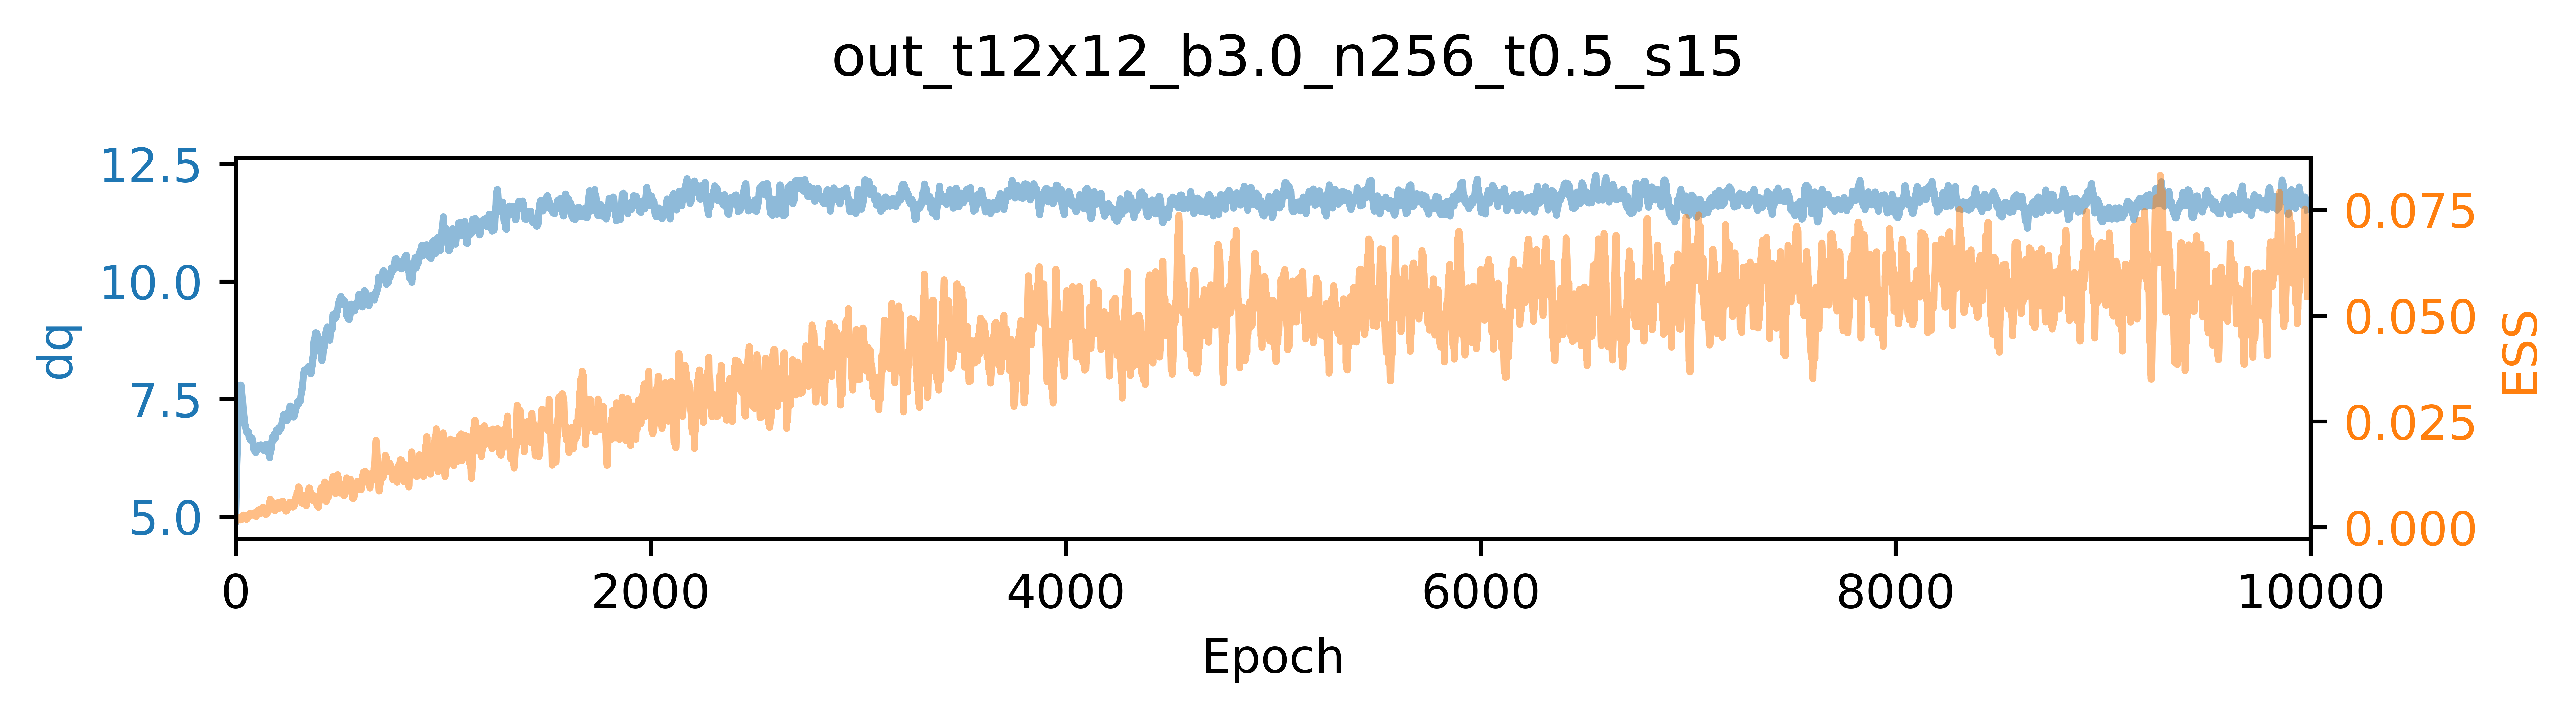

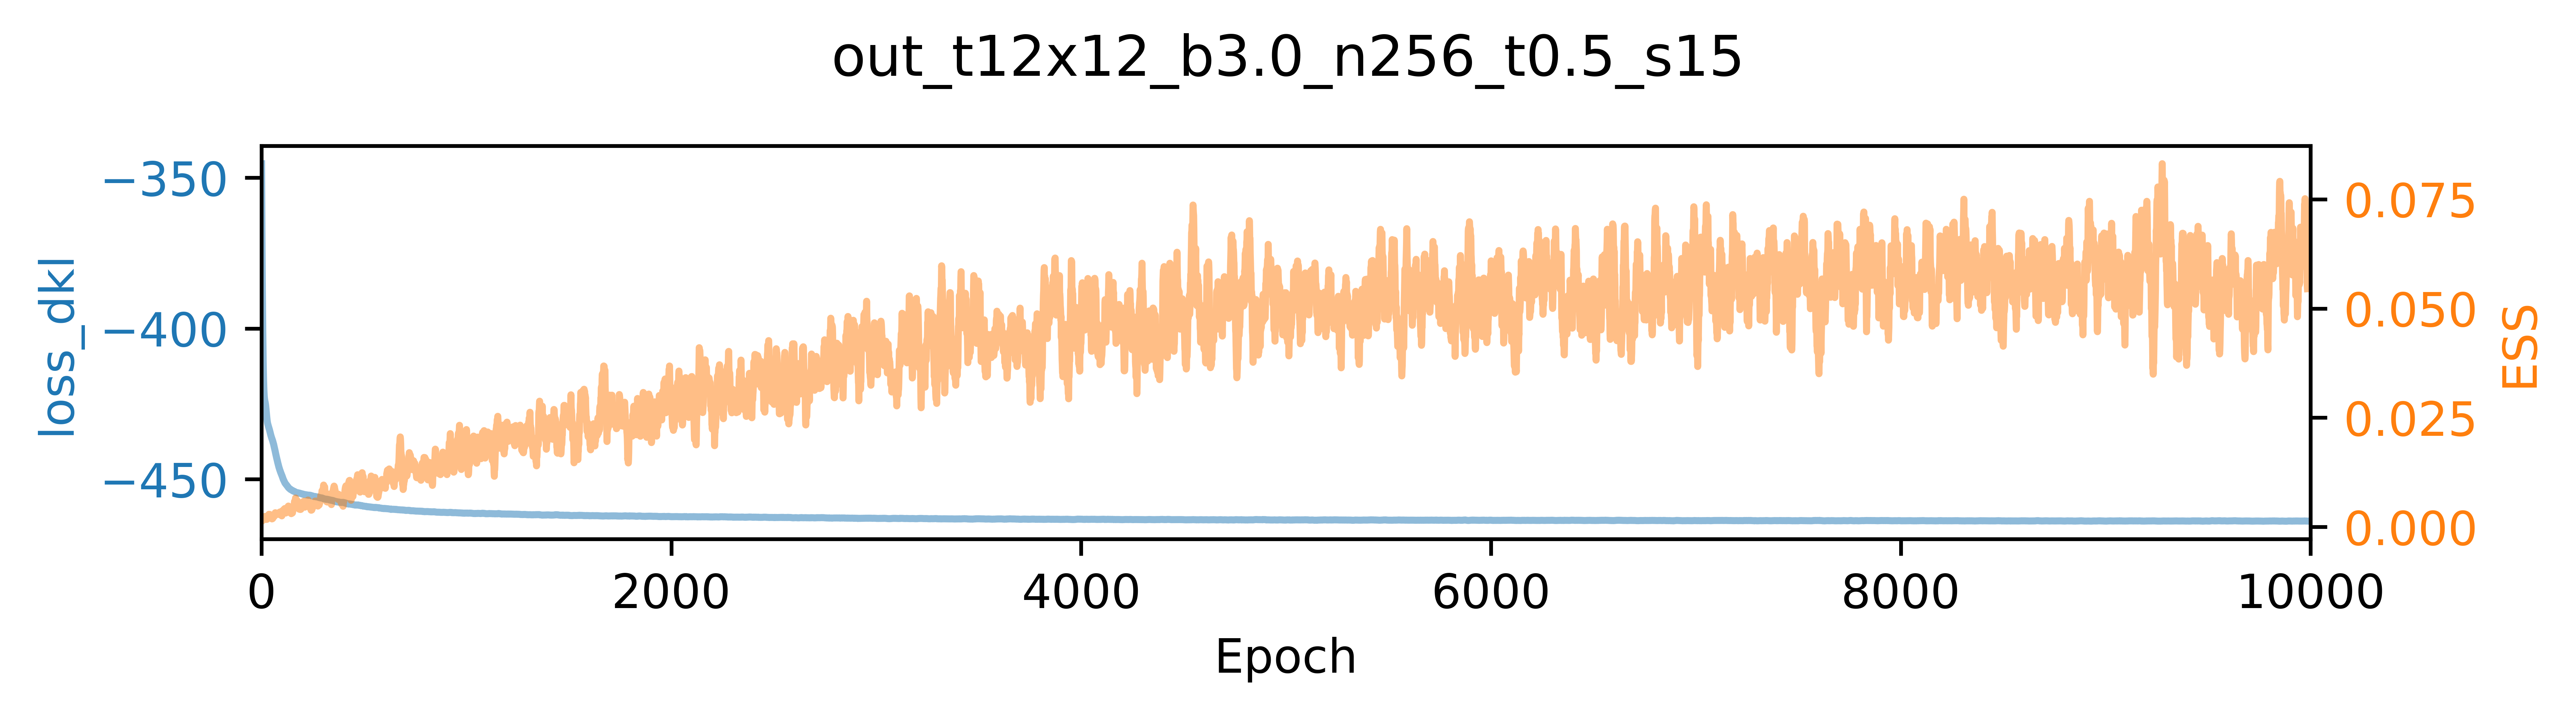

In [7]:
import matplotlib as mpl
from fthmc.train import train

mpl.rcParams['text.usetex'] = False

outputs = train(param,
                train_config,
                model=model_init,
                pre_model=None,
                logger=logger,
                figsize=(7.5, 2))
 
pre_flow_model = outputs['model']
pre_flow_history = outputs['history']
flow_act = outputs['action']

In [8]:
from train import generate_ensemble

outputs = generate_ensemble(pre_flow_model, flow_act, logger=logger)
u1_ens = outputs['ensemble']

pre_flow = pre_flow_model['layers']

[13:54:23]  accept_rate=0.21484375

            top_susceptibility=1.32722 +/- 0.15673

In [9]:
train_force = False
flow_model = None

if train_force:
    flow_model, flow_act = flow_train(param, with_force=True, pre_model=pre_flow_model)
else:
    flow_model = pre_flow_model
    
u1_ens = generate_ensemble(flow_model, flow_act, logger=logger)
flow = flow_model['layers']
# flow.eval()

[13:56:55]  accept_rate=0.08203125

            top_susceptibility=1.26450 +/- 0.12374

TORCH DEVICE: cuda


TrainConfig(n_era=100, n_epoch=100, n_layers=32, n_s_nets=2, hidden_sizes=[8, 8], kernel_size=3, base_lr=0.001, batch_size=1024, print_freq=10, plot_freq=50, with_force=True)

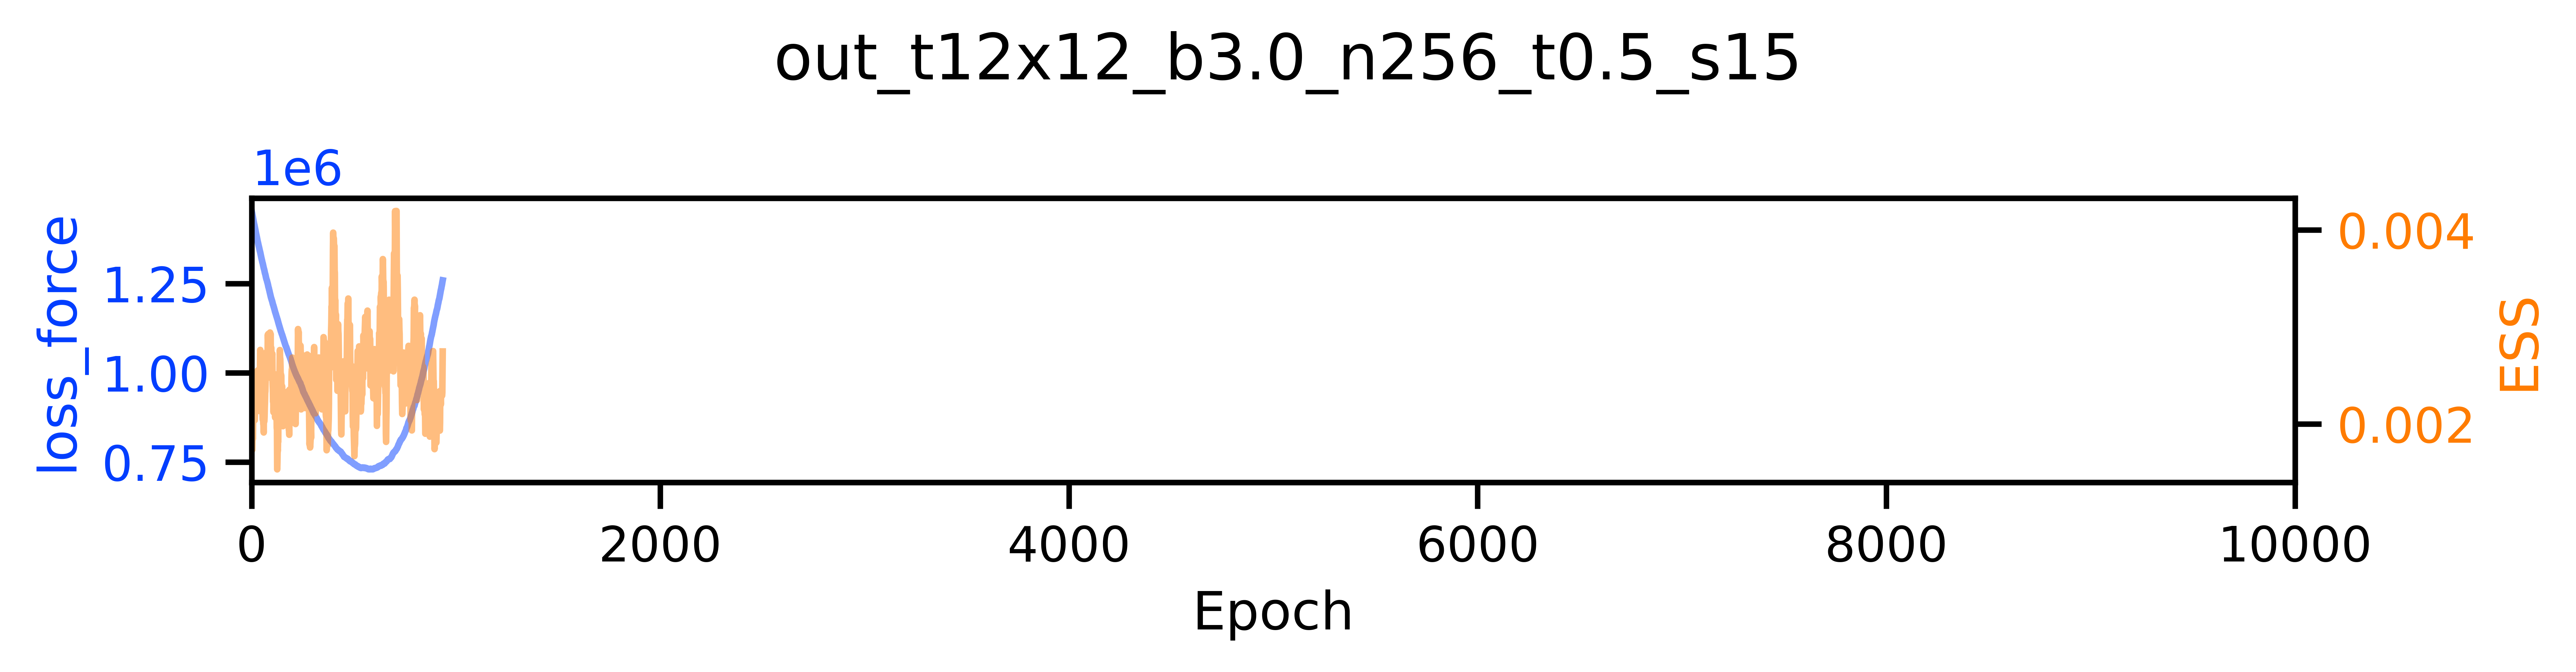

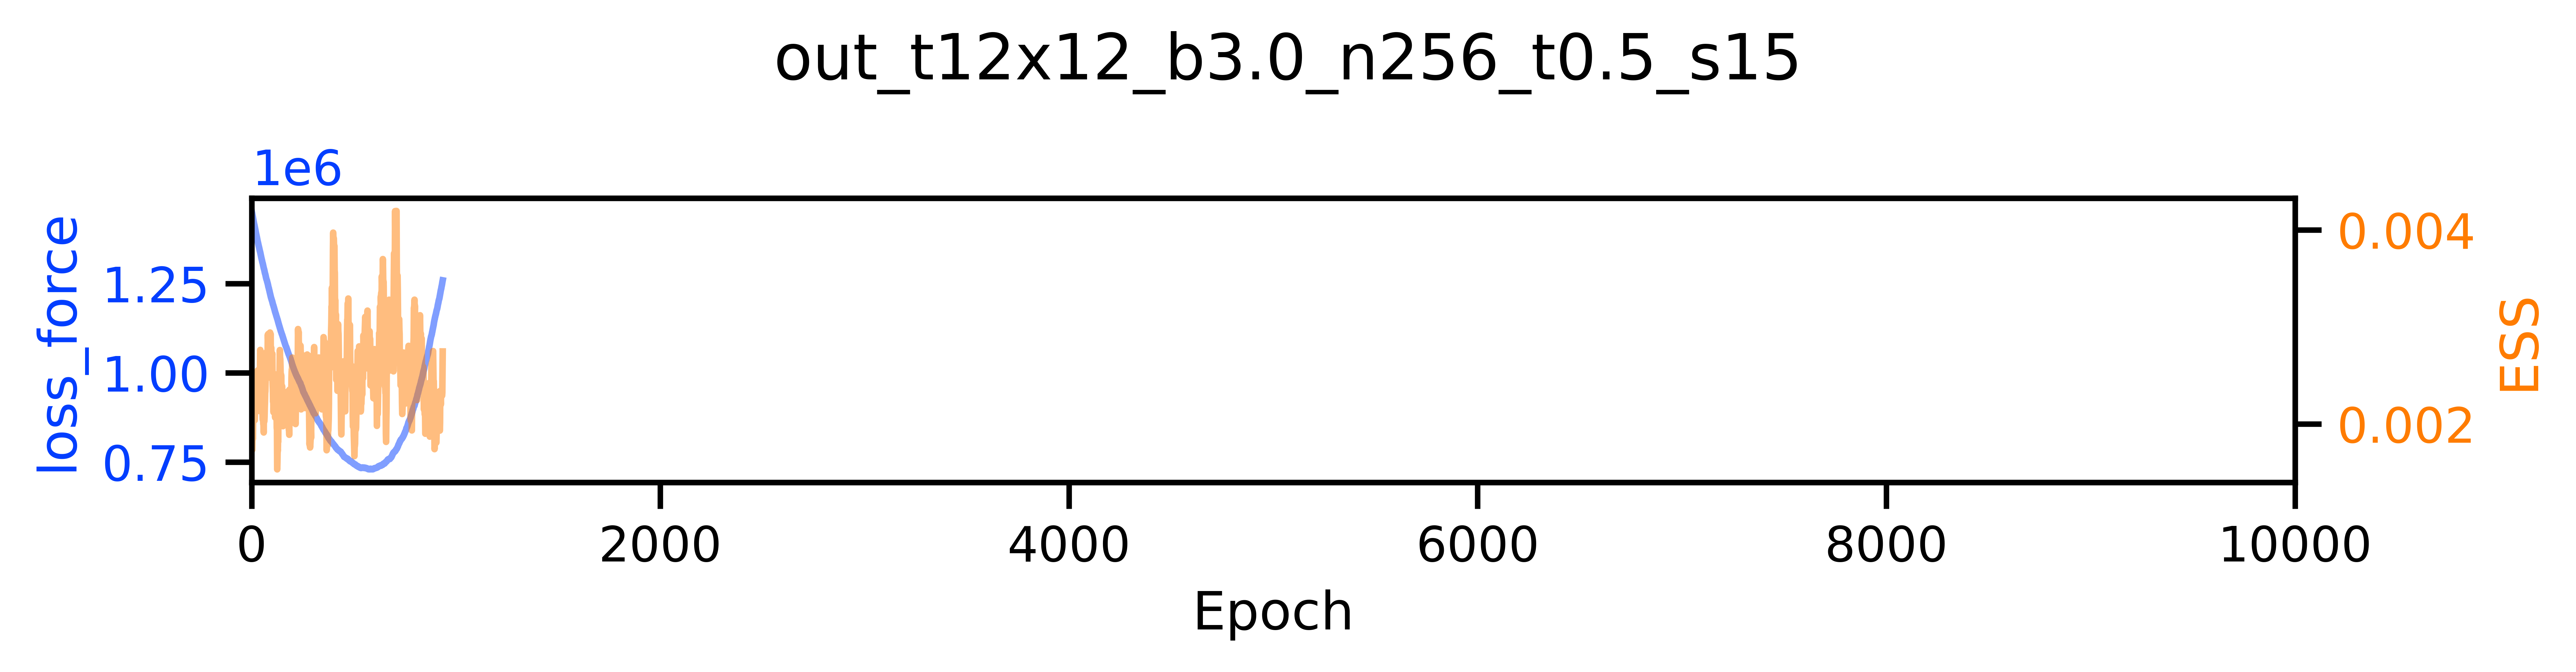

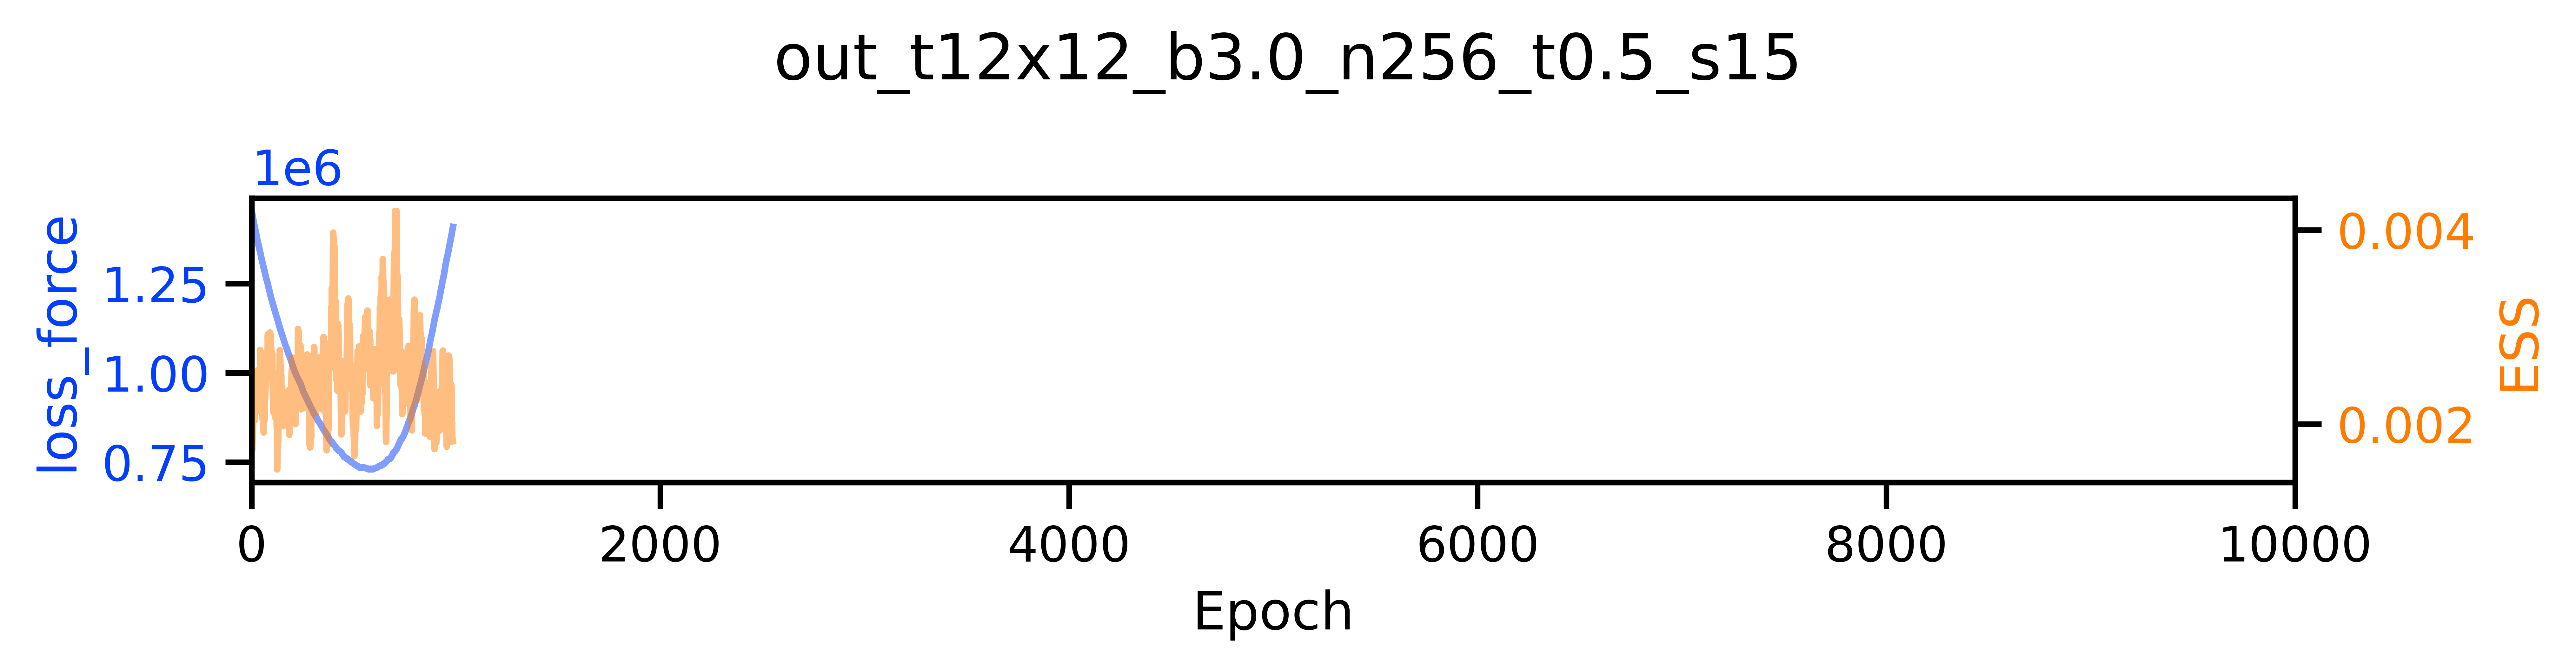

[13:58:36]  -------------------------------------------------------------------                                                                                                                                                                                 
            ERA=0, last took: 0 min 0 s                                                                                                                                                                                                                         
            -------------------------------------------------------------------

[13:58:51]  epoch=7.000 dt=1.048 loss=1455184.625 dq=0.141 ess=0.002 loss_dkl=0.000 logp=347.888 logq=-525.743 loss_force=1455184.650 force_size=1455184.625 force_norm=1206.309

[13:59:01]  epoch=17.000 dt=1.051 loss=1423994.000 dq=0.140 ess=0.002 loss_dkl=0.000 logp=347.970 logq=-524.680 loss_force=1423994.000 force_size=1423994.000 force_norm=1193.311

[13:59:12]  epoch=27.000 dt=1.047 loss=1396694.250 dq=0.157 ess=0.002 loss_dkl=0.000 logp=347.756 logq=-523.634 loss_force=1396694.225 force_size=1396694.250 force_norm=1181.815

[13:59:22]  epoch=37.000 dt=1.042 loss=1367139.625 dq=0.146 ess=0.002 loss_dkl=0.000 logp=347.834 logq=-522.606 loss_force=1367139.550 force_size=1367139.625 force_norm=1169.246

[13:59:33]  epoch=47.000 dt=1.048 loss=1342482.625 dq=0.152 ess=0.003 loss_dkl=0.000 logp=347.699 logq=-521.577 loss_force=1342482.675 force_size=1342482.625 force_norm=1158.655

[13:59:46]  epoch=57.000 dt=1.046 loss=1315486.000 dq=0.147 ess=0.003 loss_dkl=0.000 logp=347.932 logq=-520.569 loss_force=1315486.000 force_size=1315486.000 force_norm=1146.942

[13:59:57]  epoch=67.000 dt=1.044 loss=1293640.375 dq=0.152 ess=0.001 loss_dkl=0.000 logp=347.685 logq=-519.601 loss_force=1293640.400 force_size=1293640.375 force_norm=1137.379

[14:00:07]  epoch=77.000 dt=1.040 loss=1268382.000 dq=0.159 ess=0.002 loss_dkl=0.000 logp=347.758 logq=-518.614 loss_force=1268381.975 force_size=1268382.000 force_norm=1126.222

[14:00:18]  epoch=87.000 dt=1.038 loss=1248578.375 dq=0.165 ess=0.003 loss_dkl=0.000 logp=347.636 logq=-517.640 loss_force=1248578.400 force_size=1248578.375 force_norm=1117.395

[14:00:28]  epoch=97.000 dt=1.047 loss=1220421.625 dq=0.158 ess=0.003 loss_dkl=0.000 logp=347.787 logq=-516.667 loss_force=1220421.650 force_size=1220421.625 force_norm=1104.723

[14:00:31]  -------------------------------------------------------------------                                                                                                                                                                                 
            ERA=1, last took: 1 min 55.01 s                                                                                                                                                                                                                     
            -------------------------------------------------------------------

[14:00:41]  epoch=7.000 dt=1.043 loss=1198024.375 dq=0.179 ess=0.002 loss_dkl=0.000 logp=347.850 logq=-515.736 loss_force=1198024.350 force_size=1198024.375 force_norm=1094.541

[14:00:52]  epoch=17.000 dt=1.038 loss=1179460.000 dq=0.176 ess=0.001 loss_dkl=0.000 logp=347.773 logq=-514.817 loss_force=1179459.875 force_size=1179460.000 force_norm=1086.028

[14:01:02]  epoch=27.000 dt=1.038 loss=1160871.250 dq=0.185 ess=0.001 loss_dkl=0.000 logp=347.628 logq=-513.879 loss_force=1160871.350 force_size=1160871.250 force_norm=1077.435

[14:01:13]  epoch=37.000 dt=1.045 loss=1141491.125 dq=0.192 ess=0.001 loss_dkl=0.000 logp=347.784 logq=-512.930 loss_force=1141491.050 force_size=1141491.125 force_norm=1068.403

[14:01:23]  epoch=47.000 dt=1.043 loss=1121926.625 dq=0.183 ess=0.003 loss_dkl=0.000 logp=347.739 logq=-512.039 loss_force=1121926.575 force_size=1121926.625 force_norm=1059.207

[14:01:37]  epoch=57.000 dt=1.039 loss=1104576.000 dq=0.192 ess=0.002 loss_dkl=0.000 logp=347.836 logq=-511.130 loss_force=1104575.975 force_size=1104576.000 force_norm=1050.987

[14:01:47]  epoch=67.000 dt=1.046 loss=1086027.750 dq=0.193 ess=0.002 loss_dkl=0.000 logp=347.874 logq=-510.255 loss_force=1086027.700 force_size=1086027.750 force_norm=1042.123

[14:01:58]  epoch=77.000 dt=1.036 loss=1069636.750 dq=0.213 ess=0.003 loss_dkl=0.000 logp=347.663 logq=-509.395 loss_force=1069636.675 force_size=1069636.750 force_norm=1034.231

[14:02:08]  epoch=87.000 dt=1.038 loss=1051072.375 dq=0.204 ess=0.002 loss_dkl=0.000 logp=348.061 logq=-508.486 loss_force=1051072.400 force_size=1051072.375 force_norm=1025.214

[14:02:19]  epoch=97.000 dt=1.038 loss=1041475.000 dq=0.207 ess=0.003 loss_dkl=0.000 logp=347.669 logq=-507.674 loss_force=1041475.012 force_size=1041475.000 force_norm=1020.524

[14:02:21]  -------------------------------------------------------------------                                                                                                                                                                                 
            ERA=2, last took: 1 min 50.43 s                                                                                                                                                                                                                     
            -------------------------------------------------------------------

[14:02:32]  epoch=7.000 dt=1.037 loss=1018385.875 dq=0.217 ess=0.002 loss_dkl=0.000 logp=347.947 logq=-506.782 loss_force=1018385.900 force_size=1018385.875 force_norm=1009.151

[14:02:42]  epoch=17.000 dt=1.044 loss=1004782.000 dq=0.223 ess=0.002 loss_dkl=0.000 logp=348.000 logq=-505.950 loss_force=1004782.050 force_size=1004782.000 force_norm=1002.385

[14:02:53]  epoch=27.000 dt=1.053 loss=991978.000 dq=0.223 ess=0.002 loss_dkl=0.000 logp=347.879 logq=-505.119 loss_force=991978.025 force_size=991978.000 force_norm=995.980

[14:03:03]  epoch=37.000 dt=1.048 loss=979169.875 dq=0.237 ess=0.002 loss_dkl=0.000 logp=347.869 logq=-504.292 loss_force=979169.925 force_size=979169.875 force_norm=989.523

[14:03:14]  epoch=47.000 dt=1.040 loss=968204.688 dq=0.244 ess=0.002 loss_dkl=0.000 logp=347.487 logq=-503.514 loss_force=968204.700 force_size=968204.688 force_norm=983.971

[14:03:27]  epoch=57.000 dt=1.047 loss=951430.875 dq=0.233 ess=0.003 loss_dkl=0.000 logp=347.999 logq=-502.650 loss_force=951430.900 force_size=951430.875 force_norm=975.411

[14:03:38]  epoch=67.000 dt=1.046 loss=938171.000 dq=0.265 ess=0.002 loss_dkl=0.000 logp=347.835 logq=-501.861 loss_force=938170.975 force_size=938171.000 force_norm=968.591

[14:03:48]  epoch=77.000 dt=1.039 loss=925375.688 dq=0.249 ess=0.003 loss_dkl=0.000 logp=347.911 logq=-501.058 loss_force=925375.750 force_size=925375.688 force_norm=961.962

[14:03:59]  epoch=87.000 dt=1.051 loss=916438.000 dq=0.255 ess=0.002 loss_dkl=0.000 logp=347.874 logq=-500.272 loss_force=916438.088 force_size=916438.000 force_norm=957.304

[14:04:09]  epoch=97.000 dt=1.043 loss=902647.188 dq=0.271 ess=0.002 loss_dkl=0.000 logp=347.771 logq=-499.510 loss_force=902647.200 force_size=902647.188 force_norm=950.077

[14:04:12]  -------------------------------------------------------------------                                                                                                                                                                                 
            ERA=3, last took: 1 min 50.73 s                                                                                                                                                                                                                     
            -------------------------------------------------------------------

[14:04:23]  epoch=7.000 dt=1.051 loss=891921.375 dq=0.272 ess=0.003 loss_dkl=0.000 logp=347.819 logq=-498.727 loss_force=891921.375 force_size=891921.375 force_norm=944.413

[14:04:33]  epoch=17.000 dt=1.043 loss=880163.625 dq=0.294 ess=0.002 loss_dkl=0.000 logp=347.901 logq=-497.929 loss_force=880163.650 force_size=880163.625 force_norm=938.168

[14:04:44]  epoch=27.000 dt=1.040 loss=872143.812 dq=0.281 ess=0.003 loss_dkl=0.000 logp=347.665 logq=-497.239 loss_force=872143.863 force_size=872143.812 force_norm=933.884

[14:04:54]  epoch=37.000 dt=1.048 loss=862143.125 dq=0.299 ess=0.002 loss_dkl=0.000 logp=347.803 logq=-496.448 loss_force=862143.062 force_size=862143.125 force_norm=928.515

[14:05:05]  epoch=47.000 dt=1.045 loss=853615.188 dq=0.305 ess=0.002 loss_dkl=0.000 logp=347.836 logq=-495.729 loss_force=853615.250 force_size=853615.188 force_norm=923.908

[14:05:18]  epoch=57.000 dt=1.041 loss=843901.812 dq=0.321 ess=0.003 loss_dkl=0.000 logp=347.652 logq=-494.991 loss_force=843901.850 force_size=843901.812 force_norm=918.639

[14:05:29]  epoch=67.000 dt=1.041 loss=832520.438 dq=0.359 ess=0.002 loss_dkl=0.000 logp=347.900 logq=-494.245 loss_force=832520.463 force_size=832520.438 force_norm=912.424

[14:05:39]  epoch=77.000 dt=1.046 loss=824628.125 dq=0.394 ess=0.002 loss_dkl=0.000 logp=347.862 logq=-493.549 loss_force=824628.125 force_size=824628.125 force_norm=908.087

[14:05:50]  epoch=87.000 dt=1.044 loss=811238.125 dq=0.370 ess=0.002 loss_dkl=0.000 logp=347.918 logq=-492.787 loss_force=811238.050 force_size=811238.125 force_norm=900.680

[14:06:00]  epoch=97.000 dt=1.052 loss=806852.875 dq=0.383 ess=0.002 loss_dkl=0.000 logp=347.955 logq=-492.106 loss_force=806852.875 force_size=806852.875 force_norm=898.246

[14:06:03]  -------------------------------------------------------------------                                                                                                                                                                                 
            ERA=4, last took: 1 min 51.04 s                                                                                                                                                                                                                     
            -------------------------------------------------------------------

[14:06:14]  epoch=7.000 dt=1.056 loss=799370.312 dq=0.397 ess=0.004 loss_dkl=0.000 logp=347.922 logq=-491.415 loss_force=799370.350 force_size=799370.312 force_norm=894.073

[14:06:24]  epoch=17.000 dt=1.044 loss=793839.375 dq=0.427 ess=0.003 loss_dkl=0.000 logp=347.932 logq=-490.780 loss_force=793839.375 force_size=793839.375 force_norm=890.976

[14:06:35]  epoch=27.000 dt=1.051 loss=784285.625 dq=0.433 ess=0.003 loss_dkl=0.000 logp=347.873 logq=-490.067 loss_force=784285.613 force_size=784285.625 force_norm=885.595

[14:06:45]  epoch=37.000 dt=1.042 loss=782032.438 dq=0.468 ess=0.003 loss_dkl=0.000 logp=347.733 logq=-489.465 loss_force=782032.438 force_size=782032.438 force_norm=884.322

[14:06:56]  epoch=47.000 dt=1.055 loss=777374.625 dq=0.531 ess=0.002 loss_dkl=0.000 logp=347.481 logq=-488.871 loss_force=777374.650 force_size=777374.625 force_norm=881.688

[14:07:09]  epoch=57.000 dt=1.044 loss=765610.375 dq=0.524 ess=0.003 loss_dkl=0.000 logp=347.946 logq=-488.131 loss_force=765610.350 force_size=765610.375 force_norm=874.989

[14:07:20]  epoch=67.000 dt=1.047 loss=759216.188 dq=0.578 ess=0.002 loss_dkl=0.000 logp=348.001 logq=-487.487 loss_force=759216.175 force_size=759216.188 force_norm=871.328

[14:07:31]  epoch=77.000 dt=1.052 loss=758627.312 dq=0.550 ess=0.003 loss_dkl=0.000 logp=347.737 logq=-486.998 loss_force=758627.300 force_size=758627.312 force_norm=870.990

[14:07:41]  epoch=87.000 dt=1.041 loss=750645.625 dq=0.600 ess=0.002 loss_dkl=0.000 logp=347.784 logq=-486.328 loss_force=750645.575 force_size=750645.625 force_norm=866.394

[14:07:52]  epoch=97.000 dt=1.041 loss=750790.375 dq=0.651 ess=0.002 loss_dkl=0.000 logp=347.691 logq=-485.774 loss_force=750790.338 force_size=750790.375 force_norm=866.474

[14:07:54]  -------------------------------------------------------------------                                                                                                                                                                                 
            ERA=5, last took: 1 min 51.39 s                                                                                                                                                                                                                     
            -------------------------------------------------------------------

[14:08:05]  epoch=7.000 dt=1.046 loss=744636.125 dq=0.681 ess=0.002 loss_dkl=0.000 logp=347.754 logq=-485.222 loss_force=744636.162 force_size=744636.125 force_norm=862.922

[14:08:16]  epoch=17.000 dt=1.044 loss=742321.750 dq=0.753 ess=0.002 loss_dkl=0.000 logp=347.765 logq=-484.660 loss_force=742321.713 force_size=742321.750 force_norm=861.578

[14:08:26]  epoch=27.000 dt=1.043 loss=738273.062 dq=0.819 ess=0.003 loss_dkl=0.000 logp=347.801 logq=-484.165 loss_force=738273.050 force_size=738273.062 force_norm=859.224

[14:08:37]  epoch=37.000 dt=1.055 loss=733814.000 dq=0.879 ess=0.002 loss_dkl=0.000 logp=347.740 logq=-483.628 loss_force=733814.000 force_size=733814.000 force_norm=856.628

[14:08:47]  epoch=47.000 dt=1.045 loss=734298.625 dq=0.929 ess=0.002 loss_dkl=0.000 logp=347.820 logq=-483.096 loss_force=734298.662 force_size=734298.625 force_norm=856.909

[14:09:01]  epoch=57.000 dt=1.053 loss=734534.625 dq=1.028 ess=0.003 loss_dkl=0.000 logp=347.649 logq=-482.678 loss_force=734534.550 force_size=734534.625 force_norm=857.045

[14:09:11]  epoch=67.000 dt=1.045 loss=734458.000 dq=1.081 ess=0.003 loss_dkl=0.000 logp=347.578 logq=-482.240 loss_force=734457.988 force_size=734458.000 force_norm=857.003

[14:09:22]  epoch=77.000 dt=1.048 loss=729460.625 dq=1.163 ess=0.002 loss_dkl=0.000 logp=347.812 logq=-481.749 loss_force=729460.562 force_size=729460.625 force_norm=854.079

[14:09:32]  epoch=87.000 dt=1.044 loss=731330.312 dq=1.255 ess=0.002 loss_dkl=0.000 logp=347.924 logq=-481.323 loss_force=731330.275 force_size=731330.312 force_norm=855.176

[14:09:43]  epoch=97.000 dt=1.055 loss=727174.375 dq=1.340 ess=0.002 loss_dkl=0.000 logp=348.019 logq=-480.868 loss_force=727174.387 force_size=727174.375 force_norm=852.742

[14:09:46]  -------------------------------------------------------------------                                                                                                                                                                                 
            ERA=6, last took: 1 min 51.39 s                                                                                                                                                                                                                     
            -------------------------------------------------------------------

[14:09:56]  epoch=7.000 dt=1.054 loss=732015.625 dq=1.494 ess=0.002 loss_dkl=0.000 logp=347.736 logq=-480.583 loss_force=732015.600 force_size=732015.625 force_norm=855.579

[14:10:07]  epoch=17.000 dt=1.043 loss=731425.188 dq=1.614 ess=0.002 loss_dkl=0.000 logp=348.020 logq=-480.251 loss_force=731425.200 force_size=731425.188 force_norm=855.233

[14:10:18]  epoch=27.000 dt=1.051 loss=736635.375 dq=1.774 ess=0.002 loss_dkl=0.000 logp=347.948 logq=-479.881 loss_force=736635.438 force_size=736635.375 force_norm=858.272

[14:10:28]  epoch=37.000 dt=1.055 loss=739362.625 dq=1.823 ess=0.003 loss_dkl=0.000 logp=347.741 logq=-479.670 loss_force=739362.550 force_size=739362.625 force_norm=859.856

[14:10:39]  epoch=47.000 dt=1.047 loss=742289.312 dq=2.025 ess=0.004 loss_dkl=0.000 logp=347.758 logq=-479.433 loss_force=742289.338 force_size=742289.312 force_norm=861.557

[14:10:52]  epoch=57.000 dt=1.051 loss=749645.375 dq=2.217 ess=0.003 loss_dkl=0.000 logp=347.952 logq=-479.211 loss_force=749645.412 force_size=749645.375 force_norm=865.810

[14:11:03]  epoch=67.000 dt=1.056 loss=752855.250 dq=2.468 ess=0.002 loss_dkl=0.000 logp=347.672 logq=-479.019 loss_force=752855.262 force_size=752855.250 force_norm=867.668

[14:11:14]  epoch=77.000 dt=1.047 loss=758212.812 dq=2.589 ess=0.003 loss_dkl=0.000 logp=347.782 logq=-478.803 loss_force=758212.863 force_size=758212.812 force_norm=870.752

[14:11:24]  epoch=87.000 dt=1.048 loss=759237.688 dq=2.767 ess=0.003 loss_dkl=0.000 logp=347.882 logq=-478.626 loss_force=759237.688 force_size=759237.688 force_norm=871.336

[14:11:35]  epoch=97.000 dt=1.046 loss=770334.812 dq=3.017 ess=0.003 loss_dkl=0.000 logp=347.883 logq=-478.534 loss_force=770334.787 force_size=770334.812 force_norm=877.679

[14:11:38]  -------------------------------------------------------------------                                                                                                                                                                                 
            ERA=7, last took: 1 min 51.76 s                                                                                                                                                                                                                     
            -------------------------------------------------------------------

[14:11:48]  epoch=7.000 dt=1.047 loss=779374.312 dq=3.316 ess=0.005 loss_dkl=0.000 logp=347.829 logq=-478.530 loss_force=779374.312 force_size=779374.312 force_norm=882.815

[14:11:59]  epoch=17.000 dt=1.047 loss=786676.625 dq=3.524 ess=0.004 loss_dkl=0.000 logp=347.873 logq=-478.398 loss_force=786676.575 force_size=786676.625 force_norm=886.943

[14:12:09]  epoch=27.000 dt=1.049 loss=798381.562 dq=4.012 ess=0.003 loss_dkl=0.000 logp=347.664 logq=-478.406 loss_force=798381.537 force_size=798381.562 force_norm=893.521

[14:12:20]  epoch=37.000 dt=1.059 loss=812409.062 dq=4.331 ess=0.003 loss_dkl=0.000 logp=347.590 logq=-478.581 loss_force=812409.088 force_size=812409.062 force_norm=901.331

[14:12:31]  epoch=47.000 dt=1.049 loss=817416.125 dq=4.571 ess=0.003 loss_dkl=0.000 logp=347.910 logq=-478.662 loss_force=817416.125 force_size=817416.125 force_norm=904.109

[14:12:44]  epoch=57.000 dt=1.051 loss=832625.125 dq=5.102 ess=0.003 loss_dkl=0.000 logp=347.796 logq=-478.849 loss_force=832625.175 force_size=832625.125 force_norm=912.479

[14:12:55]  epoch=67.000 dt=1.051 loss=845221.625 dq=5.584 ess=0.003 loss_dkl=0.000 logp=348.112 logq=-478.896 loss_force=845221.650 force_size=845221.625 force_norm=919.358

[14:13:05]  epoch=77.000 dt=1.049 loss=865471.125 dq=6.124 ess=0.002 loss_dkl=0.000 logp=347.635 logq=-479.264 loss_force=865471.075 force_size=865471.125 force_norm=930.304

[14:13:16]  epoch=87.000 dt=1.059 loss=875323.500 dq=6.780 ess=0.002 loss_dkl=0.000 logp=347.768 logq=-479.415 loss_force=875323.500 force_size=875323.500 force_norm=935.584

[14:13:27]  epoch=97.000 dt=1.060 loss=897938.375 dq=7.500 ess=0.003 loss_dkl=0.000 logp=347.648 logq=-479.805 loss_force=897938.375 force_size=897938.375 force_norm=947.595

[14:13:29]  -------------------------------------------------------------------                                                                                                                                                                                 
            ERA=8, last took: 1 min 51.95 s                                                                                                                                                                                                                     
            -------------------------------------------------------------------

[14:13:40]  epoch=7.000 dt=1.057 loss=916489.000 dq=8.232 ess=0.004 loss_dkl=0.000 logp=347.930 logq=-480.176 loss_force=916488.950 force_size=916489.000 force_norm=957.327

[14:13:51]  epoch=17.000 dt=1.049 loss=930821.125 dq=8.918 ess=0.003 loss_dkl=0.000 logp=347.990 logq=-480.504 loss_force=930821.037 force_size=930821.125 force_norm=964.789

[14:14:02]  epoch=27.000 dt=1.059 loss=958236.500 dq=9.864 ess=0.004 loss_dkl=0.000 logp=347.763 logq=-481.104 loss_force=958236.537 force_size=958236.500 force_norm=978.891

[14:14:12]  epoch=37.000 dt=1.051 loss=975650.812 dq=10.614 ess=0.002 loss_dkl=0.000 logp=348.142 logq=-481.431 loss_force=975650.800 force_size=975650.812 force_norm=987.744

[14:14:23]  epoch=47.000 dt=1.053 loss=997784.188 dq=11.593 ess=0.002 loss_dkl=0.000 logp=347.821 logq=-482.078 loss_force=997784.238 force_size=997784.188 force_norm=998.888

[14:14:36]  epoch=57.000 dt=1.060 loss=1024445.812 dq=12.329 ess=0.002 loss_dkl=0.000 logp=347.924 logq=-482.594 loss_force=1024445.775 force_size=1024445.812 force_norm=1012.138

[14:14:47]  epoch=67.000 dt=1.061 loss=1050477.375 dq=12.710 ess=0.003 loss_dkl=0.000 logp=347.971 logq=-483.244 loss_force=1050477.425 force_size=1050477.375 force_norm=1024.914

[14:14:58]  epoch=77.000 dt=1.053 loss=1079299.250 dq=13.596 ess=0.002 loss_dkl=0.000 logp=347.981 logq=-483.906 loss_force=1079299.300 force_size=1079299.250 force_norm=1038.870

[14:15:08]  epoch=87.000 dt=1.054 loss=1106568.750 dq=14.378 ess=0.003 loss_dkl=0.000 logp=347.693 logq=-484.653 loss_force=1106568.900 force_size=1106568.750 force_norm=1051.930

[14:15:19]  epoch=97.000 dt=1.049 loss=1134425.500 dq=15.186 ess=0.002 loss_dkl=0.000 logp=347.668 logq=-485.386 loss_force=1134425.500 force_size=1134425.500 force_norm=1065.084

[14:15:22]  -------------------------------------------------------------------                                                                                                                                                                                 
            ERA=9, last took: 1 min 52.28 s                                                                                                                                                                                                                     
            -------------------------------------------------------------------

[14:15:32]  epoch=7.000 dt=1.051 loss=1163916.125 dq=15.479 ess=0.001 loss_dkl=0.000 logp=347.754 logq=-486.102 loss_force=1163916.100 force_size=1163916.125 force_norm=1078.841

[14:15:43]  epoch=17.000 dt=1.054 loss=1186485.625 dq=16.105 ess=0.002 loss_dkl=0.000 logp=347.915 logq=-486.769 loss_force=1186485.600 force_size=1186485.625 force_norm=1089.252

[14:15:54]  epoch=27.000 dt=1.048 loss=1217753.375 dq=17.125 ess=0.002 loss_dkl=0.000 logp=347.648 logq=-487.752 loss_force=1217753.375 force_size=1217753.375 force_norm=1103.507

[14:16:04]  epoch=37.000 dt=1.048 loss=1246536.250 dq=17.698 ess=0.003 loss_dkl=0.000 logp=347.609 logq=-488.460 loss_force=1246536.200 force_size=1246536.250 force_norm=1116.475

[14:16:15]  epoch=47.000 dt=1.047 loss=1270810.875 dq=18.083 ess=0.003 loss_dkl=0.000 logp=347.687 logq=-489.238 loss_force=1270810.875 force_size=1270810.875 force_norm=1127.292

[14:16:28]  epoch=57.000 dt=1.049 loss=1306930.250 dq=18.489 ess=0.001 loss_dkl=0.000 logp=348.221 logq=-490.052 loss_force=1306930.350 force_size=1306930.250 force_norm=1143.206

[14:16:39]  epoch=67.000 dt=1.049 loss=1327060.750 dq=18.915 ess=0.002 loss_dkl=0.000 logp=347.723 logq=-490.789 loss_force=1327060.725 force_size=1327060.750 force_norm=1151.972

[14:16:50]  epoch=77.000 dt=1.060 loss=1371043.250 dq=19.619 ess=0.003 loss_dkl=0.000 logp=347.689 logq=-491.708 loss_force=1371043.125 force_size=1371043.250 force_norm=1170.911

[14:17:01]  epoch=87.000 dt=1.053 loss=1391228.000 dq=19.740 ess=0.002 loss_dkl=0.000 logp=347.732 logq=-492.478 loss_force=1391228.025 force_size=1391228.000 force_norm=1179.499

[14:17:11]  epoch=97.000 dt=1.051 loss=1424058.250 dq=20.814 ess=0.001 loss_dkl=0.000 logp=348.111 logq=-493.283 loss_force=1424058.225 force_size=1424058.250 force_norm=1193.334

[14:17:14]  -------------------------------------------------------------------                                                                                                                                                                                 
            ERA=10, last took: 1 min 52.14 s                                                                                                                                                                                                                    
            -------------------------------------------------------------------

KeyboardInterrupt: 

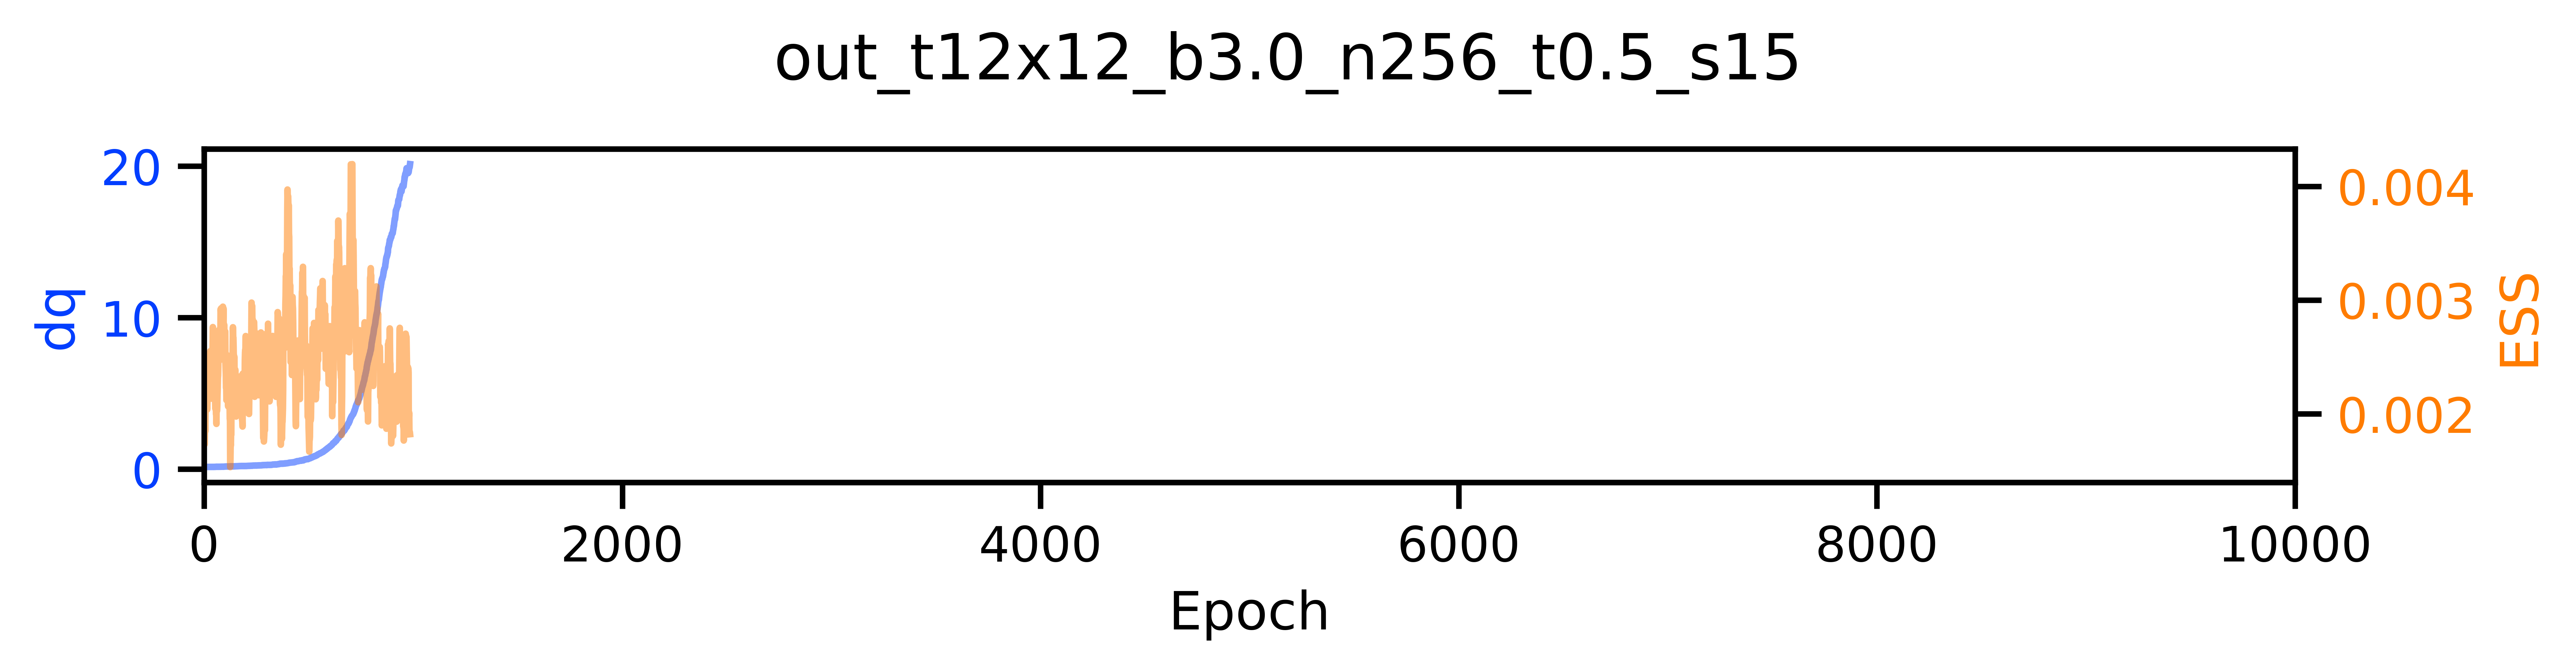

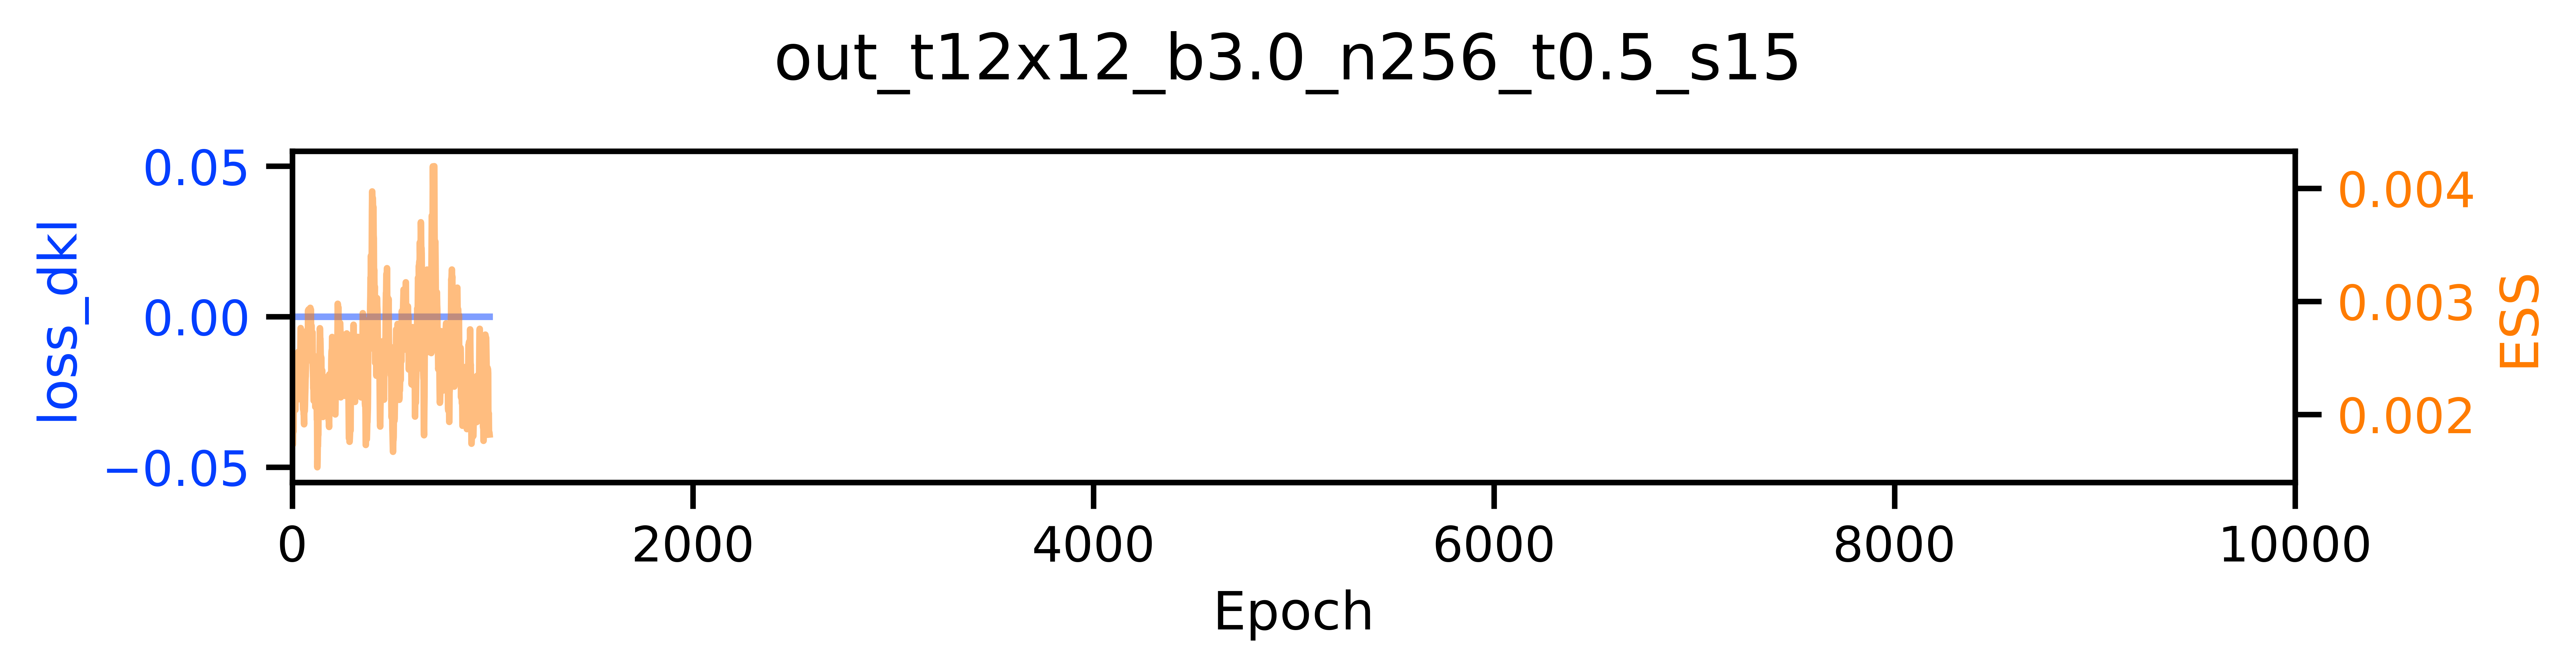

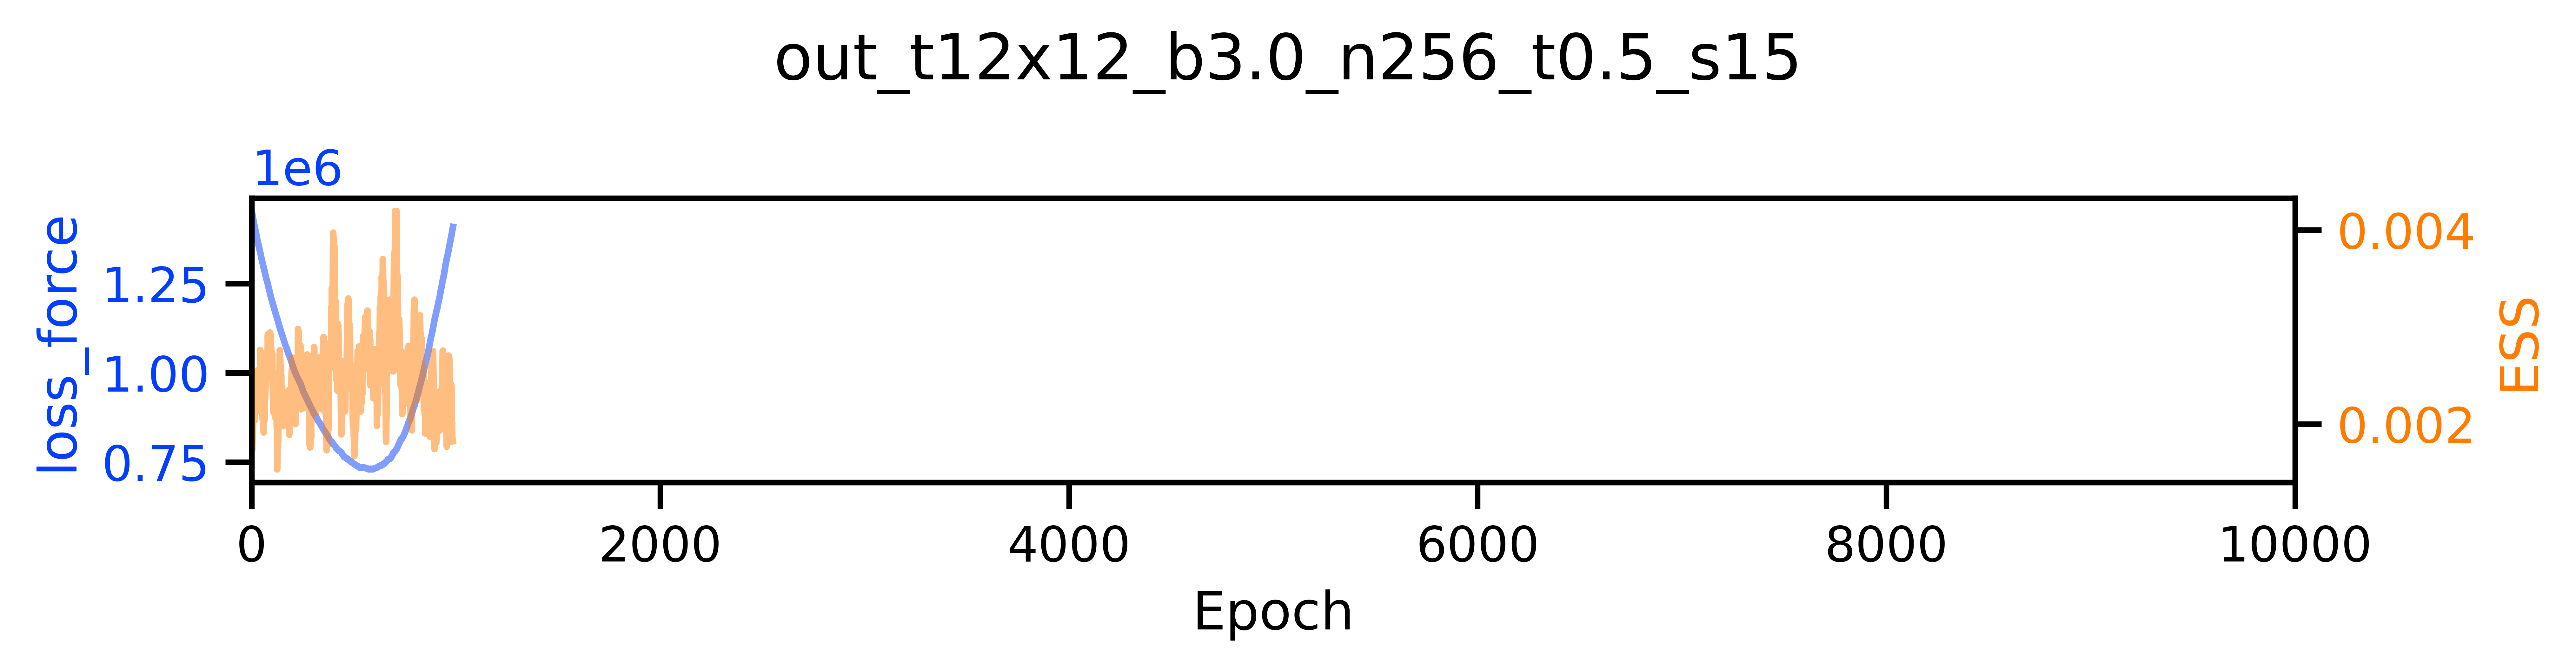

In [10]:
import seaborn as sns

from dataclasses import asdict
from copy import deepcopy
from utils.distributions import MultivariateUniform
from utils.layers import make_u1_equiv_layers, set_weights
from math import pi as PI
import utils.qed_helpers as qed

TWO_PI = 2 * PI
# from train import train

sns.set_context('notebook')
sns.set_palette('bright')

train_cfg_force = asdict(train_config)
train_cfg_force['with_force'] = True

tconfig_force = TrainConfig(**train_cfg_force)

link_shape = (2, *param.lat)
lattice_shape = tuple(param.lat)
u1_action = qed.BatchAction(param.beta)

prior = MultivariateUniform(torch.zeros(link_shape),
                            TWO_PI * torch.ones(link_shape))

tconfig_force
layers = make_u1_equiv_layers(lattice_shape=lattice_shape,
                              n_layers=tconfig_force.n_layers,
                              n_mixture_comps=tconfig_force.n_s_nets,
                              hidden_sizes=tconfig_force.hidden_sizes,
                              kernel_size=tconfig_force.kernel_size)

set_weights(layers)

model_force = {
    'prior': prior,
    'layers': layers,
}
                              

outputs = train(param, tconfig_force,
                model=model_force,
                pre_model=pre_flow_model,
                figsize=(8, 2.),
                use_alt=False,
                force_factor=0.001,
                dkl_factor=1.)#, logger=logger)

flow_model_force = outputs['model']
flow_model_force_history = outputs['history']
flow_action_force = outputs['action']

In [ ]:
def test_force(
    param: Param,
    model: dict,
    x: torch.Tensor = None,
    pre_model: dict = None
):
    """Test the force.
    
    If `x` is None:
      - Draw samples `xi (~ pre_prior)` from prior and pass through `pre_model` to get `x (~ pre_posterior)`.
     
    Pass `x` backwards through the `model` to get `xi (~ prior)`.
    
    Calculate `force(xi)` and `norm(force(xi))`.
    """
    if x is None:
        if pre_model is None:
            raise ValueError(f'Either `x` or `pre_model` must be specified.')
            
        # Draw samples `xi` from prior
        pre_xi = pre_model['prior'].sample_n(1)
        
        # Pass `xi` through layers in `pre_model`
        x = qed.ft_flow(pre_model['layers'], pre_xi)
        
    # Pass `x` backwards through layers in `model`
    xi = qed.ft_flow_inv(model['layers'], x)
    # Calculate force
    force = qed.ft_force(param, model['layers'], xi)
    force_norm = torch.linalg.norm(force)
    return force_norm

In [ ]:
from train import run as hmc_run
fields, metrics = hmc_run(param, logger=logger, keep_fields=True)

#metrics_dir = os.path.join(OUTDIR, 'metrics', 'hmc')
#metrics_file = os.path.join(metrics_dir, 'metrics.z')
#io.savez(metrics, metrics_file)

In [ ]:
#field_arr = torch.stack(tuple(fields.values()), dim=0)
len(fields)
#
field_arr = np.array([qed.grab(torch.stack(i)) for i in fields])
field_arr.shape
#logger.log(field_arr.shape)

In [ ]:
for field in field_arr:
    force_tf = test_force(param, flow_model_force, pre_model=pre_flow_model)
    logger.log(f'ft_flow(players, pxi), (pxi ~ pre_prior): {force_tf:.5g}') 
    
    x = torch.from_numpy(field[-1]).squeeze()[None, :]
    if torch.cuda.is_available():
        x = x.cuda()
    
    #x_ = field_arr.squeeze()[None, :]
    force_ = test_force(param, flow_model_force, x=x, pre_model=pre_flow_model)
    logger.log(f'ft_flow(layers, field_arr), (pxi ~ pre_prior): {force_:.5g}')

In [ ]:
# field_arr generated from generic HMC run
for idx, fields in enumerate(field_arr):
    # x generated from HMC
    x = torch.from_numpy(fields)
    if torch.cuda.is_available():
        x = x.cuda()
        
    # flow HMC samples backwards through `flow_model_force` and calculate force
    force1 = test_force(param, flow_model_force, x=x)
    
    # sample x ~ pre_flow_model_prior, flow through `pre_flow_model` to get xi 
    # flow xi backwards through `flow_model_force` and calculate force
    force2 = test_force(param, flow_model_force, pre_model=pre_flow_model)
    
    logger.log(f'run={idx}\n'
               f'  (xi ~ HMC): force_xi={force1:.5g}\n'
               f"  (xi ~ pre_flow_model_prior): force_xi_pre={force2:.5g}")

In [ ]:
#field_run = torch.stack(tuple(fields.values()), dim=0)
##flows = flow

#x0 = field_arr[0][None, :]
#x = field_arr[0][None, :]

# select last trajectory from last run
x = torch.from_numpy(field_arr[-1][-1][None, :]).cuda()
x0 = torch.from_numpy(field_arr[-1][-1][None, :]).cuda()

if torch.cuda.is_available():
    x = x.cuda()

plaq0 = qed.action(param, x) / (-param.beta * param.volume)
logger.log(f'plaq(field_arr[0])={plaq0:.8g}')

#logger\.log(f'plaq(field_run[0]) {qed.action(param, x) / (-param.beta*param.volume)}')
# field.requires_grad_(True)
#x = field_run[0][None, :]
logJ = 0.0
for layer in reversed(flow_model_force['layers']):
    x, lJ = layer.reverse(x)
    logJ += lJ

# x is the prior distribution now
    
x.requires_grad_(True)
    
y = x
logJy = 0.0
for layer in flow_model_force['layers']:
    y, lJ = layer.forward(y)
    logJy += lJ
    
s = qed.action(param, y[0][None, :]) - logJy

logger.log(f'sum(logJ): {qed.grab(logJ.sum())}')
logger.log(f'sum(logJy): {qed.grab(logJy.sum())}')
#print(logJ,logJy)


# print("eff_action", s + 136.3786)

logger.log(f'original_action: {qed.action(param, y[0][None, :]) + 91}')
#print("original_action", qed.action(param, y[0][None, :]) + 91)

logger.log(f'eff_action: {s + 56}')
#print("eff_action", {s + 56)

s.backward()

f = x.grad

x.requires_grad_(False)

logger.log(f'plaq(x) {qed.action(param, x[0][None, :]) / (-param.beta*param.volume)}  logJ {qed.grab(logJ)}  force.norm {torch.linalg.norm(f)}')
logger.log(f'plaq(y) {qed.action(param, y[0][None, :]) / (-param.beta*param.volume)}')
logger.log(f'plaq(x) {qed.action(param, x0) / (-param.beta*param.volume)}  force.norm {torch.linalg.norm(qed.force(param, x0))}')

In [ ]:
logger.log(x.shape)

field_tensor = torch.from_numpy(field_arr).cuda()

x = qed.ft_flow_inv(flow, field_tensor[-1])
# x = field_run
#for layer in reversed(flows):
#    x, lJ = layer.reverse(x)
ff = qed.ft_force(param, flow, x)
logger.log(torch.linalg.norm(ff))
fff = qed.ft_force(param, flow, x)
logger.log(torch.linalg.norm(fff))

In [ ]:
x = qed.ft_flow_inv(flow, field_tensor[-1])
logger.log(qed.grab(qed.ft_action(param, flow, x)))